In [1]:
%load_ext autoreload


In [2]:
%matplotlib inline
%autoreload 1
import pickle
import numpy as np
from functools import partial
import MDAnalysis

from pathlib import Path

import matplotlib.pyplot as plt
import numpy.typing as npt

import pandas as pd

from tqdm.auto import tqdm
from tqdm.contrib.concurrent import process_map

%aimport util
from plot_helper import *


Matplotlib Version: 3.6.3


In [3]:
lipids = ["POPC", "DOPC", "POPE", "DOPE", "CDL1", "CDL2", "POPG", "DOPG"]
leaflets = ["upper", "lower"]

queries = {
    "PC": "resname POPC or resname DOPC",
    "PE": "resname POPE or resname DOPE",
    "CDL": "resname CDL1 or resname CDL2",
    "PG": "resname POPG or resname DOPG",
}

po4_neighbor_sel = "name PO4 or name GL0"

plot_styles = [
    ("./white_background_ctl.mplstyle", ""),
    ("./dark_background_ctl.mplstyle", "_dark"),
]


In [4]:
# Location to save the final data
curvature_correlation_fd = util.analysis_path / "curvature_correlation.pickle"

if curvature_correlation_fd.exists():
    with open(curvature_correlation_fd, "rb") as handle:
        curvature_correlation_data = pickle.load(handle)
else:
    raise RuntimeError("Curvature correlation cache is missing")


In [5]:
show_figs = False
curr_fig_path = Path("Figures/curvature_histograms")
curr_fig_path.mkdir(parents=True, exist_ok=True)

for sim in np.concatenate((util.simulations, ["1_vbt"])):
    ahs = curvature_correlation_data[sim]["all"]

    for lipid, query in queries.items():
        if lipid not in curvature_correlation_data[sim]:
            continue

        hs = curvature_correlation_data[sim][lipid]

        bin_range = [-0.1,0.1]

        for style, style_ext in plot_styles:
            with plt.style.context(style):
                if style_ext:
                    ecolor = "white"
                else:
                    ecolor = "black"
                fig, ax = plt.subplots(1, 1, figsize=(3, 3))  # sharex=True,

                hsn, hs_bins, _ = ax.hist(
                    hs,
                    bins=101,
                    range=bin_range,
                    density=True,
                    histtype="step",
                    color="r",
                )

                asn, as_bins, _ = ax.hist(
                    ahs,
                    bins=101,
                    range=bin_range,
                    density=True,
                    # color="",
                    alpha=0.7,
                )

                print(f"{sim} Overall mean: {np.mean(ahs)}; {lipid} mean {np.mean(hs)}")

                # ax.hist(
                #     np.ravel(mean),
                #     bins=101,
                #     range=bin_range,
                #     density=True,
                #     color="k",
                #     alpha=0.7,
                # )

                ax.axvline(0, color=ecolor, linestyle="--", linewidth=1)

                ax.set_xlabel(r"Mean curvature (1/nm)")
                ax.set_ylabel(r"Density")

                if sim == "1_vbt":
                    ax.set_title(f"1_vbt {lipid}")
                else:
                    ax.set_title(f"{util.sim_to_final_index[int(sim)]} {lipid}")
                ax.set_xlim(bin_range)

                # ax.legend(loc="upper right")

                # # Shrink current axis by 20%
                # box = ax.get_position()
                # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

                # # Put a legend to the right of the current axis
                # ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

                fig.tight_layout()

                if sim == "1_vbt":
                    save_fig(fig, curr_fig_path / f"1_vbt_{lipid}{style_ext}")
                else:
                    save_fig(
                        fig,
                        curr_fig_path
                        / f"{util.sim_to_final_index[int(sim)]}_{lipid}{style_ext}",
                    )

                if show_figs:
                    plt.show()

                fig.clear()
                plt.close(fig)


1 Overall mean: 0.0021015377060117765; PC mean -0.0005496532211734329
1 Overall mean: 0.0021015377060117765; PC mean -0.0005496532211734329
1 Overall mean: 0.0021015377060117765; PE mean 0.0035256583263642395
1 Overall mean: 0.0021015377060117765; PE mean 0.0035256583263642395
1 Overall mean: 0.0021015377060117765; CDL mean 0.011359112890559209
1 Overall mean: 0.0021015377060117765; CDL mean 0.011359112890559209
2 Overall mean: 0.002090852749879218; PC mean -0.0008780794688413184
2 Overall mean: 0.002090852749879218; PC mean -0.0008780794688413184
2 Overall mean: 0.002090852749879218; PE mean 0.003141222469188779
2 Overall mean: 0.002090852749879218; PE mean 0.003141222469188779
2 Overall mean: 0.002090852749879218; CDL mean 0.011485259571811473
2 Overall mean: 0.002090852749879218; CDL mean 0.011485259571811473
3 Overall mean: 0.0019702582985402896; PC mean -0.0005822301866712825
3 Overall mean: 0.0019702582985402896; PC mean -0.0005822301866712825
3 Overall mean: 0.001970258298540289

1 Overall mean: 0.0021015377060117765; PC mean -0.0005496532211734329


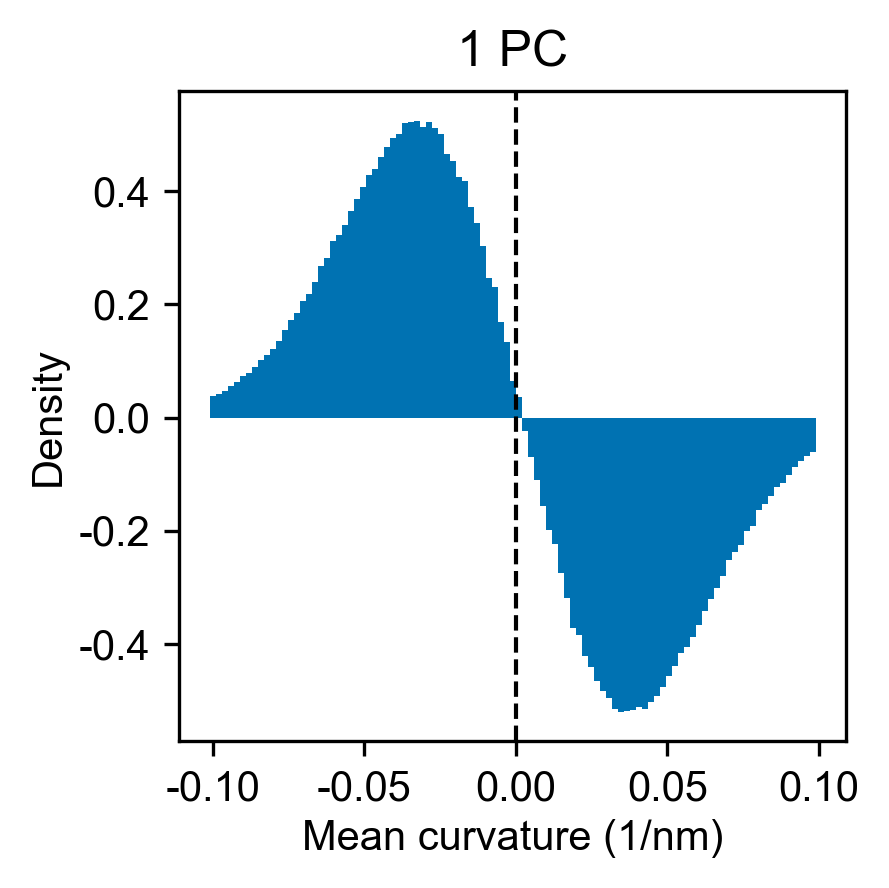

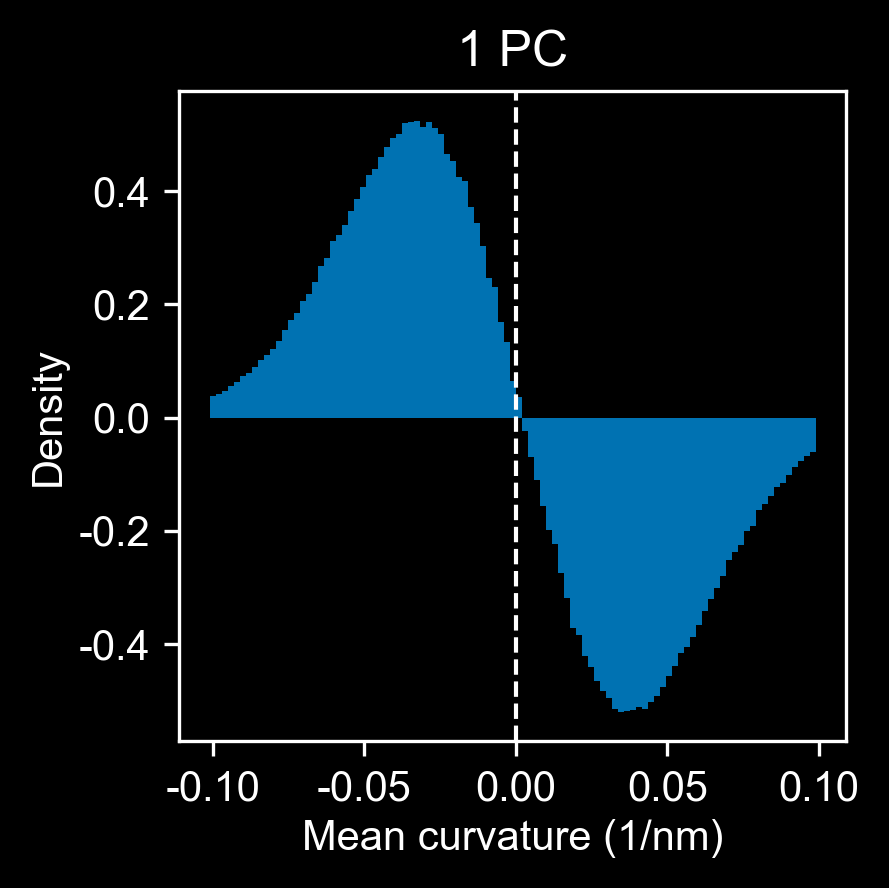

1 Overall mean: 0.0021015377060117765; PE mean 0.0035256583263642395


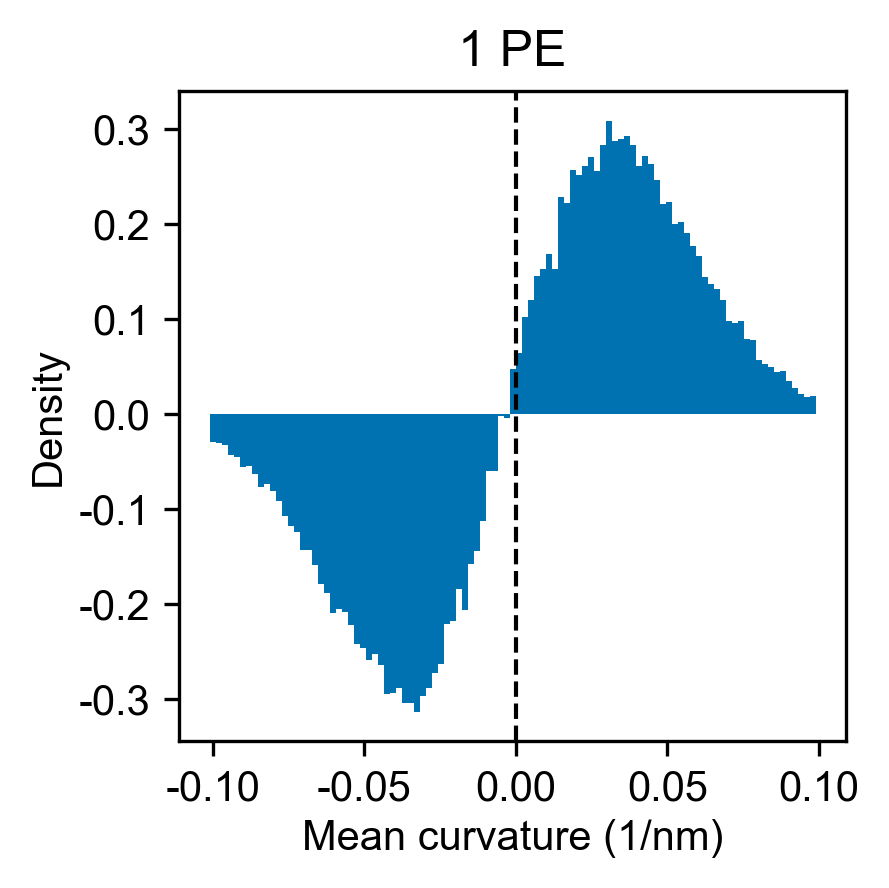

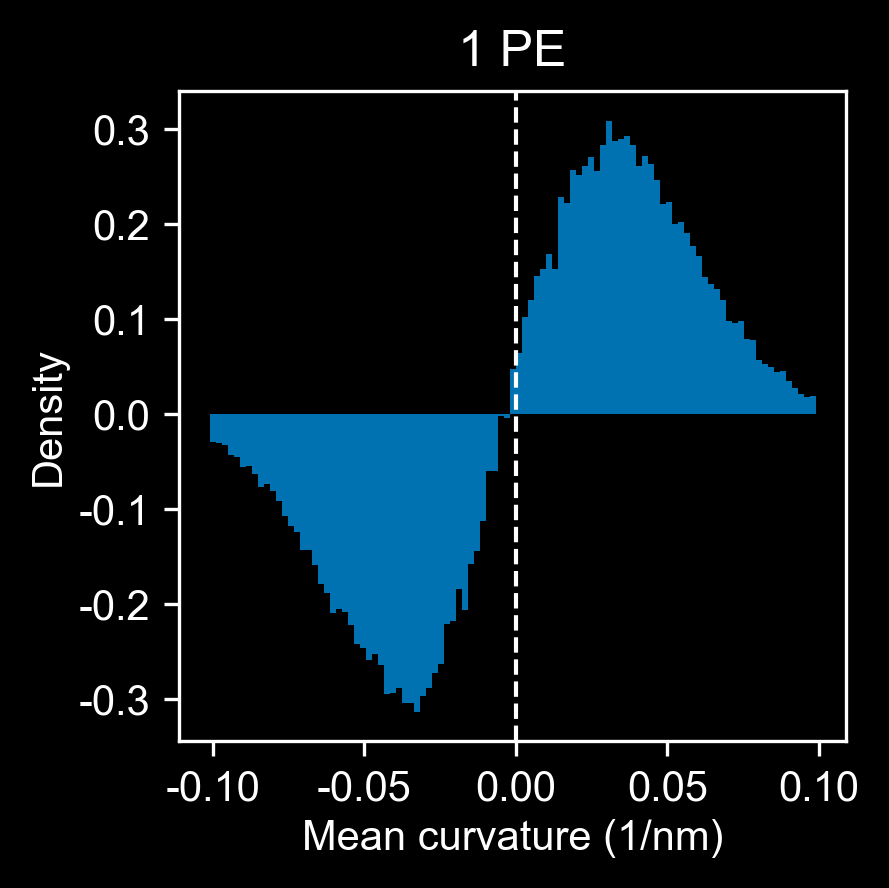

1 Overall mean: 0.0021015377060117765; CDL mean 0.011359112890559209


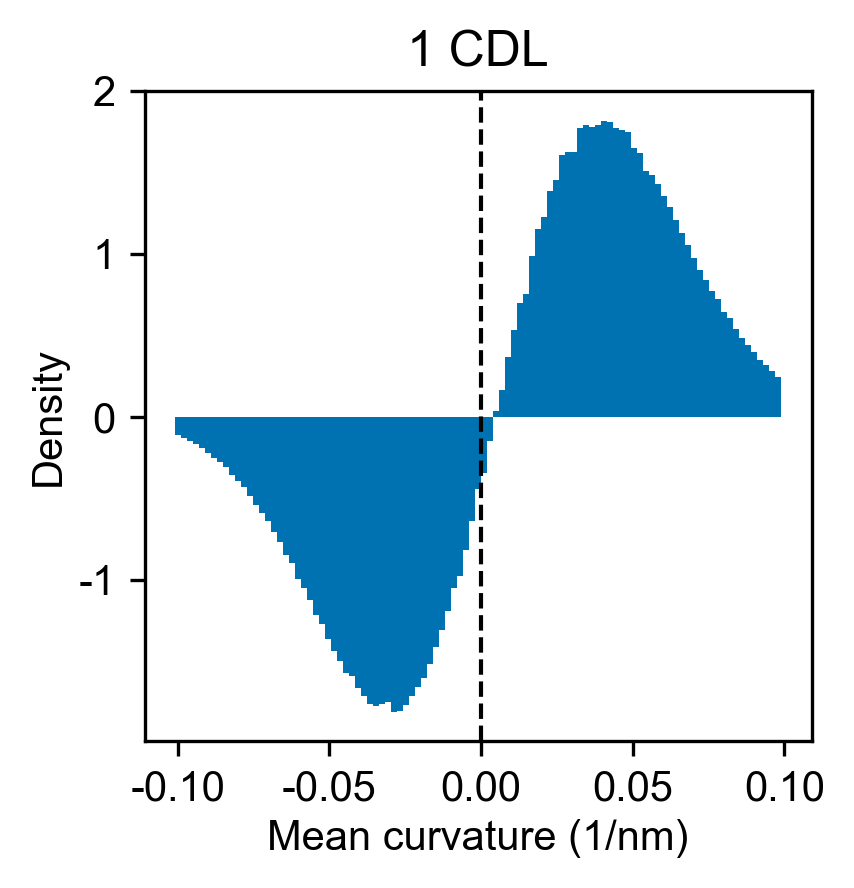

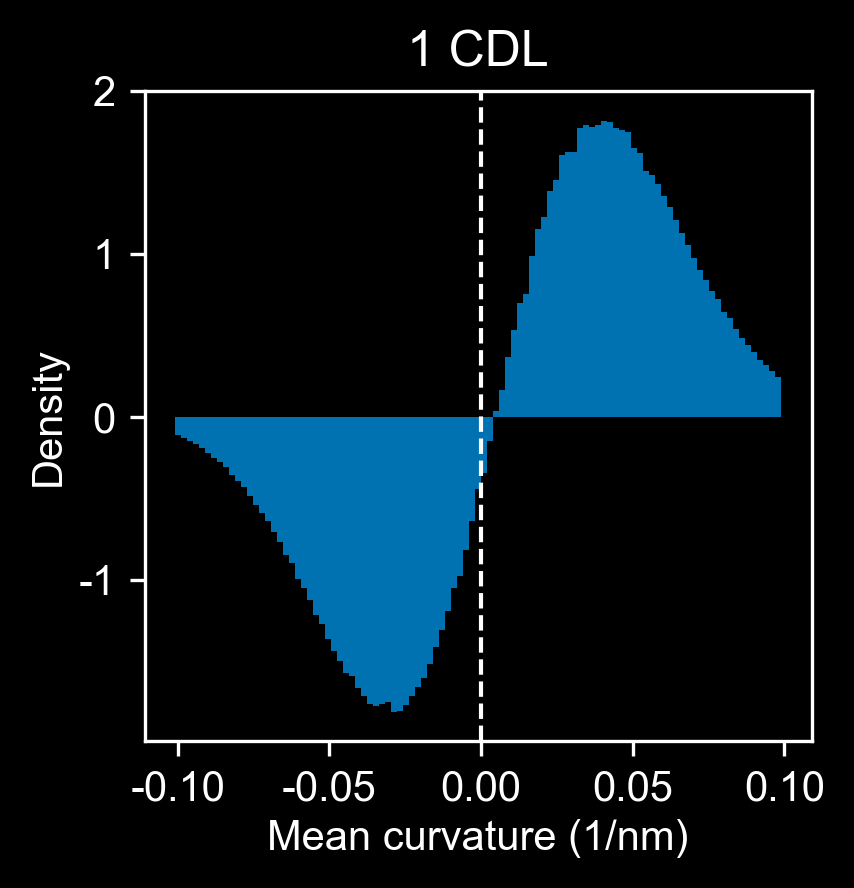

2 Overall mean: 0.002090852749879218; PC mean -0.0008780794688413184


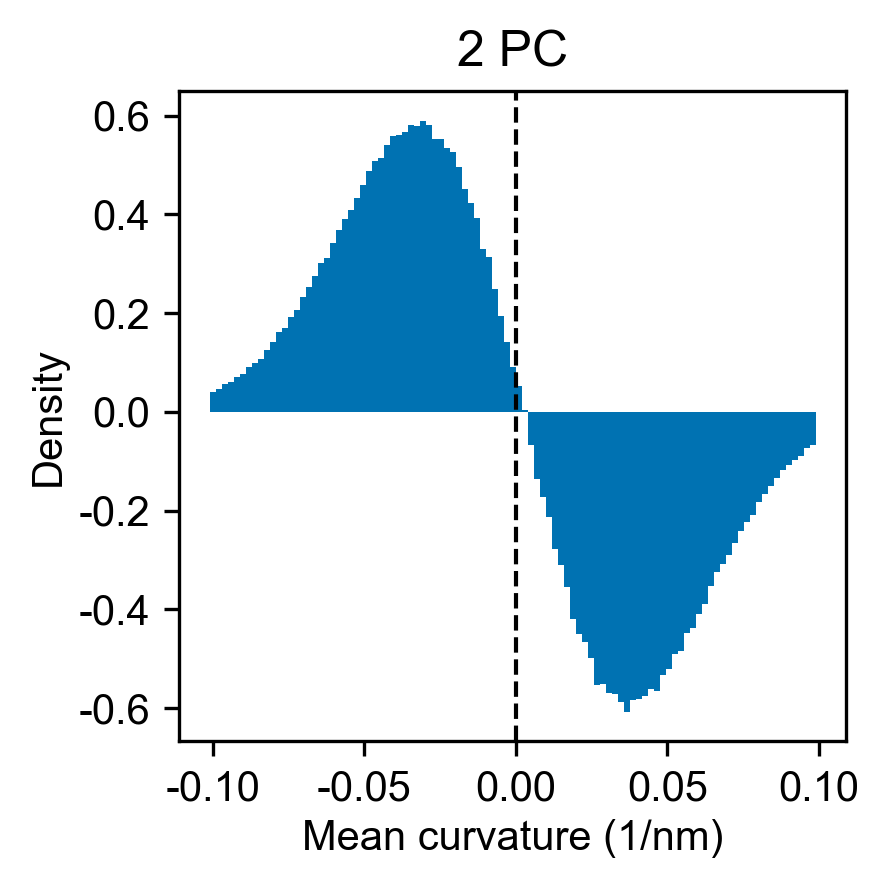

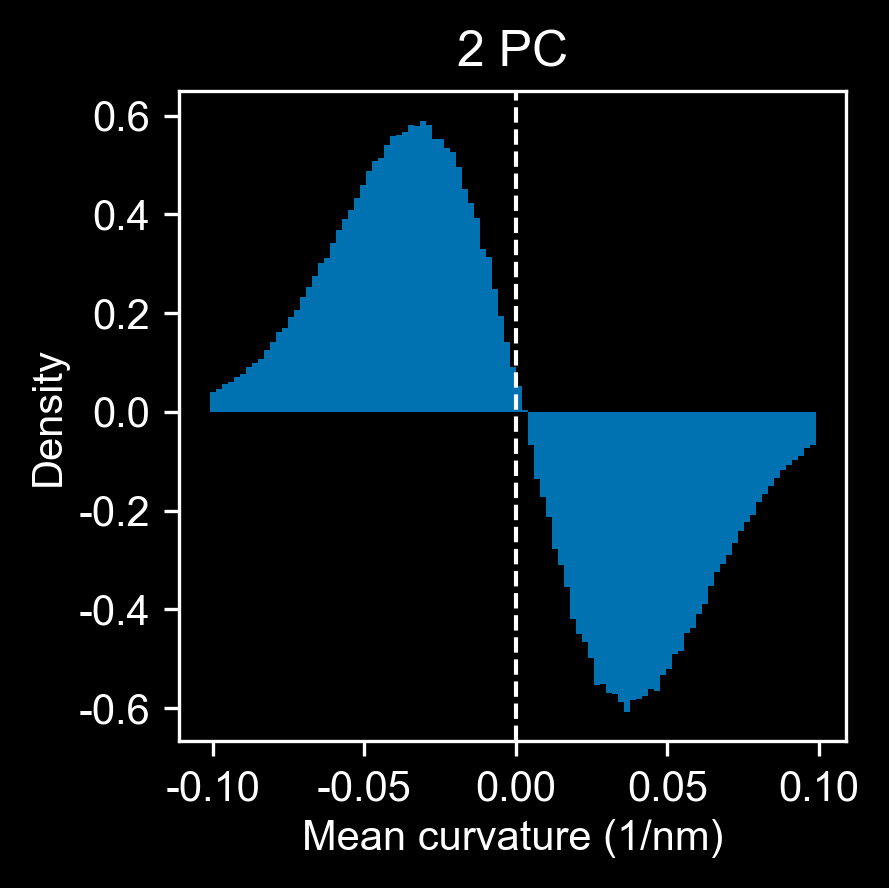

2 Overall mean: 0.002090852749879218; PE mean 0.003141222469188779


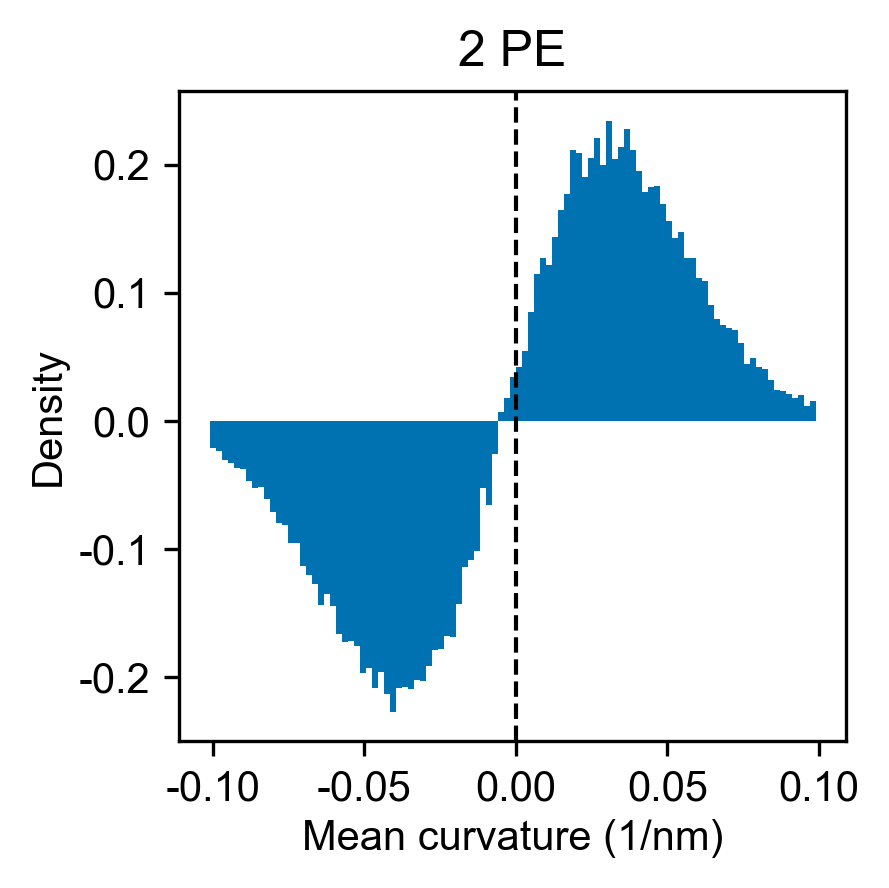

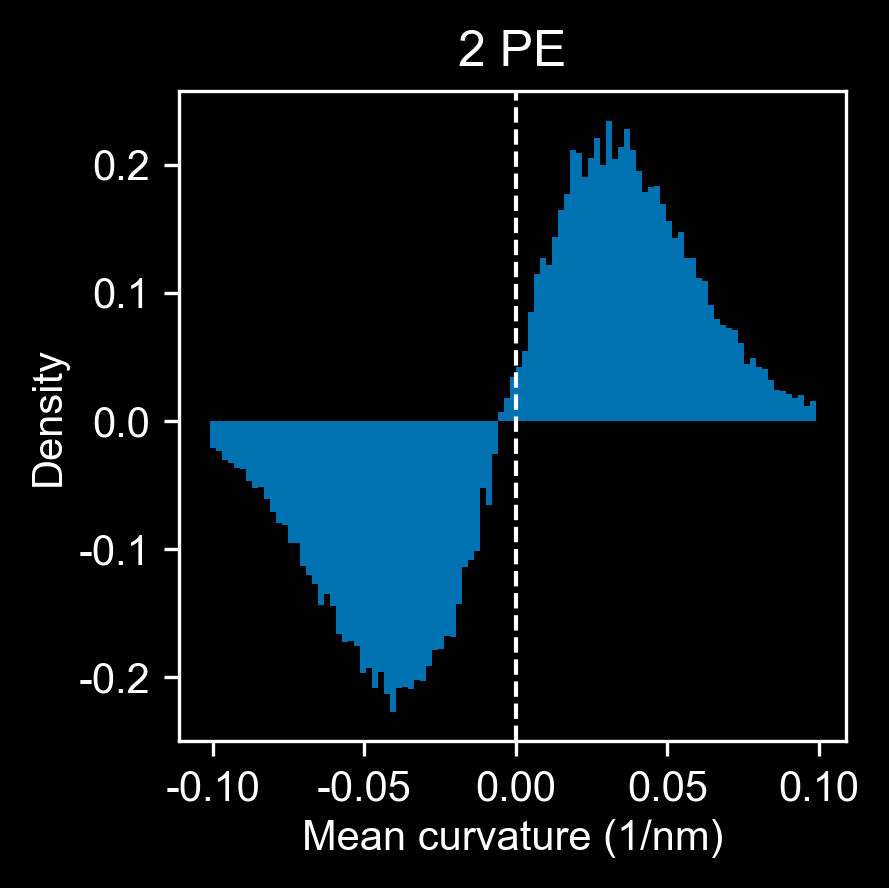

2 Overall mean: 0.002090852749879218; CDL mean 0.011485259571811473


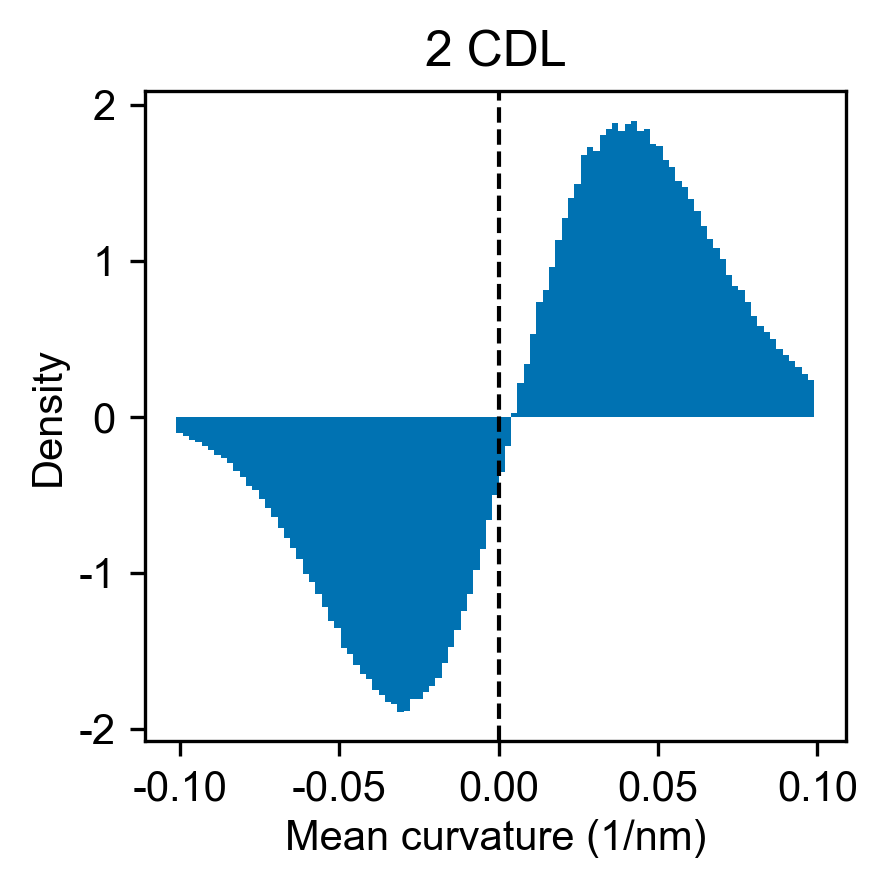

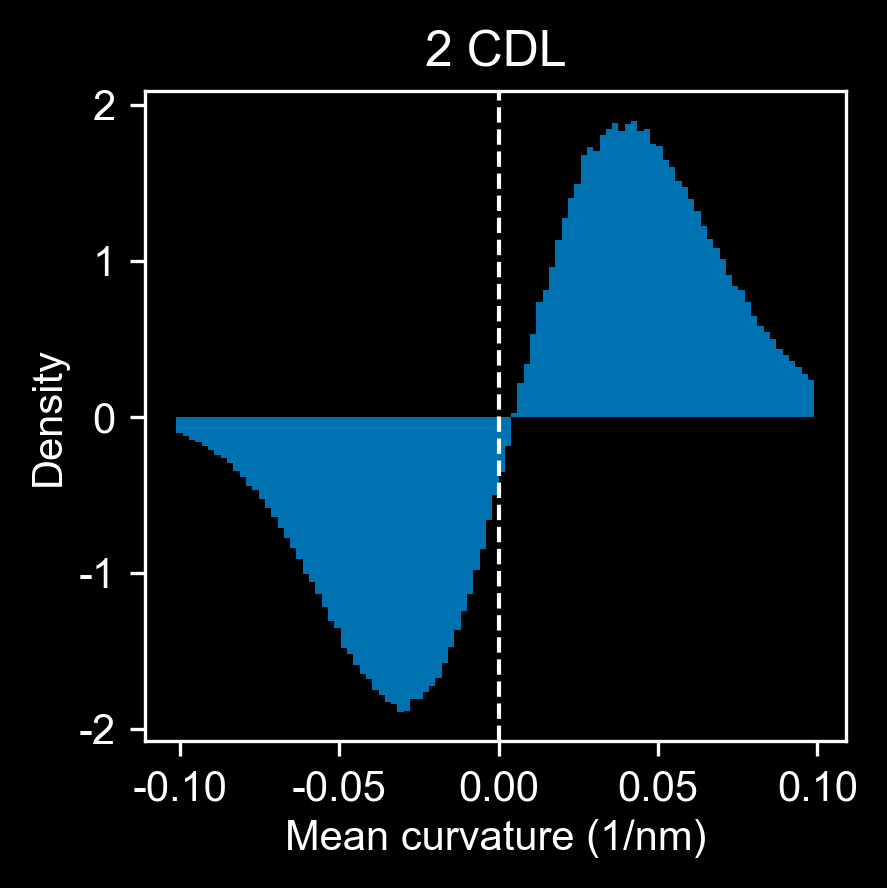

3 Overall mean: 0.0019702582985402896; PC mean -0.0005822301866712825


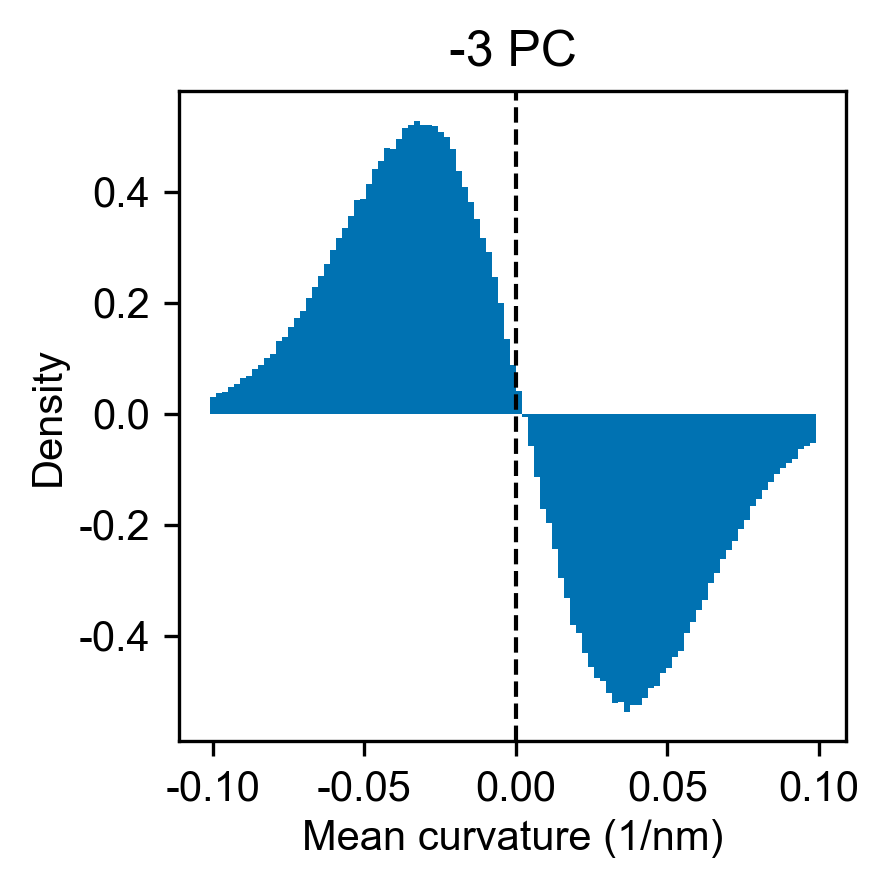

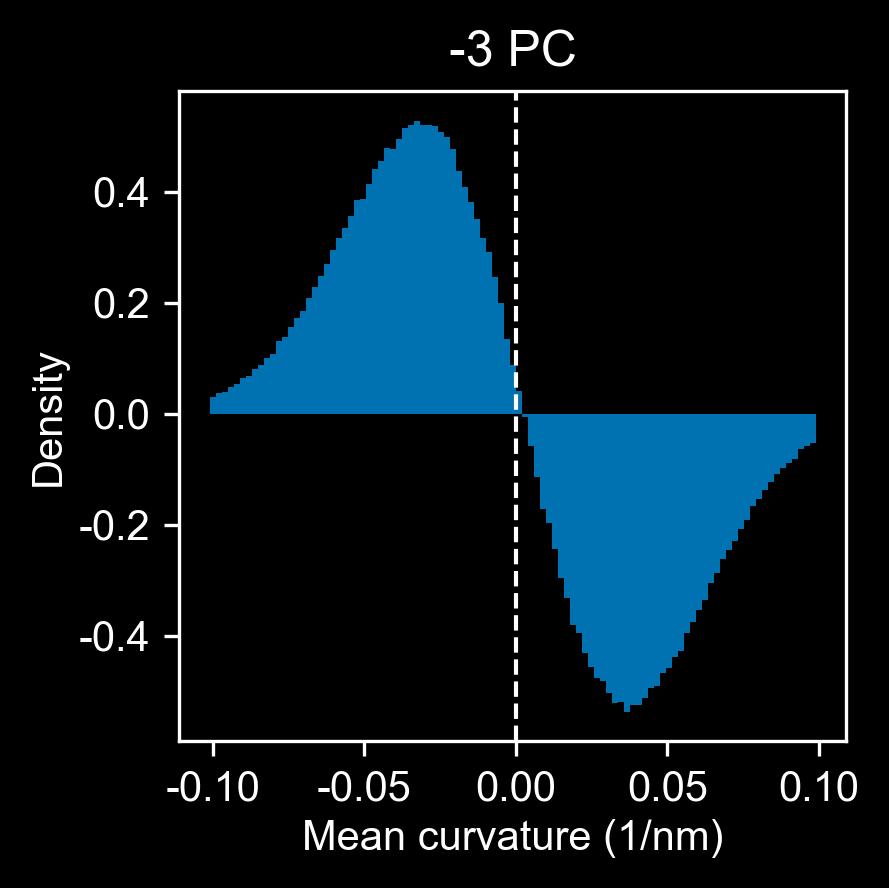

3 Overall mean: 0.0019702582985402896; PE mean 0.003201818129841939


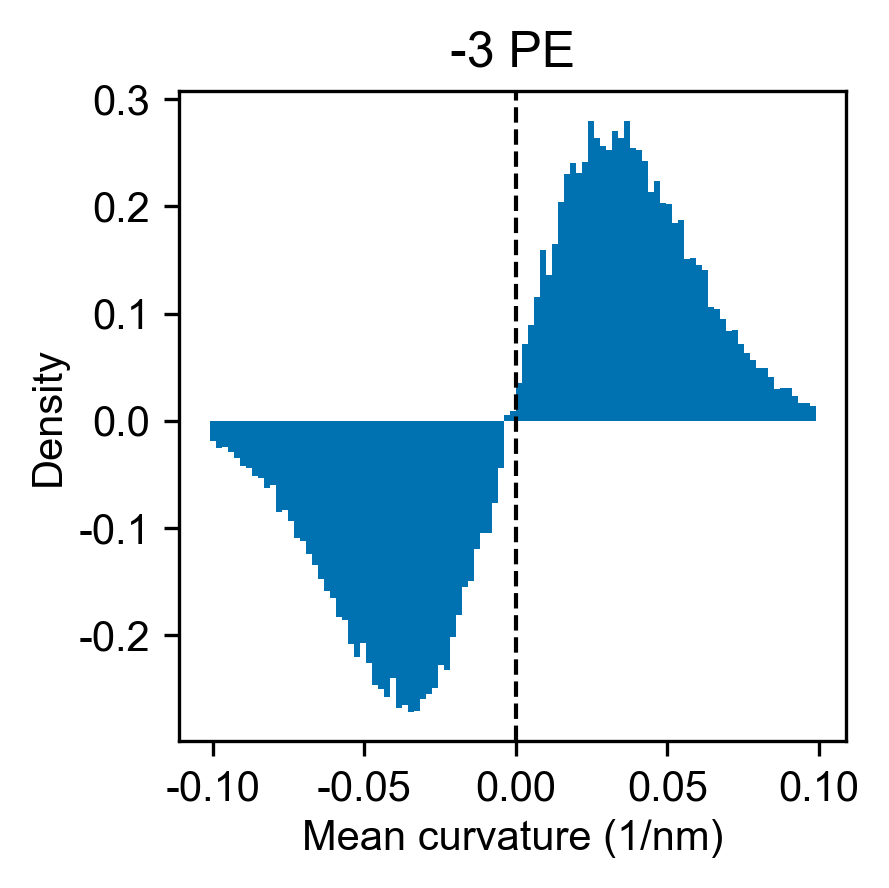

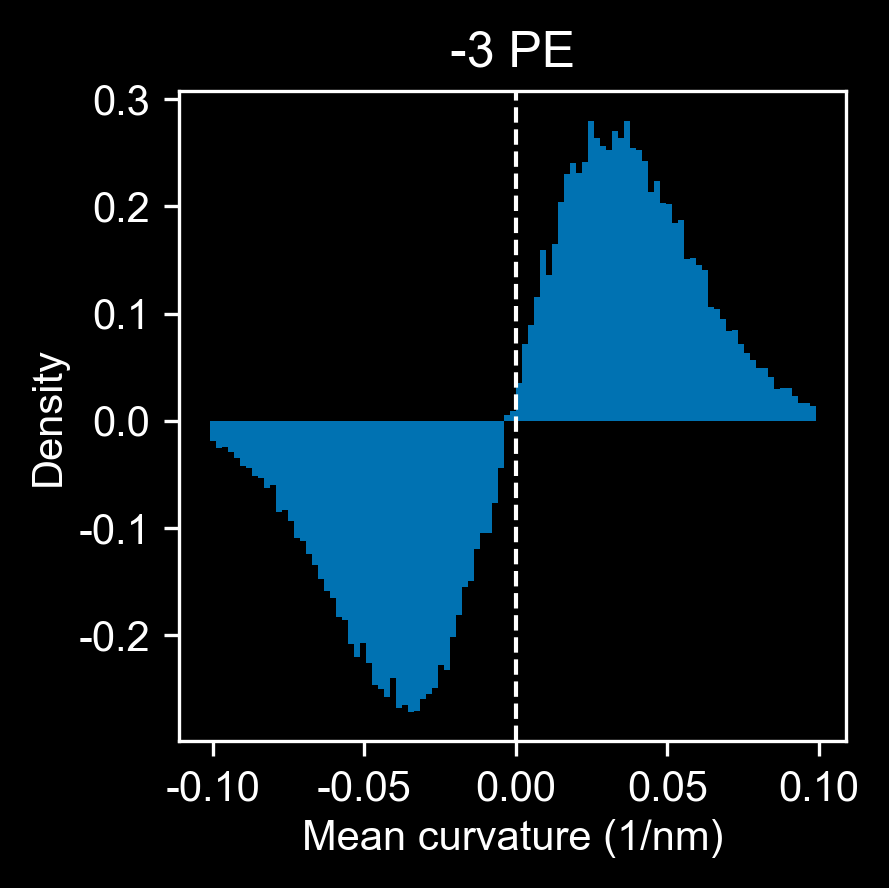

3 Overall mean: 0.0019702582985402896; CDL mean 0.010605589730270246


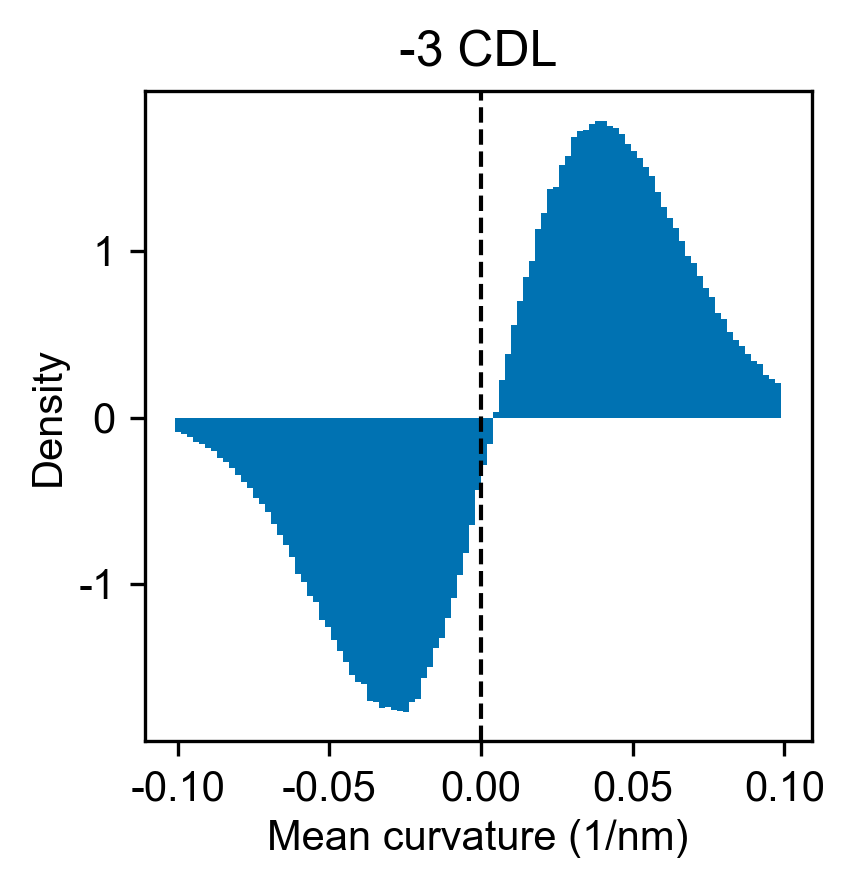

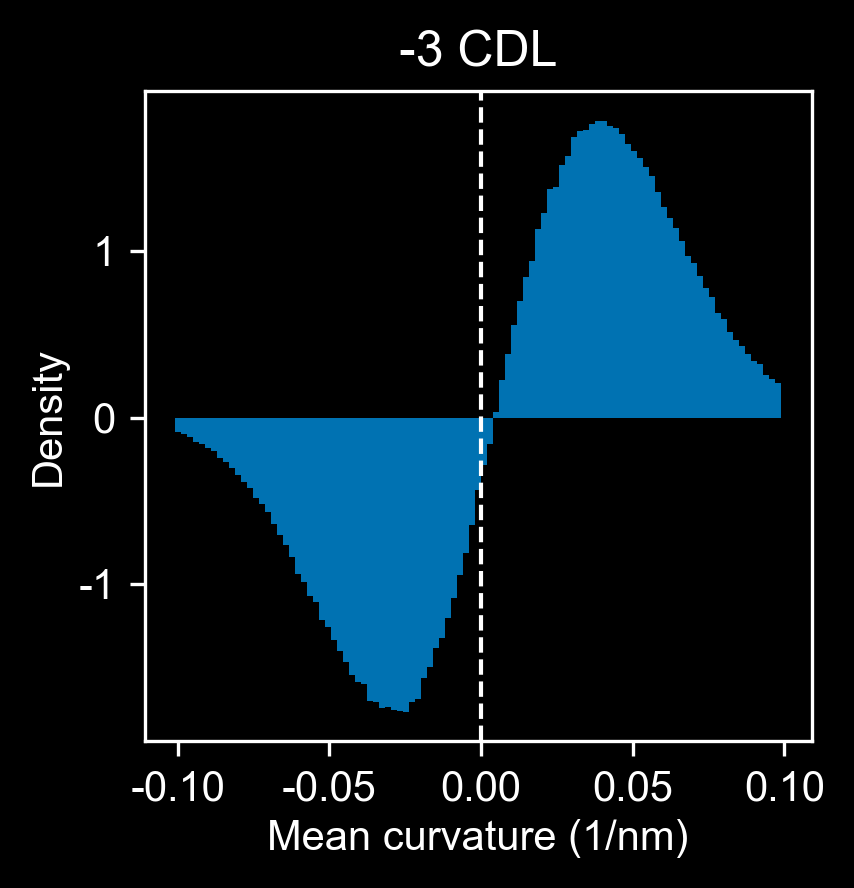

4 Overall mean: 0.0015446340712941262; PC mean 0.0008041801903102467


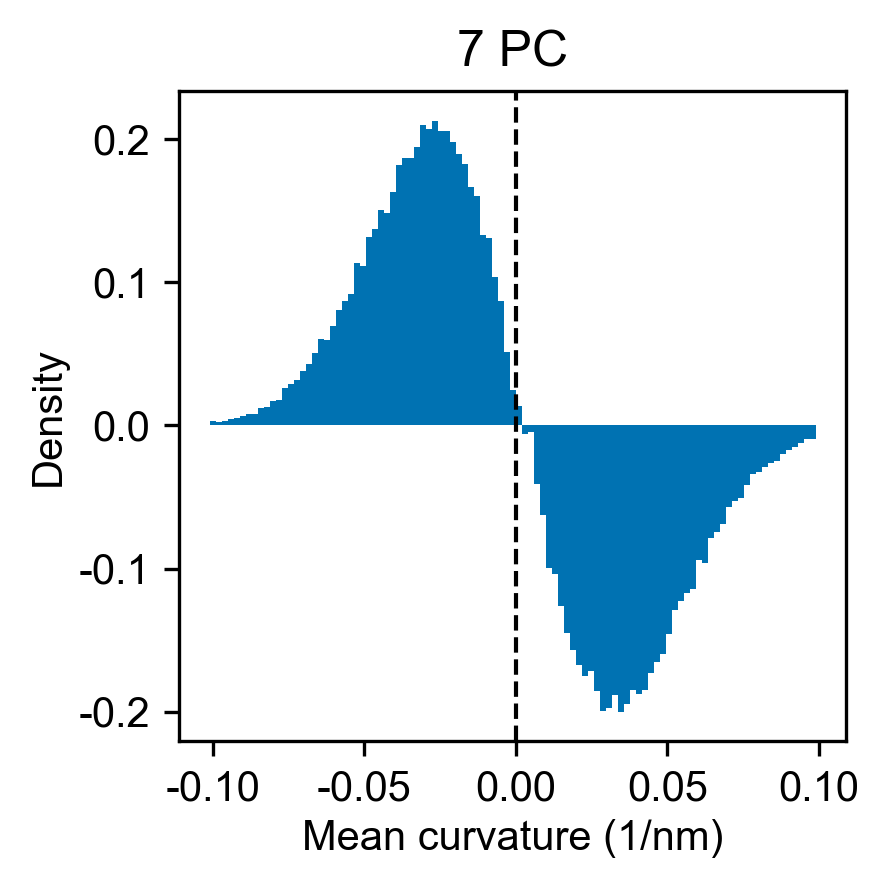

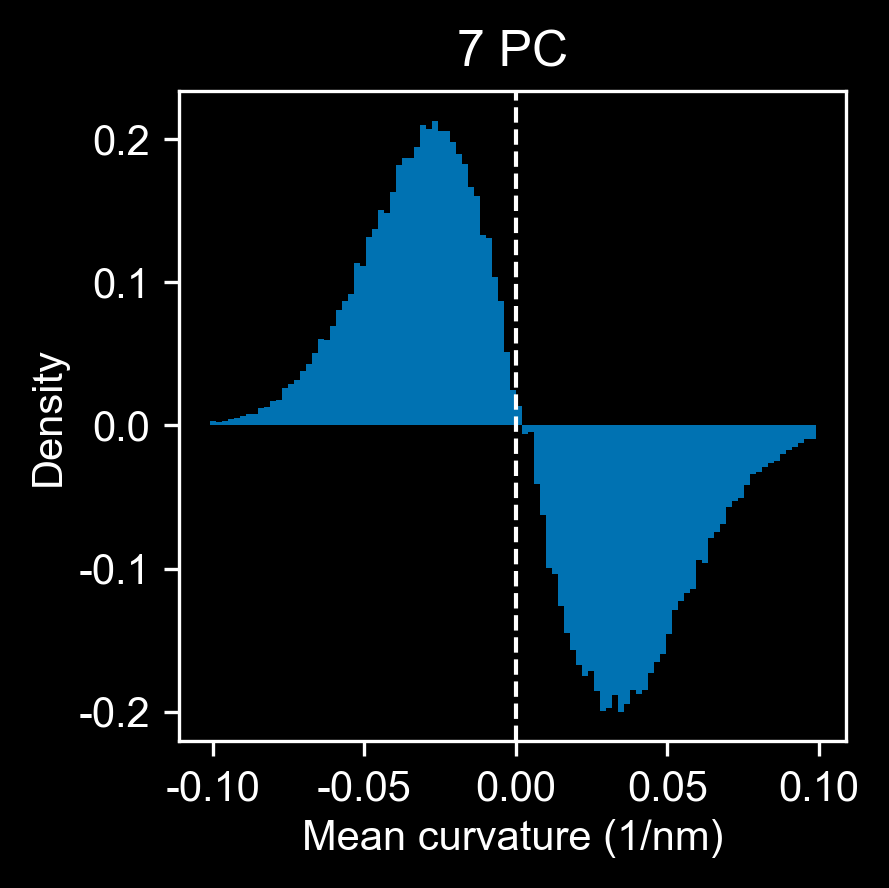

4 Overall mean: 0.0015446340712941262; PE mean 0.00311461681343397


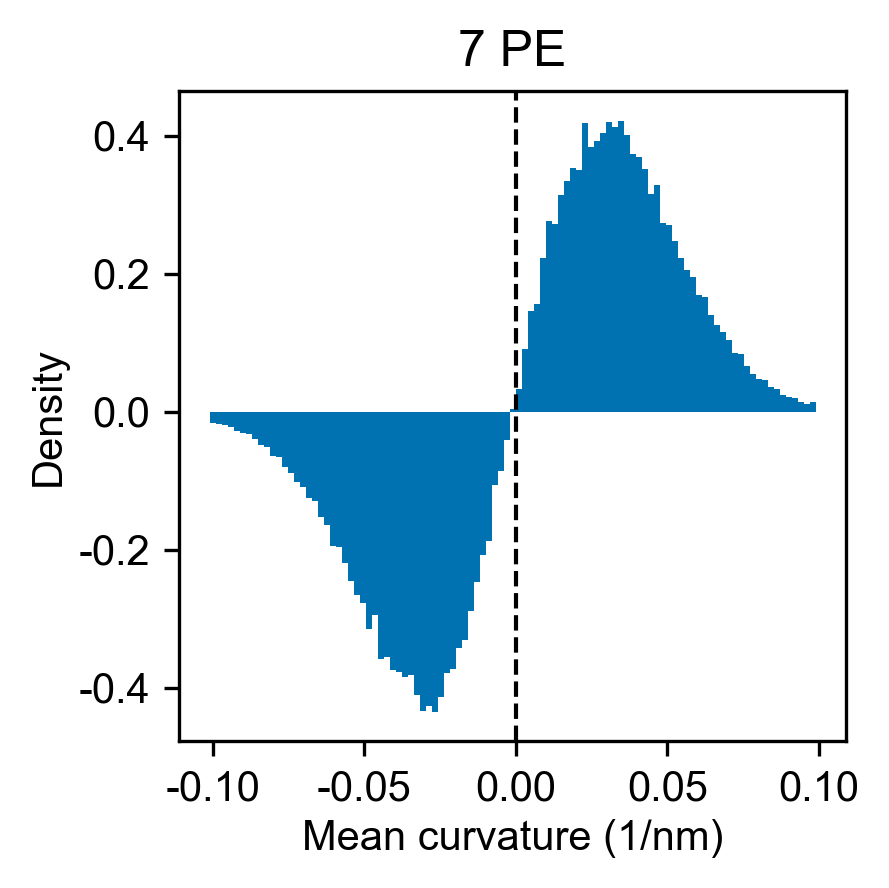

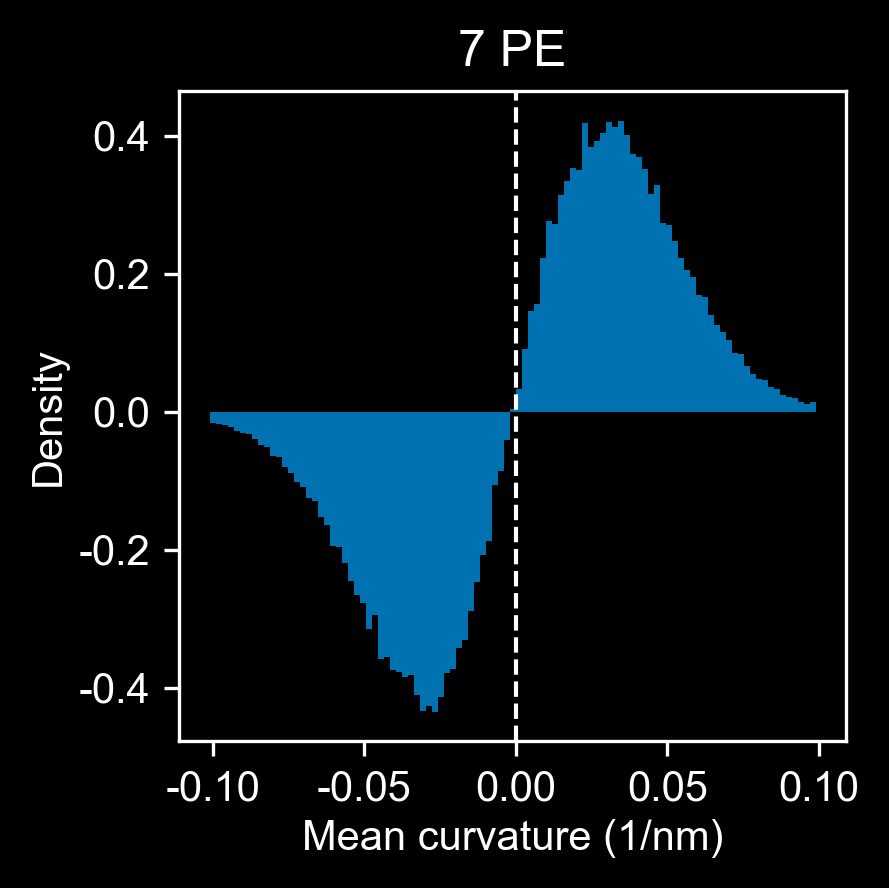

4 Overall mean: 0.0015446340712941262; PG mean 0.00202212338439525


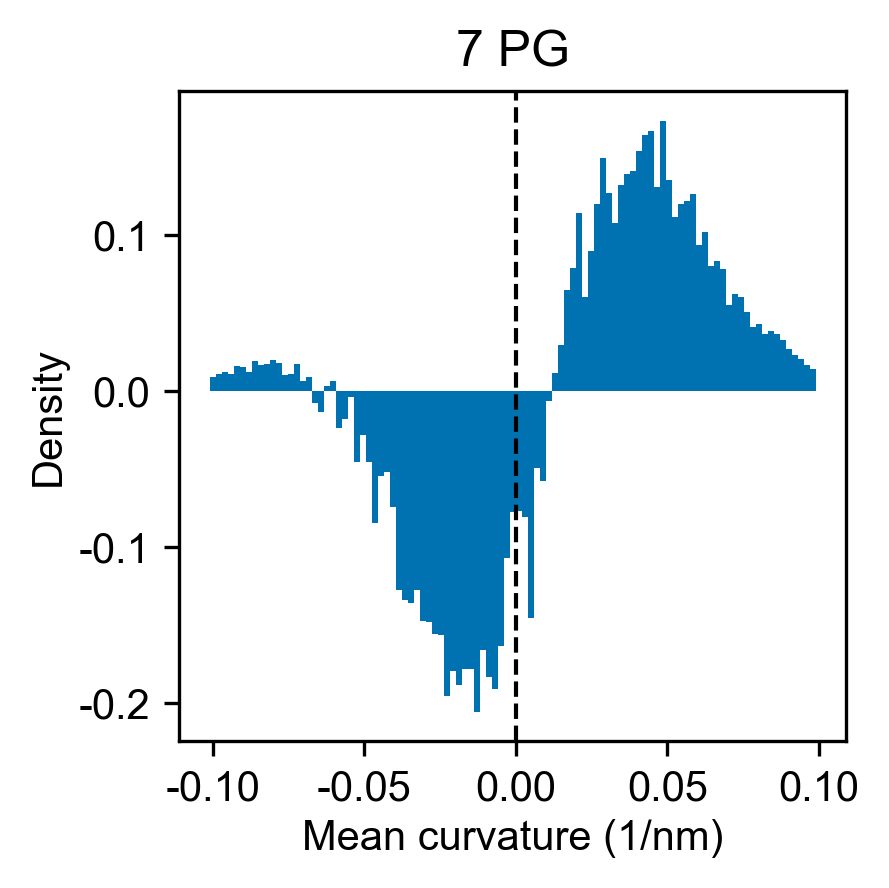

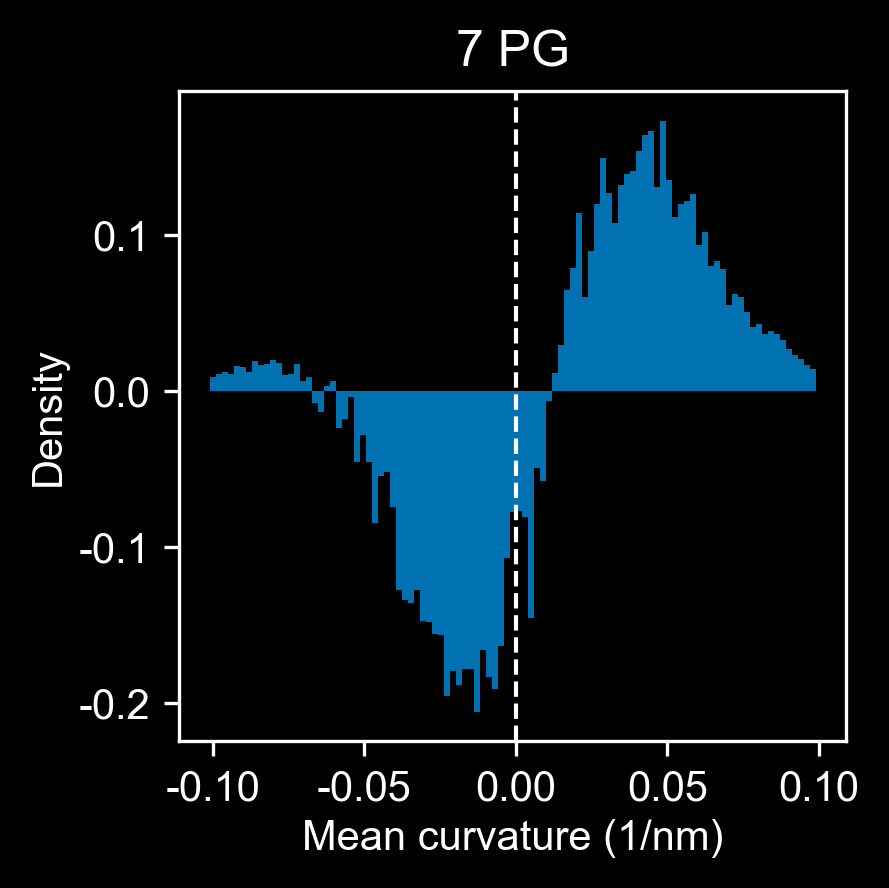

5 Overall mean: 0.001562434938273708; PC mean 0.0006229317919405234


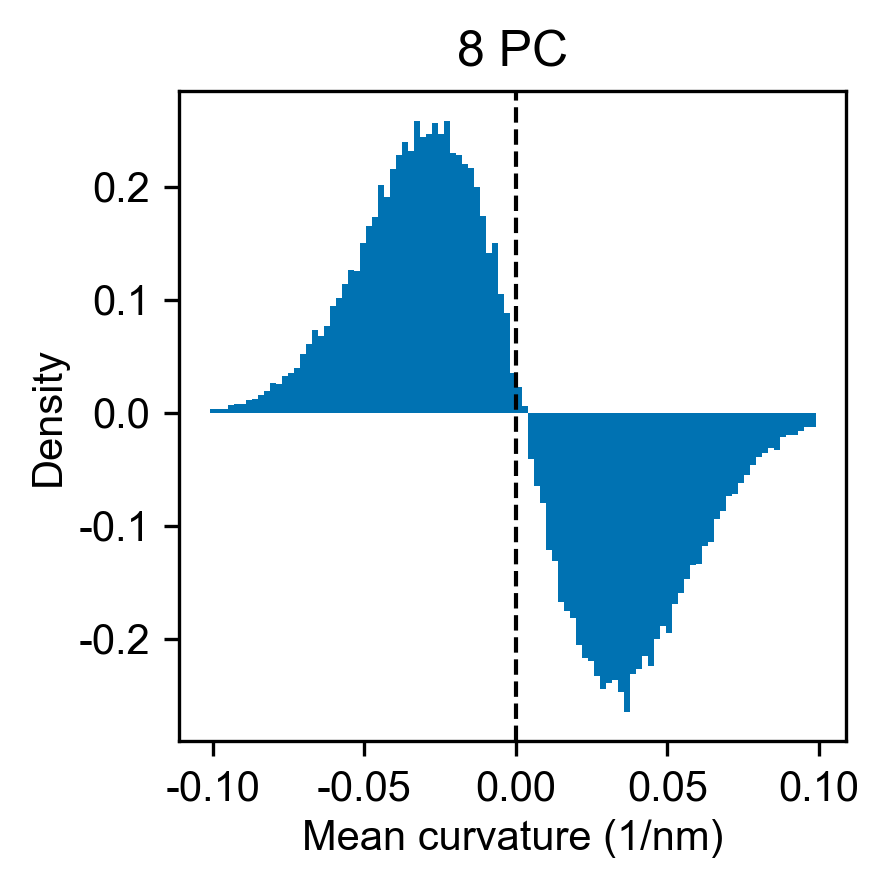

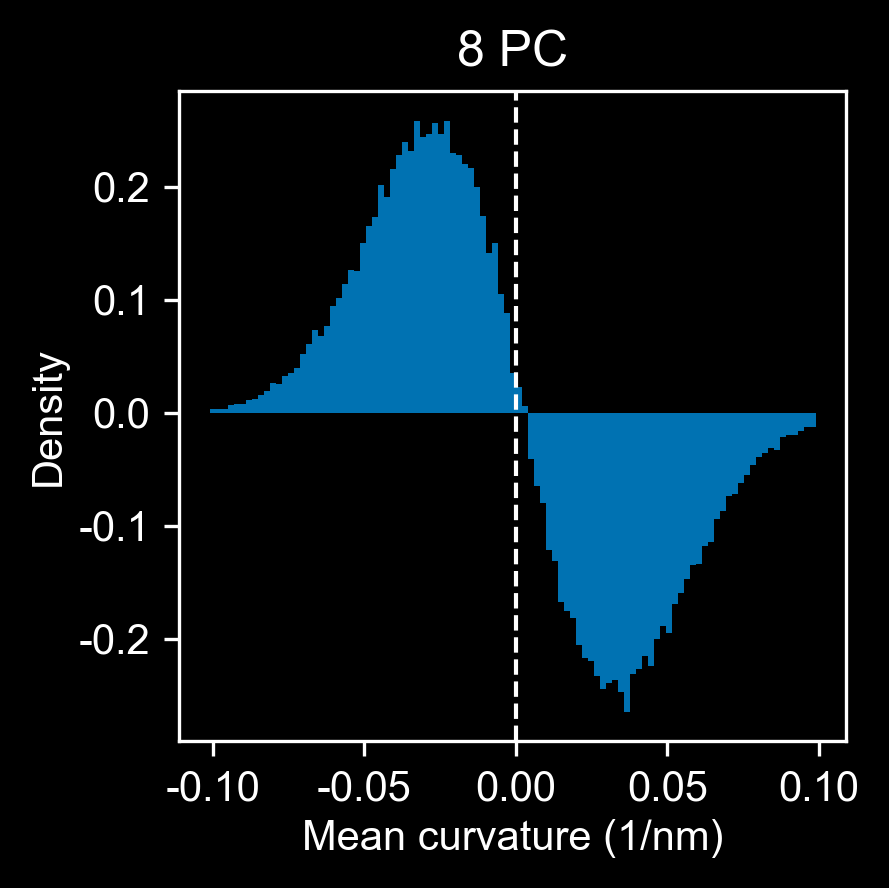

5 Overall mean: 0.001562434938273708; PE mean 0.0029518786054996376


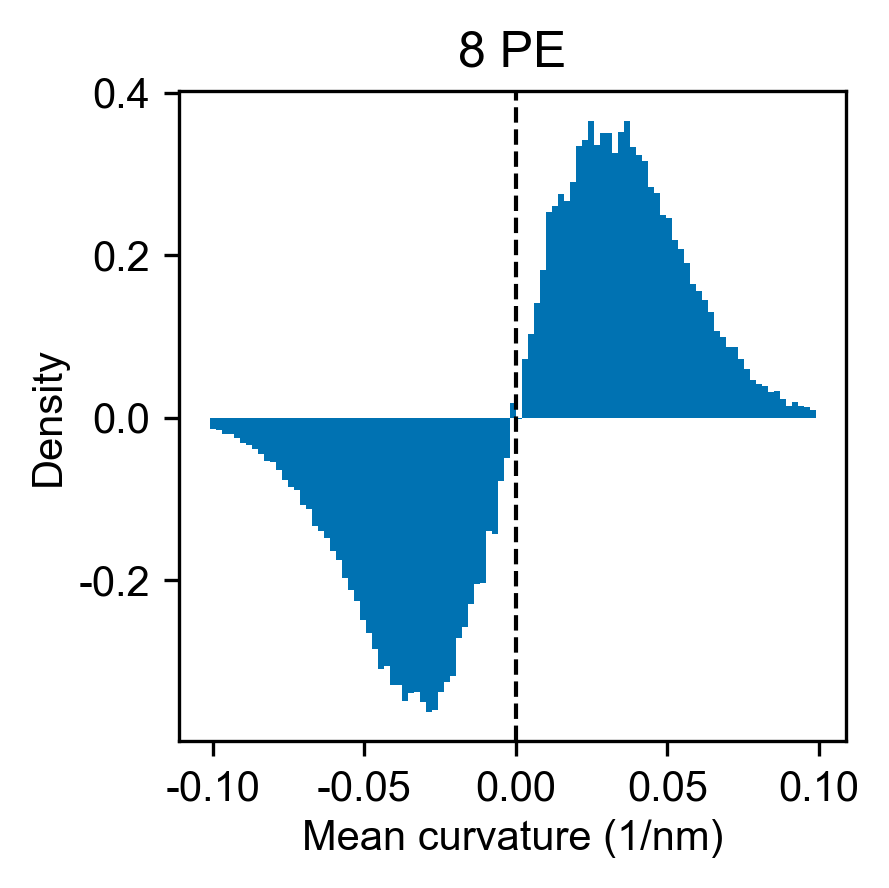

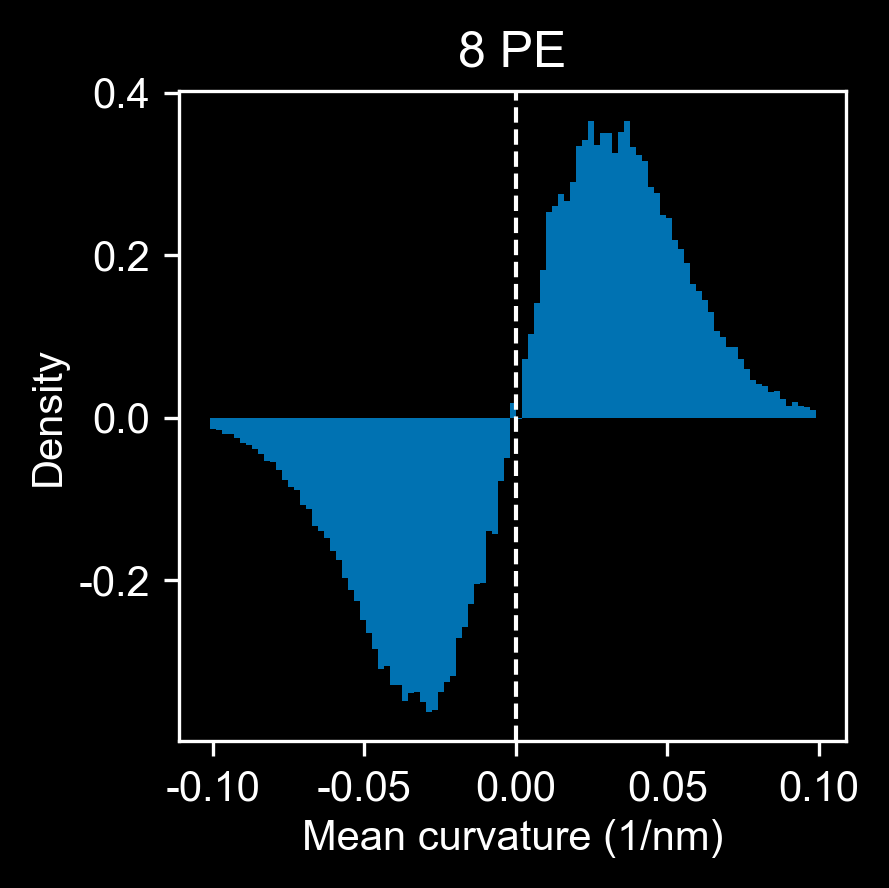

5 Overall mean: 0.001562434938273708; PG mean 0.001785803084238905


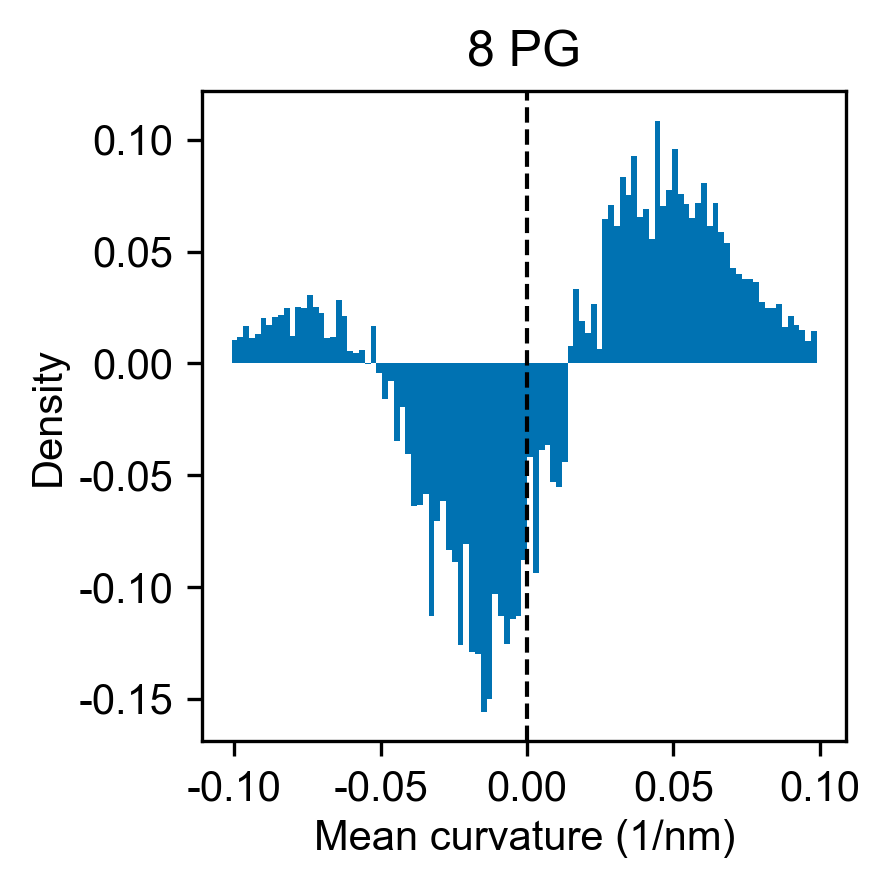

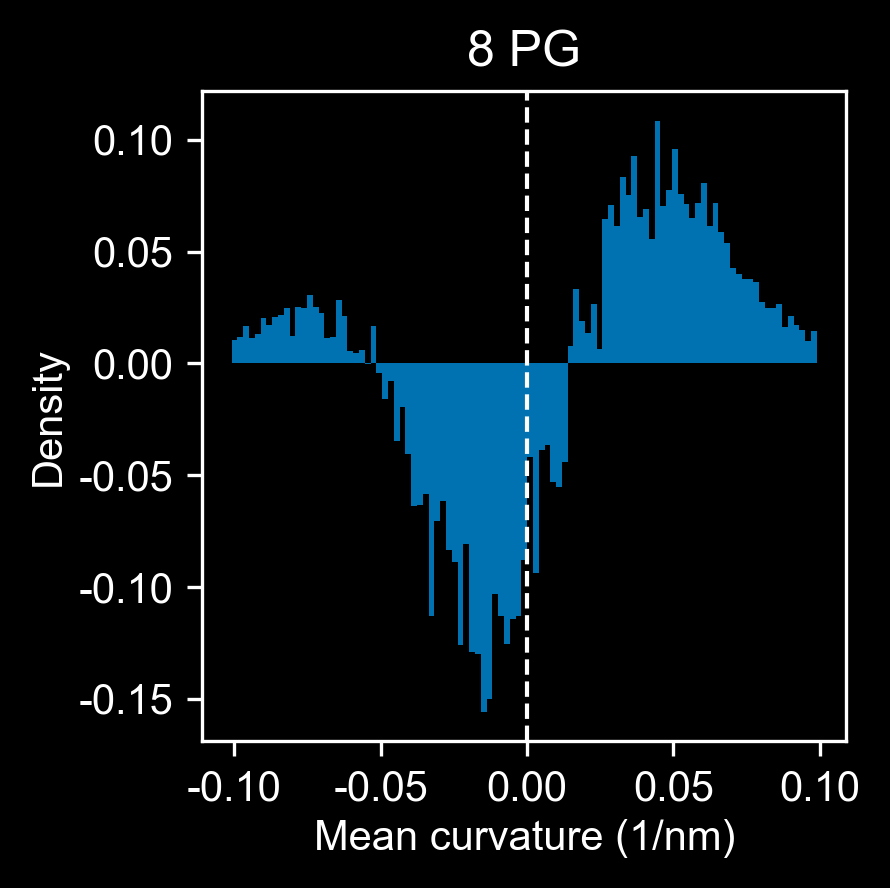

6 Overall mean: 0.0015294828715871646; PC mean 0.0005702186119010734


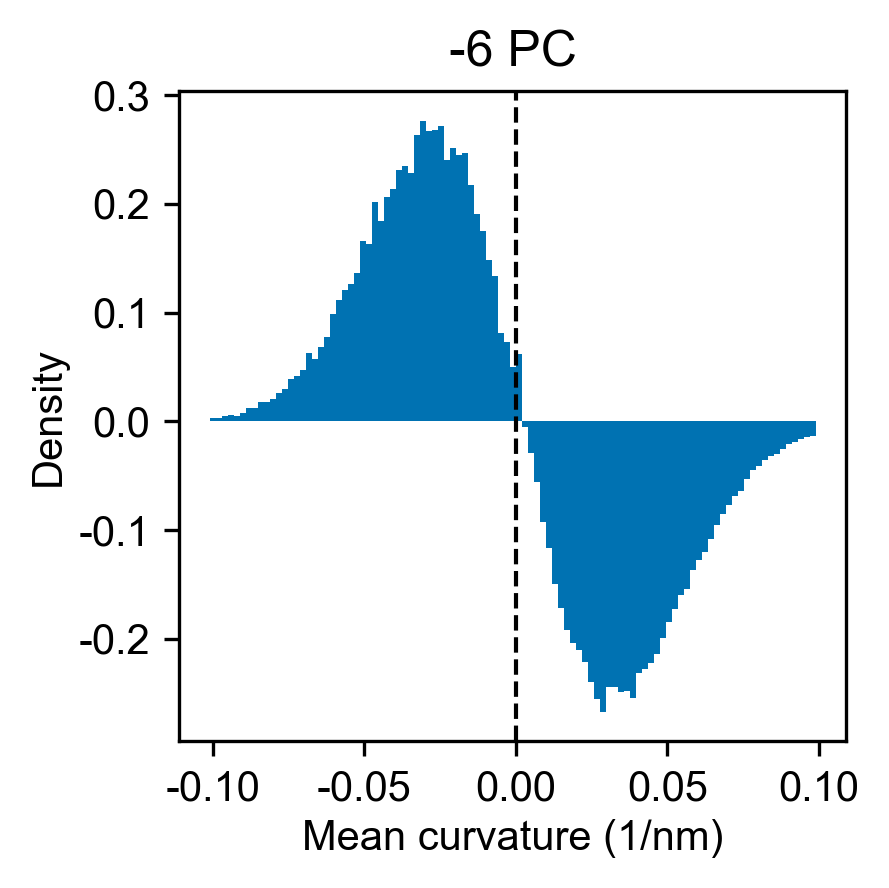

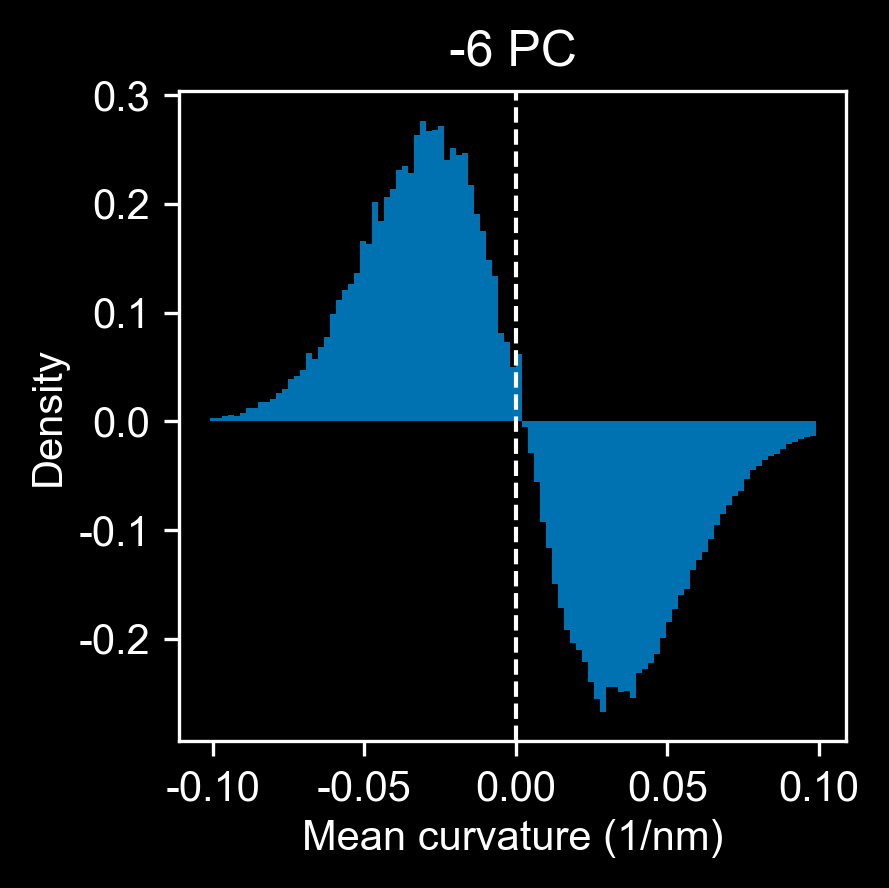

6 Overall mean: 0.0015294828715871646; PE mean 0.002931207903118746


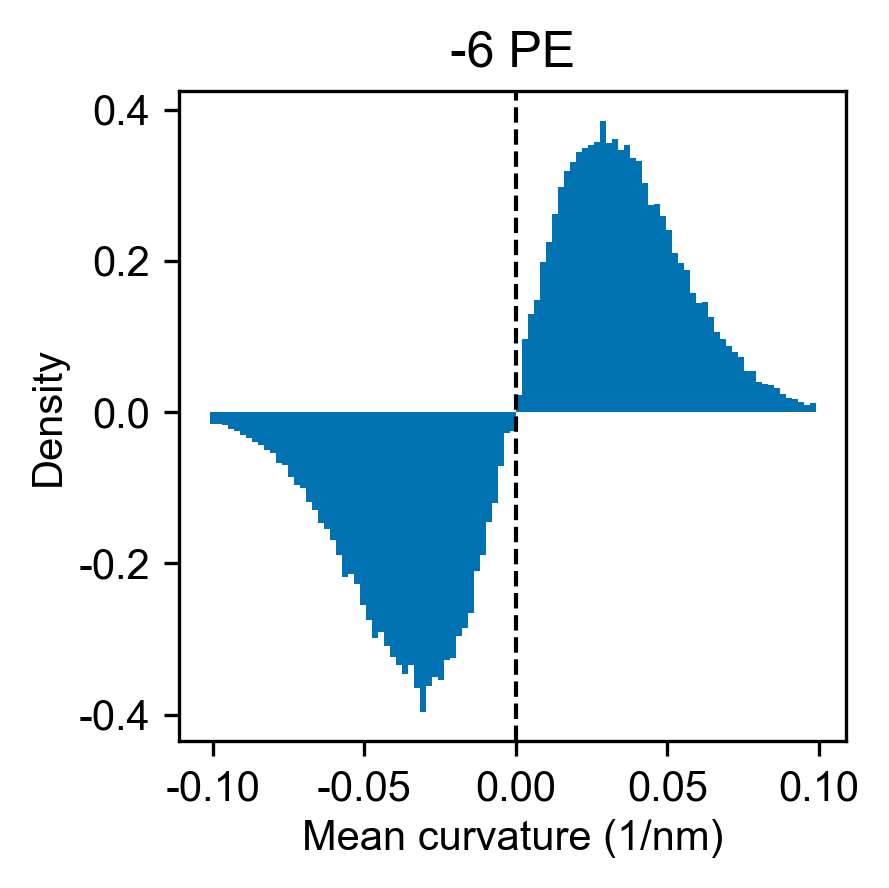

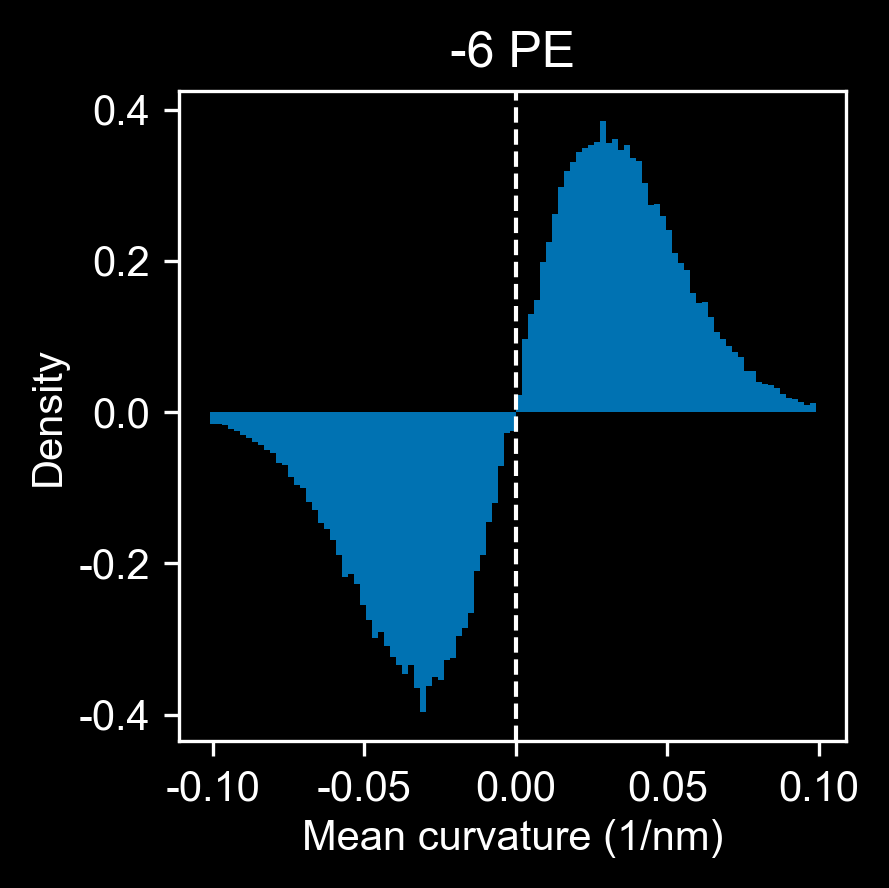

6 Overall mean: 0.0015294828715871646; PG mean 0.0017787899187283165


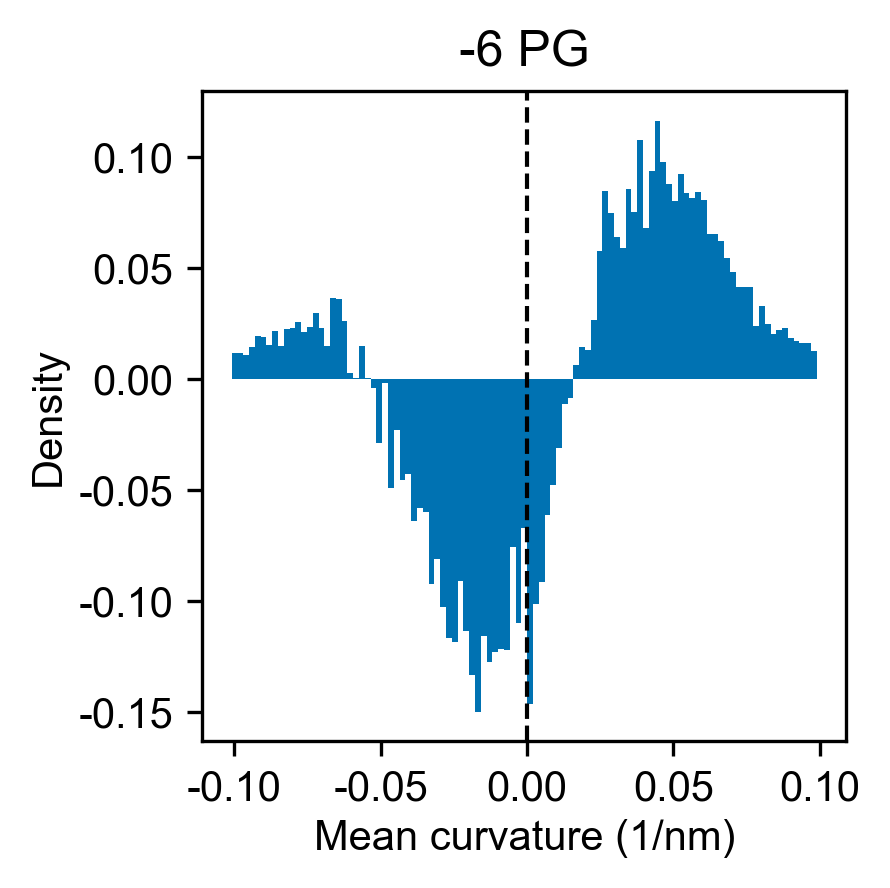

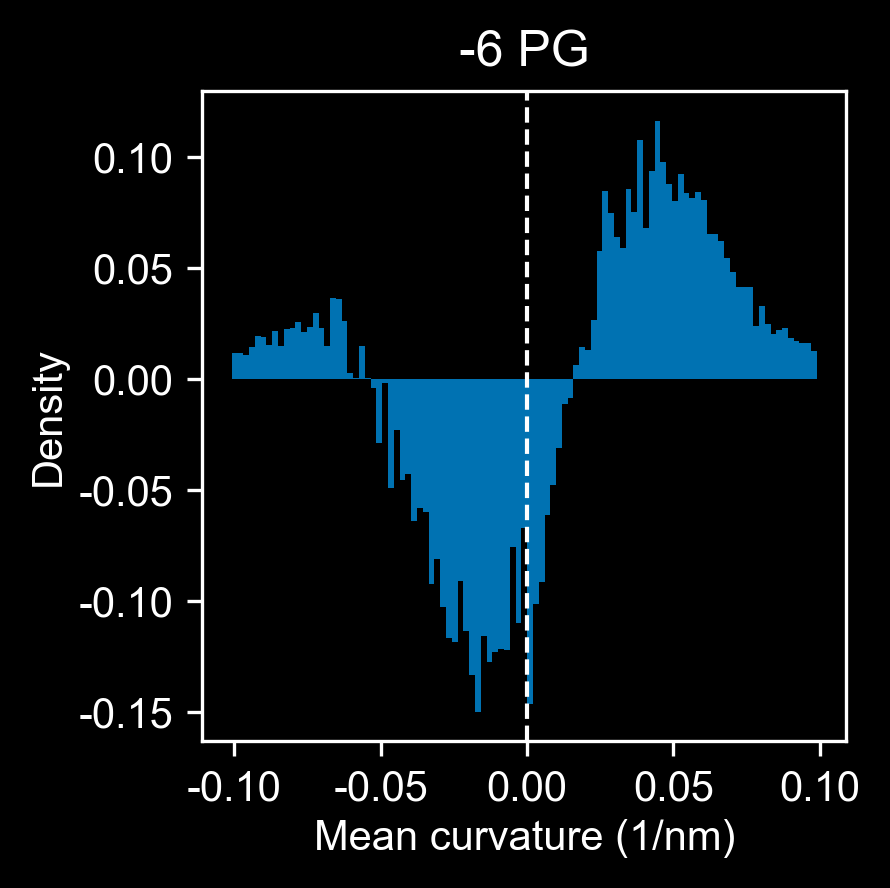

7 Overall mean: 0.005334181253777407; CDL mean 0.005334181253777407


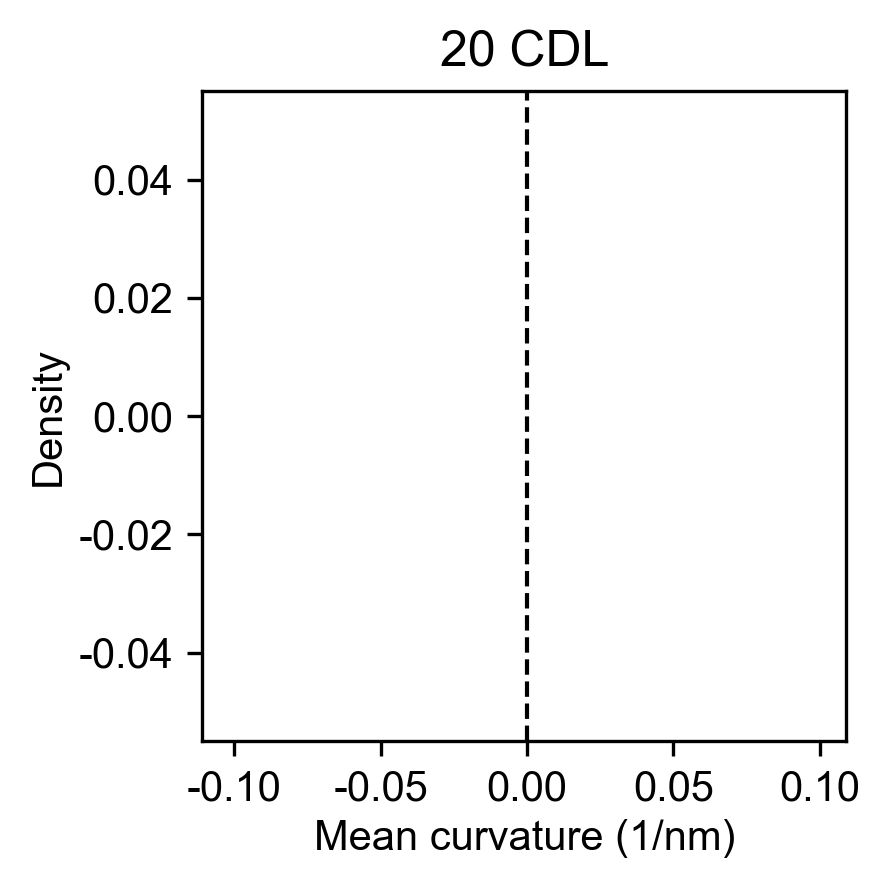

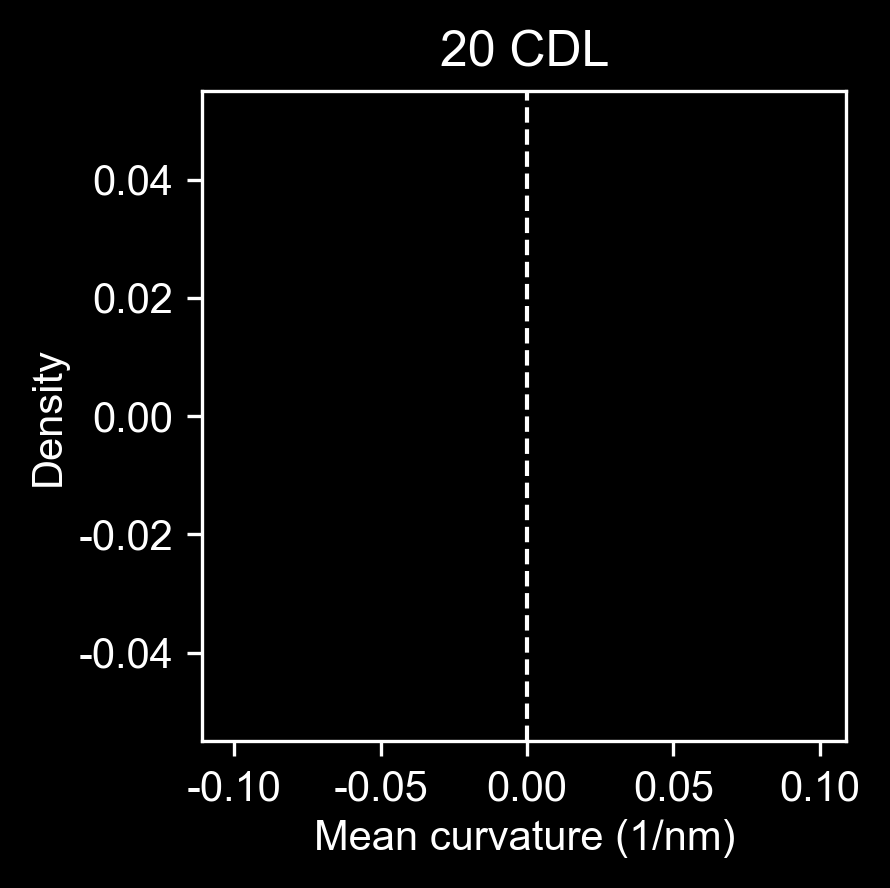

8 Overall mean: 0.0020376366841081415; PC mean -0.0016902749536886422


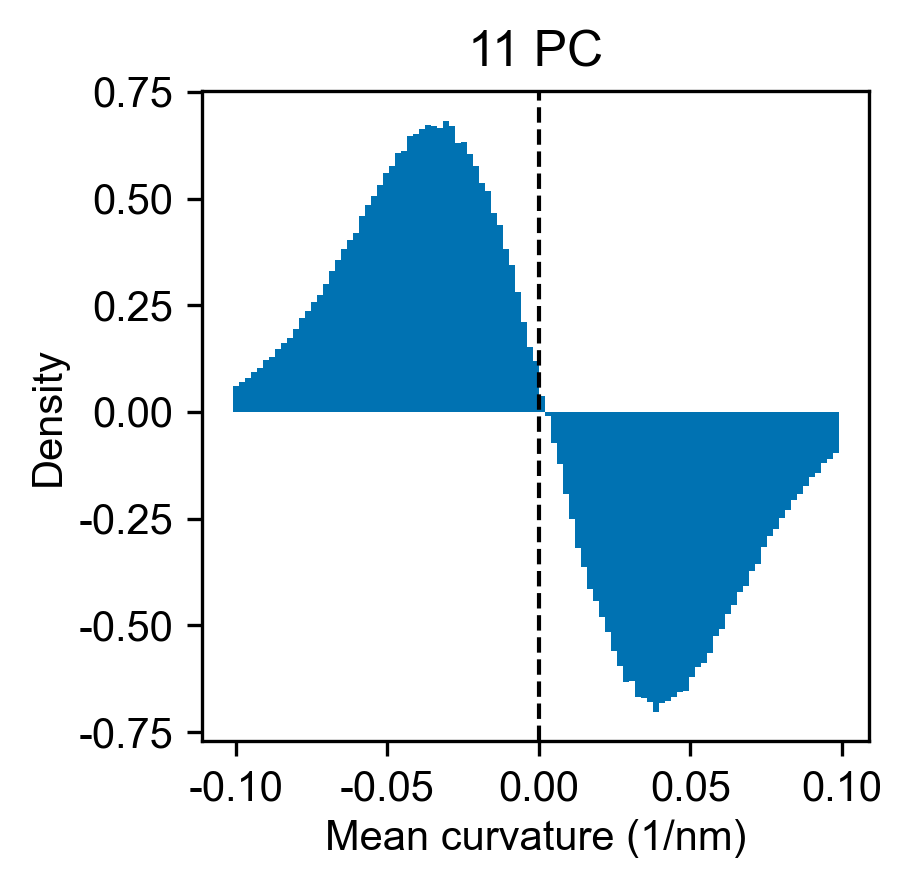

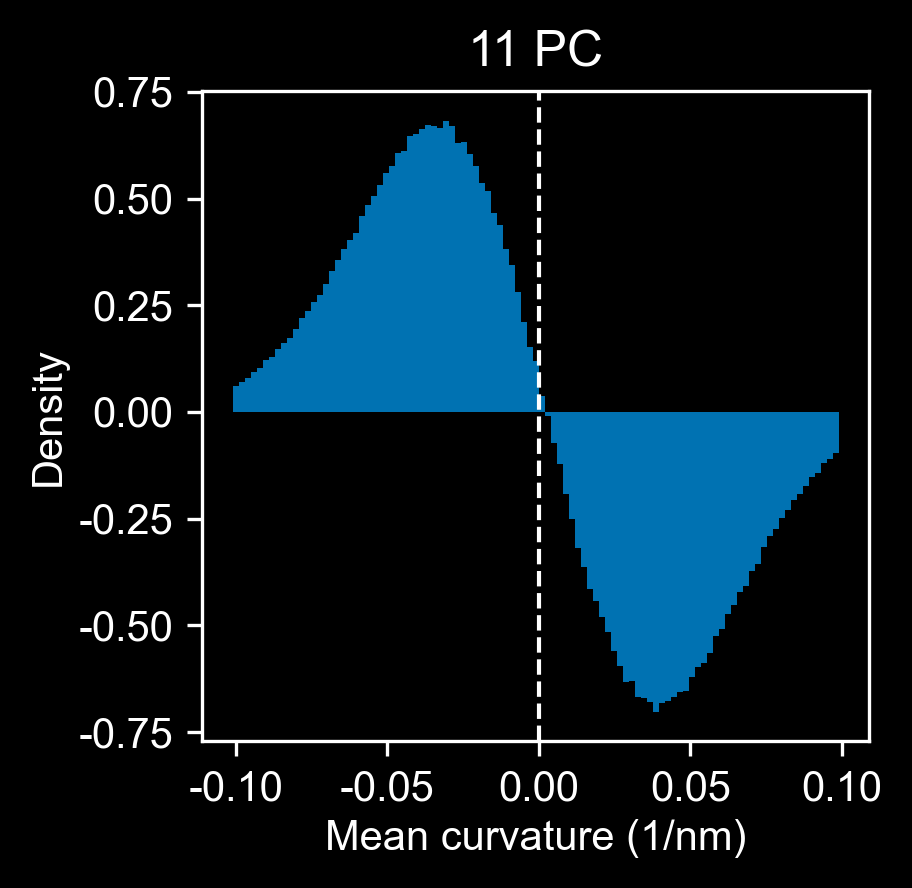

8 Overall mean: 0.0020376366841081415; PE mean 0.0029285968221054795


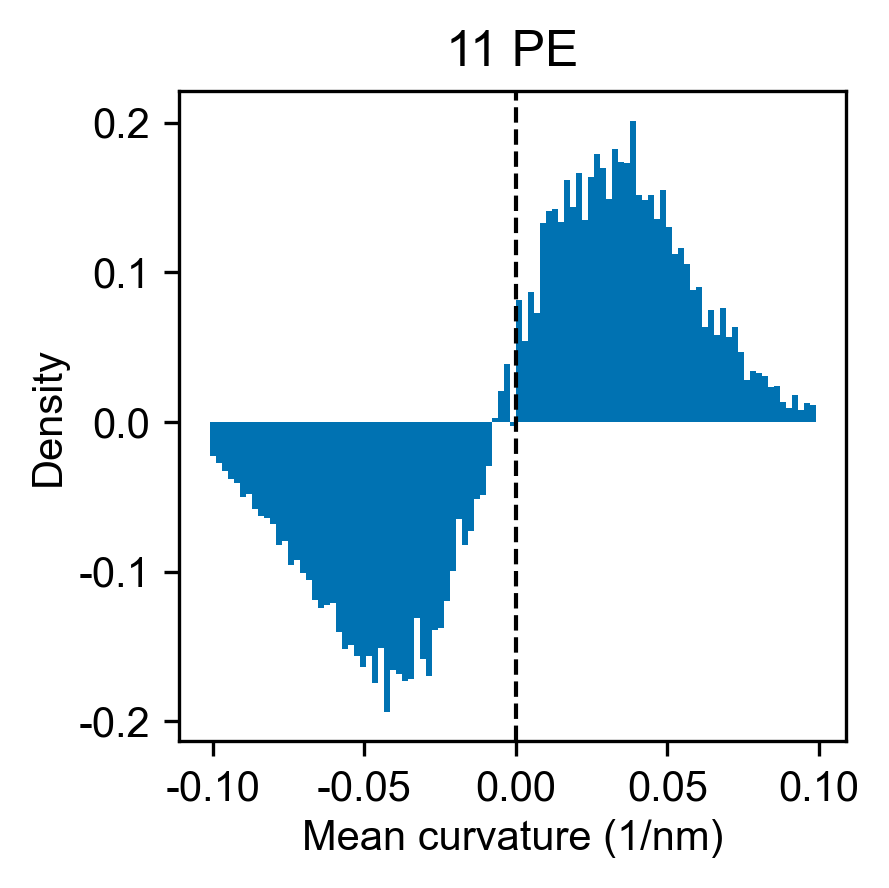

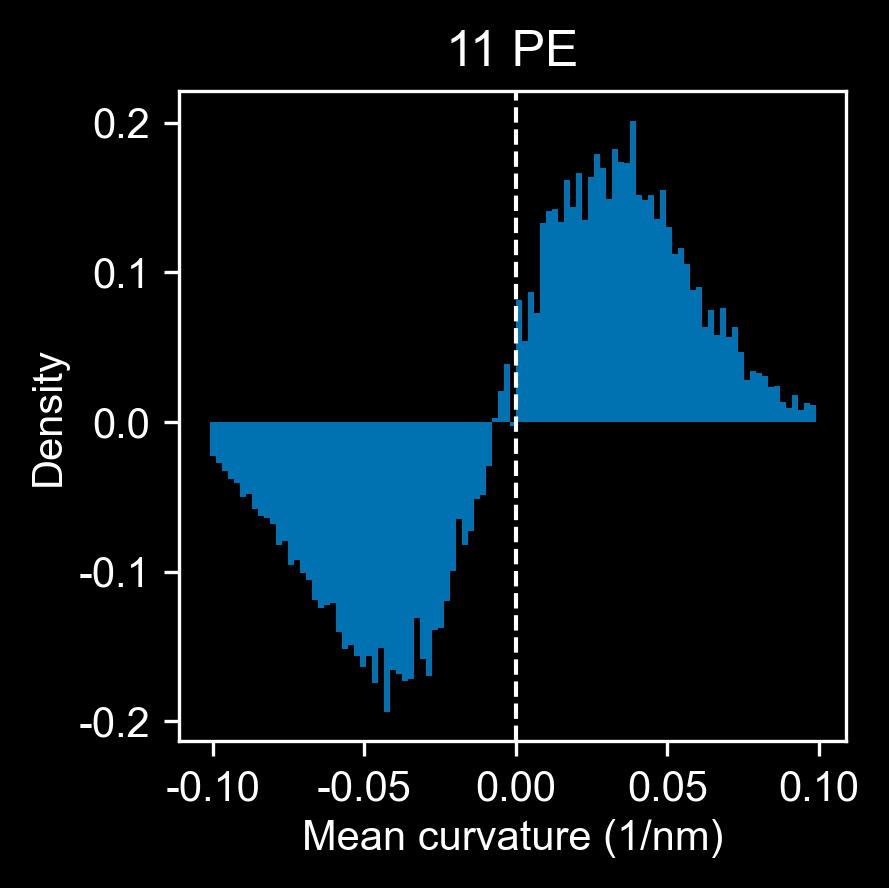

8 Overall mean: 0.0020376366841081415; CDL mean 0.010033132725562607


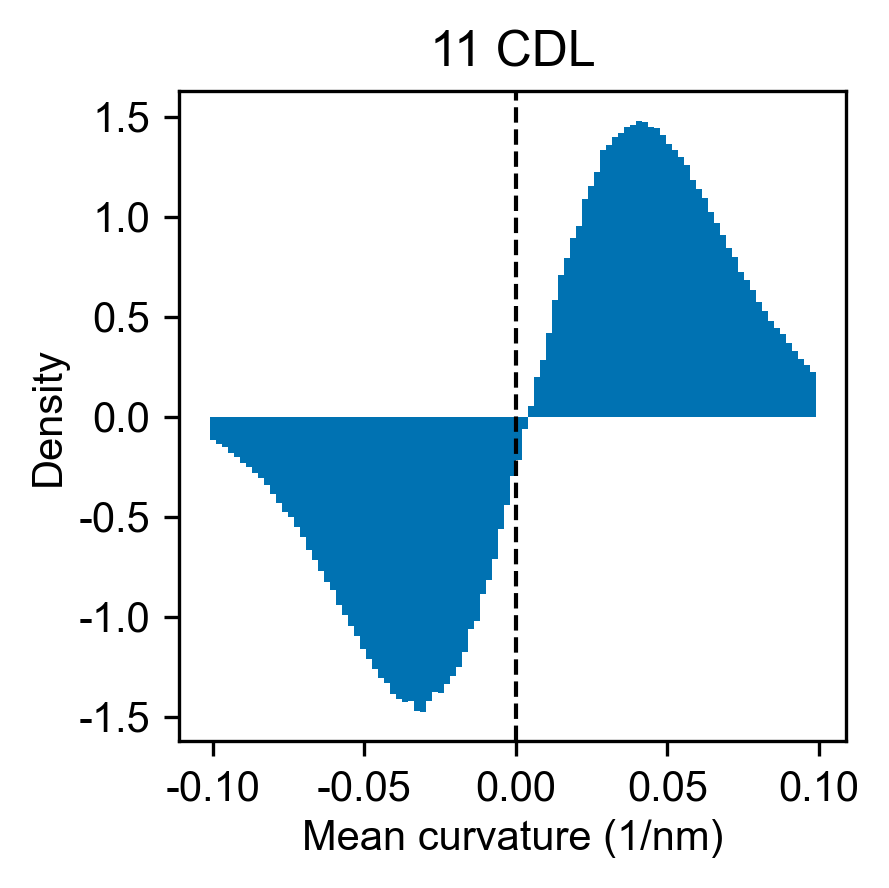

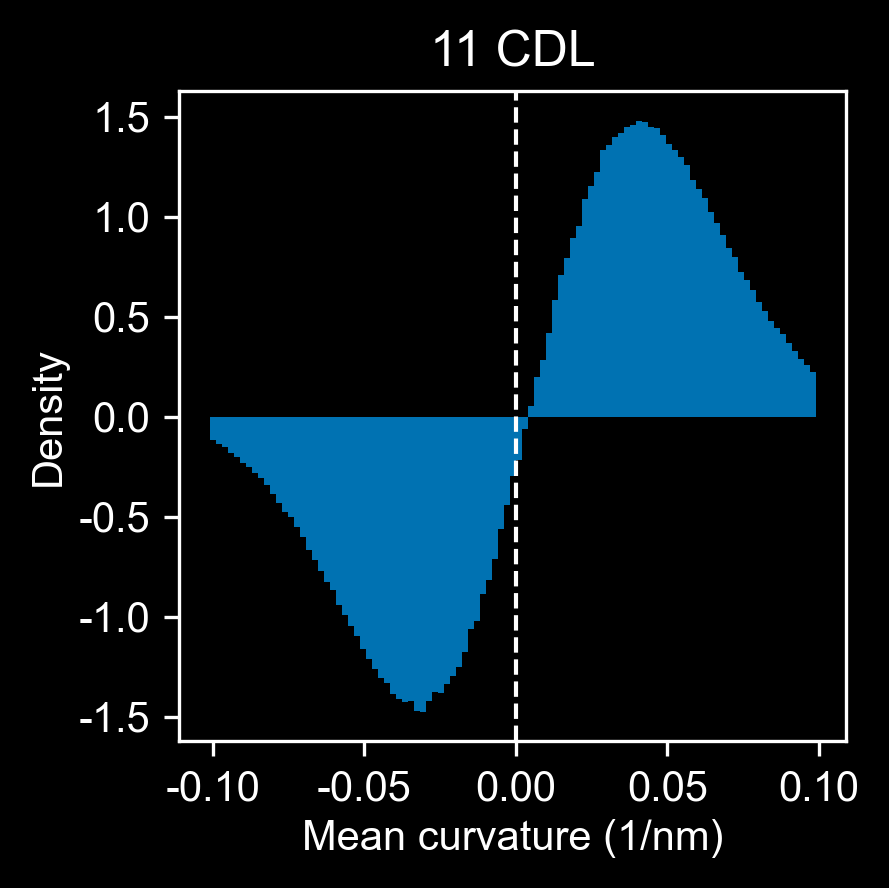

9 Overall mean: 0.0027518304309934235; PC mean -0.0018781112180756663


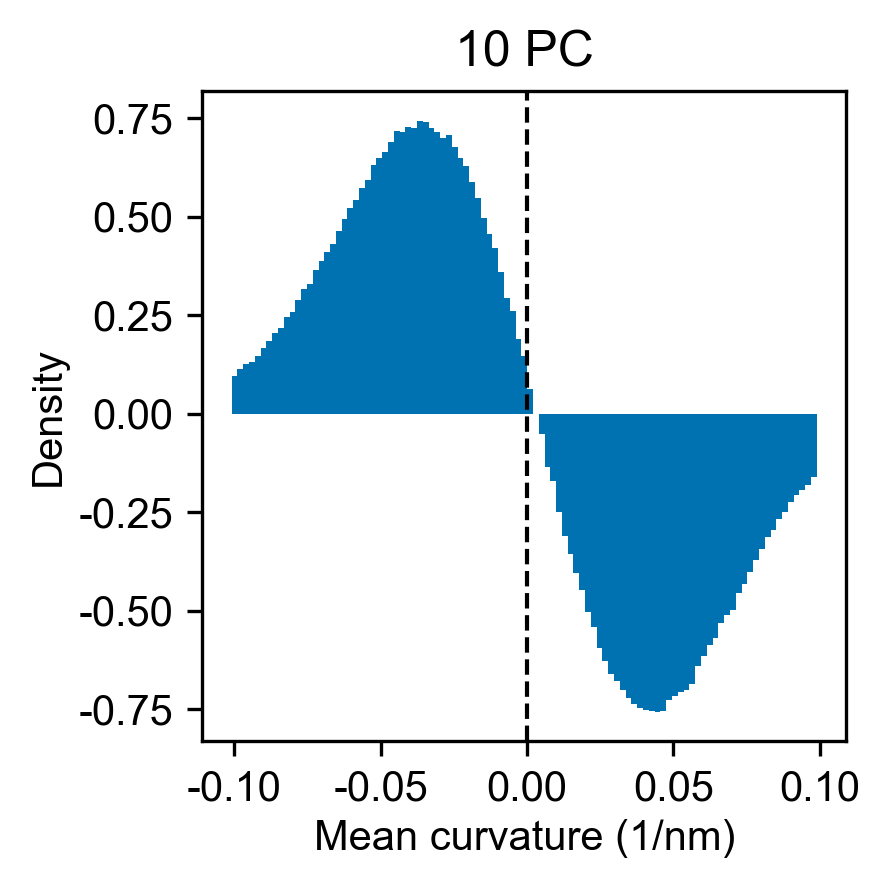

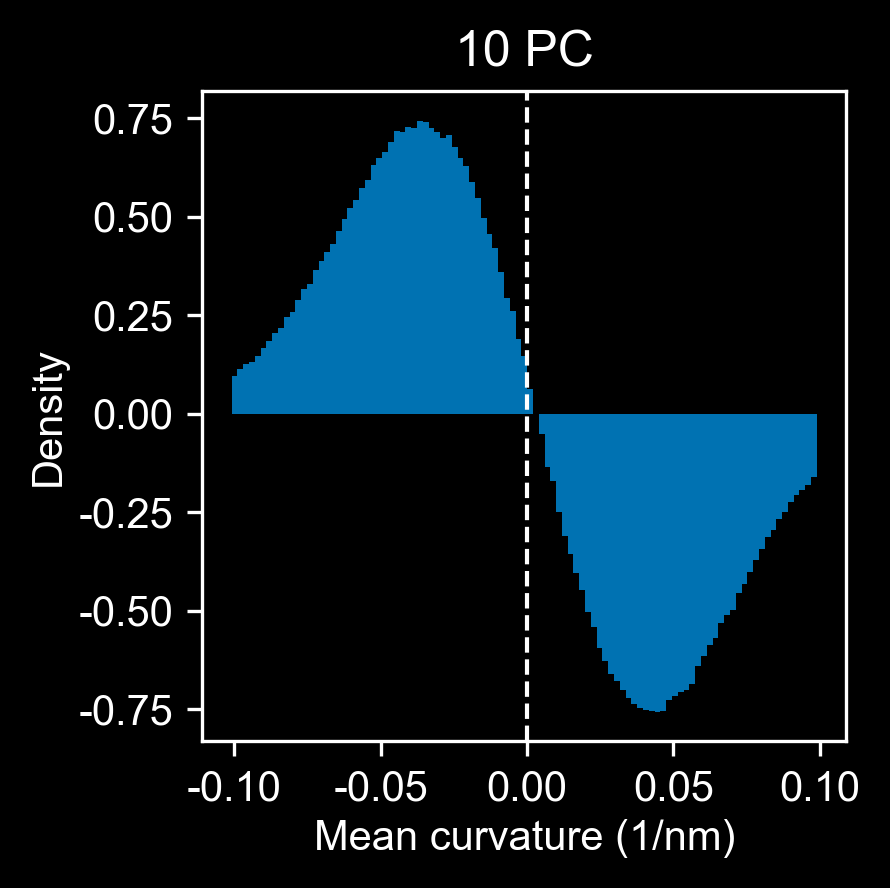

9 Overall mean: 0.0027518304309934235; PE mean 0.0038146488800865092


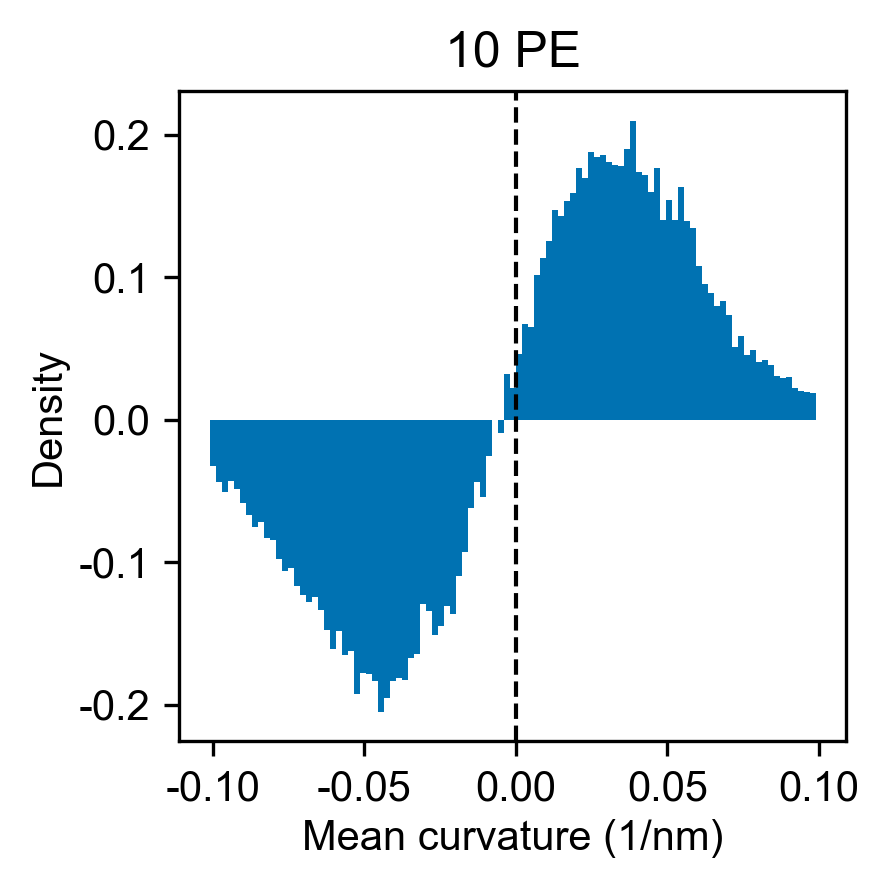

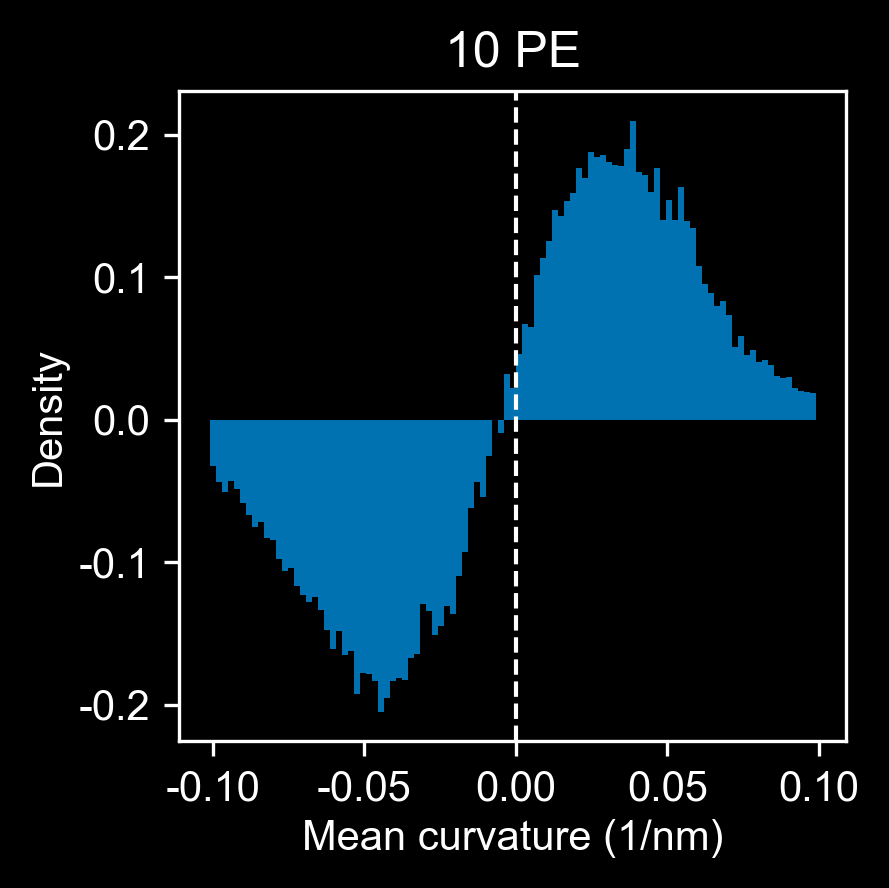

9 Overall mean: 0.0027518304309934235; CDL mean 0.01274763662974692


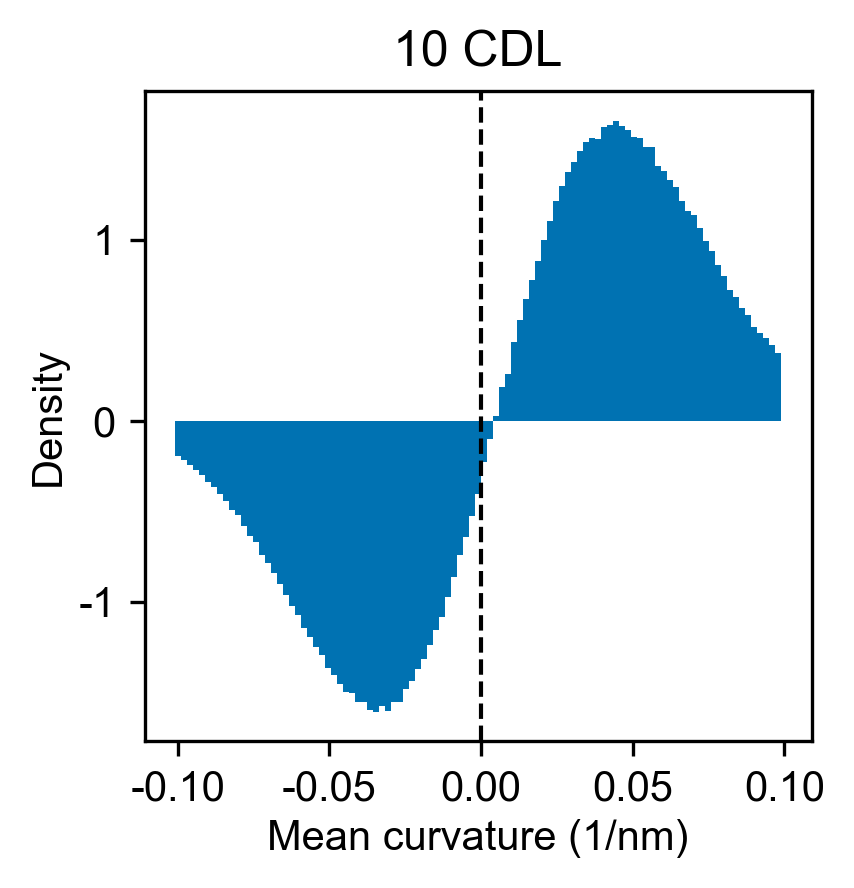

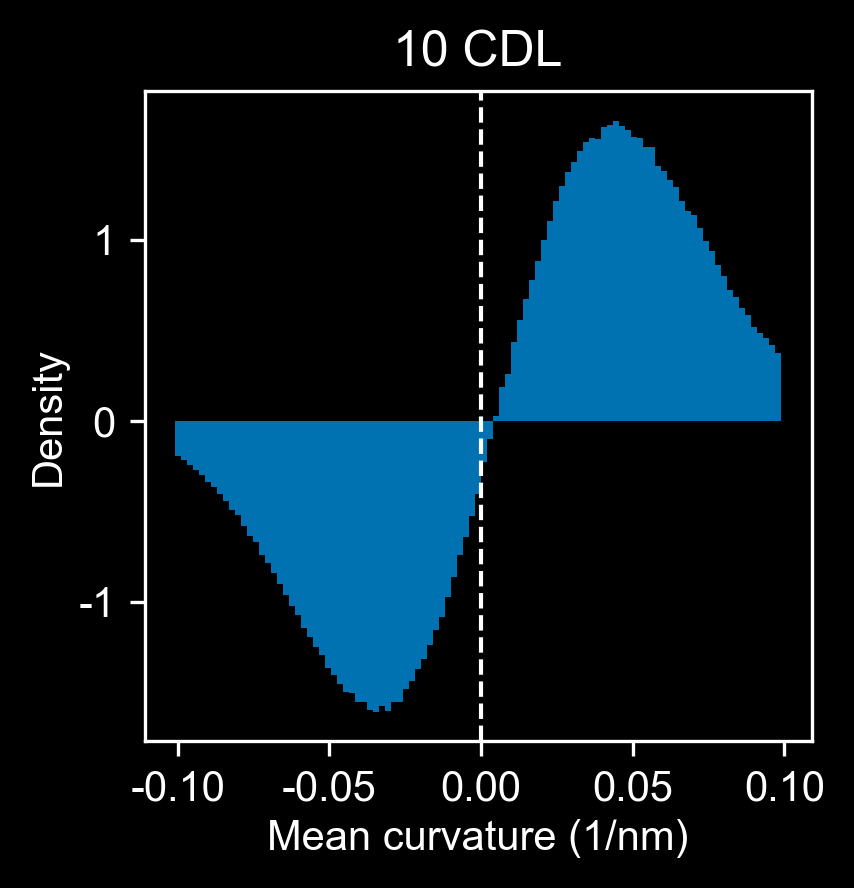

10 Overall mean: 0.001431194377132048; PC mean 0.0005952851508288856


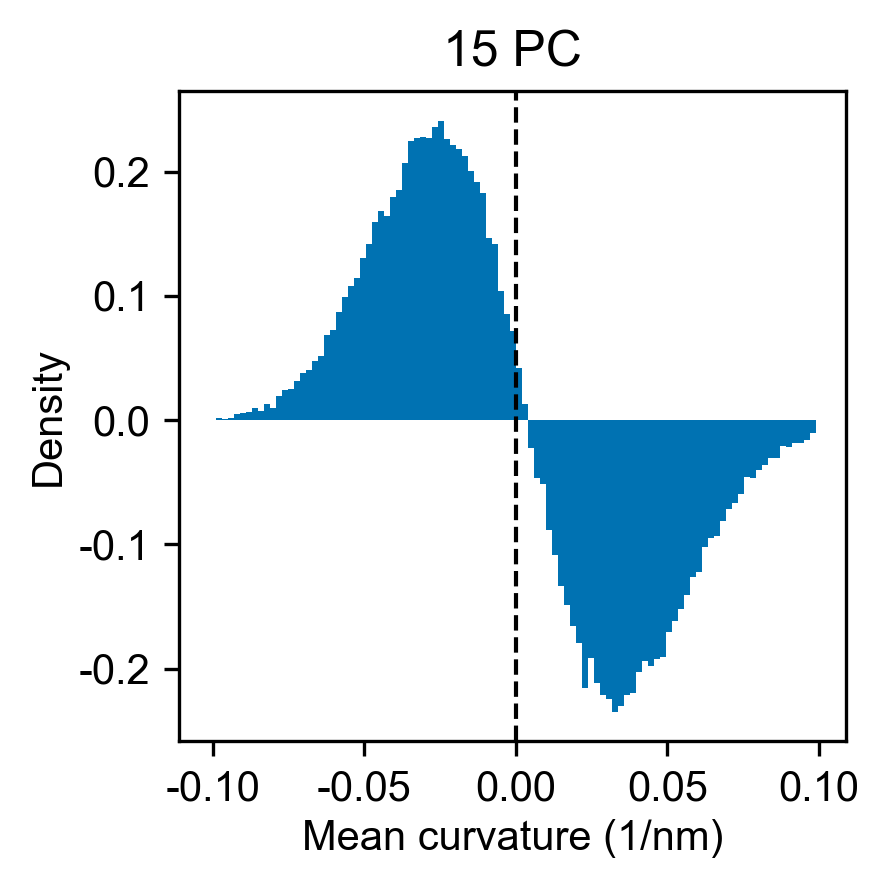

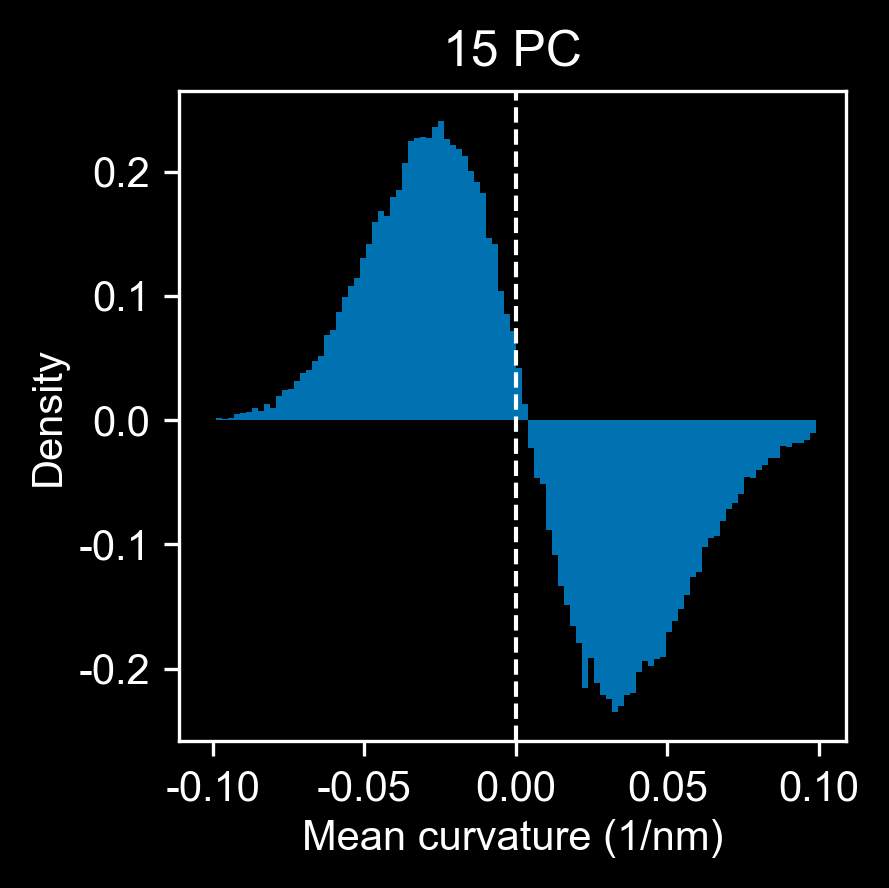

10 Overall mean: 0.001431194377132048; PE mean 0.002731617054986098


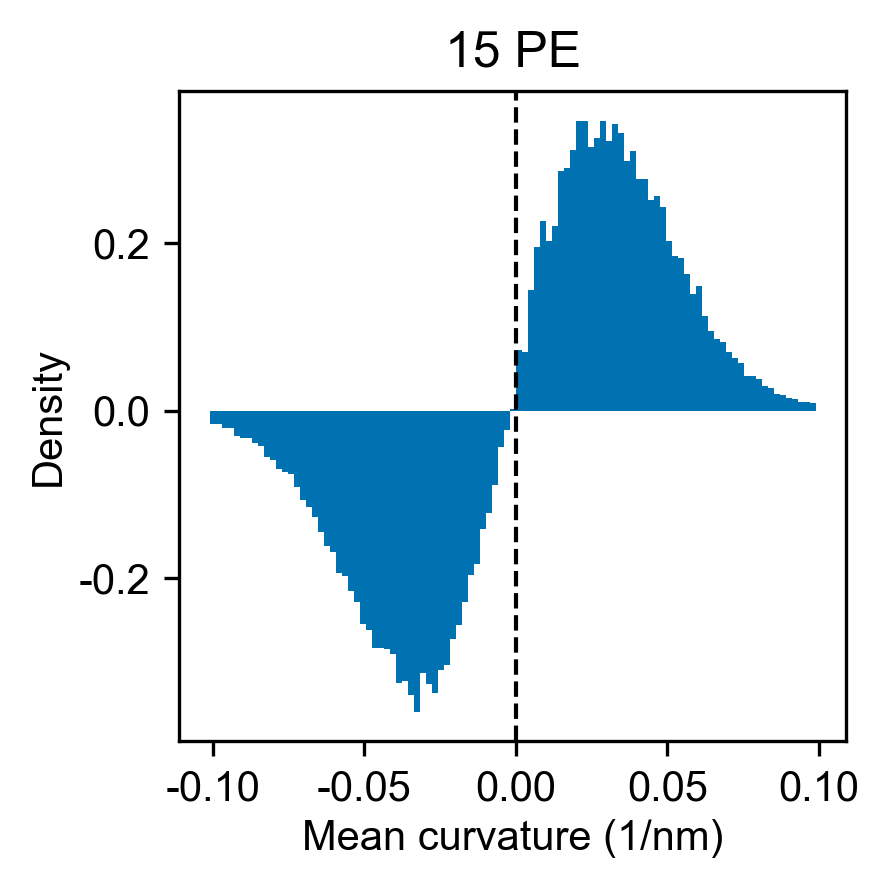

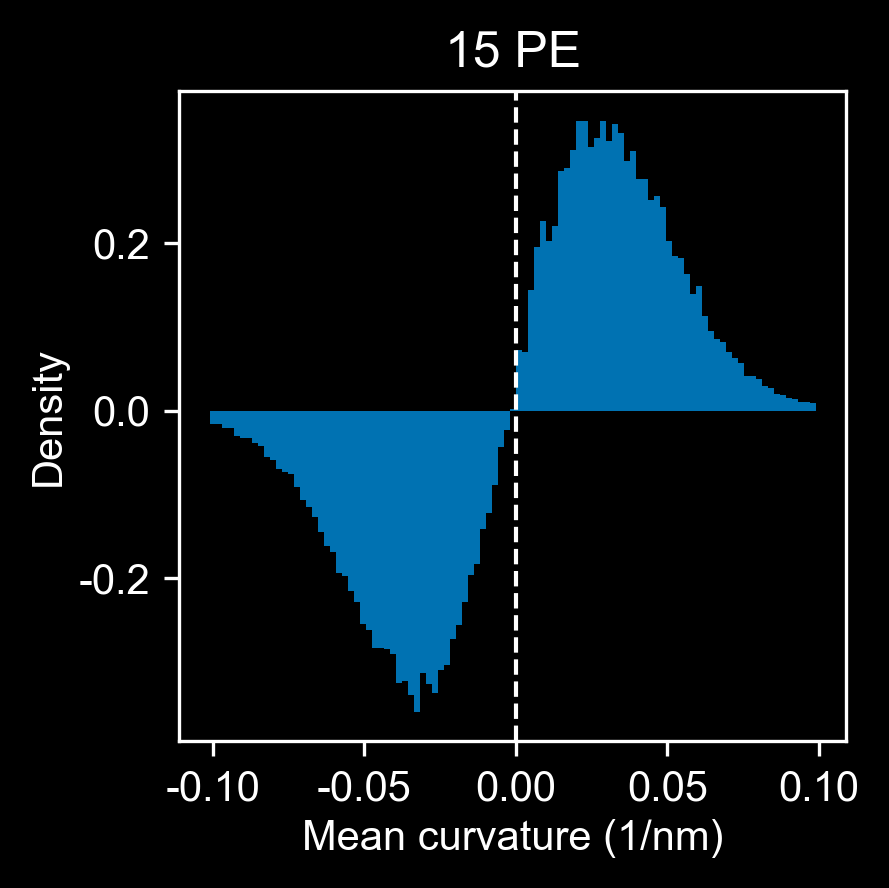

10 Overall mean: 0.001431194377132048; PG mean 0.0015011077865971078


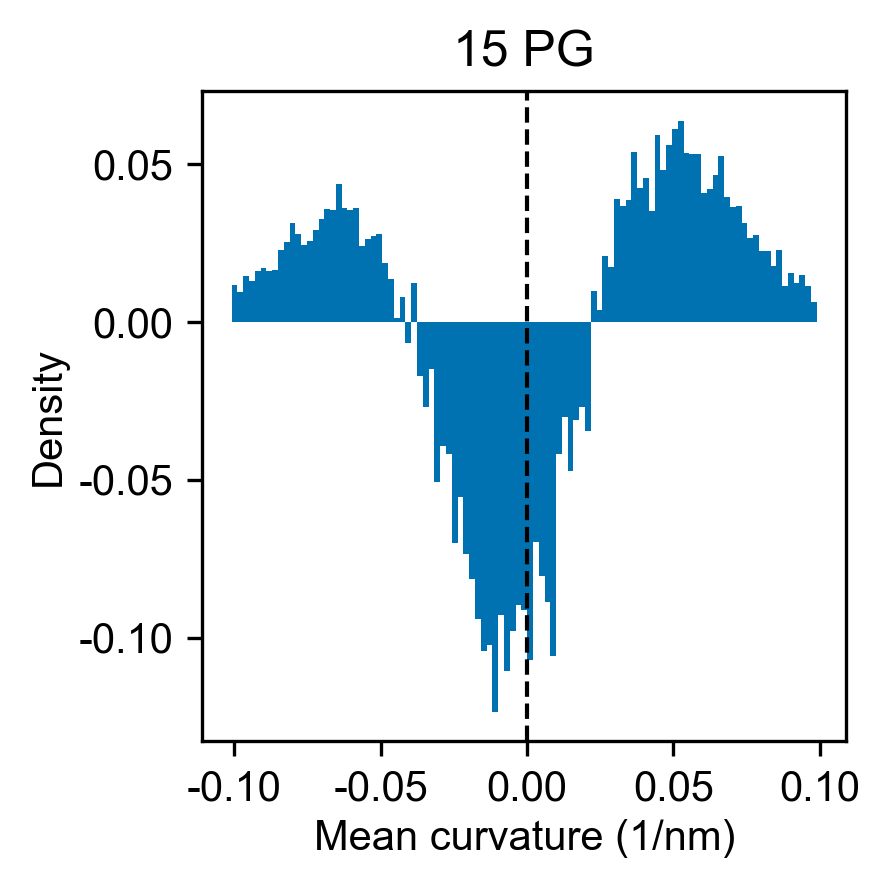

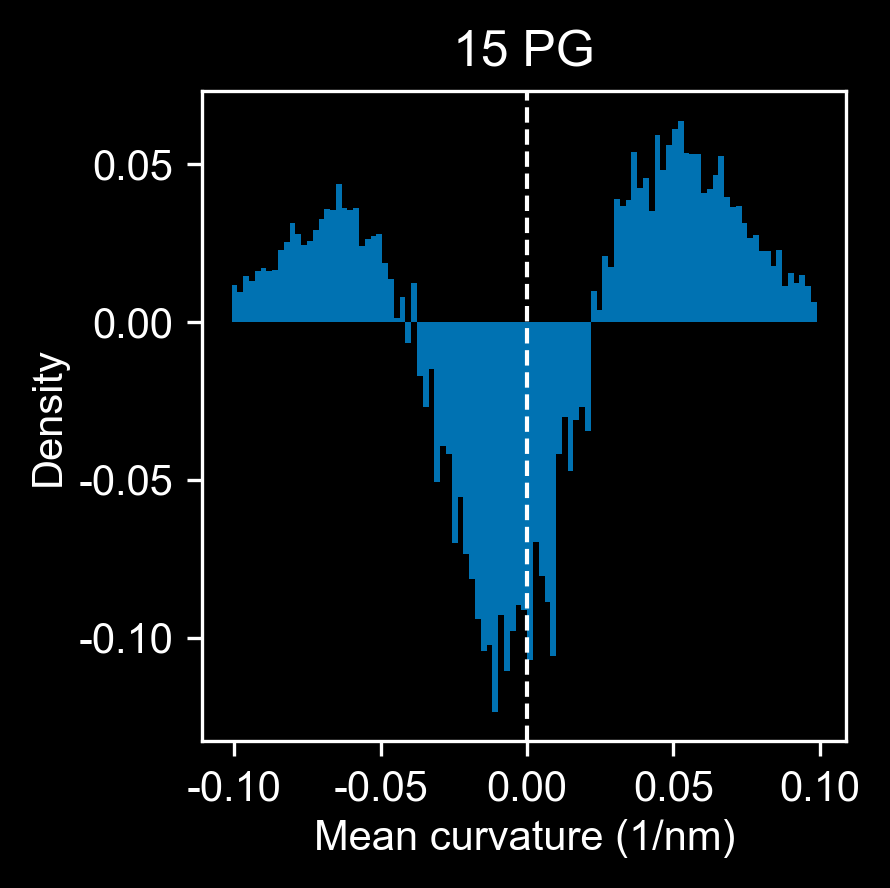

11 Overall mean: 0.0016228107862659973; PC mean 0.0007255600489781699


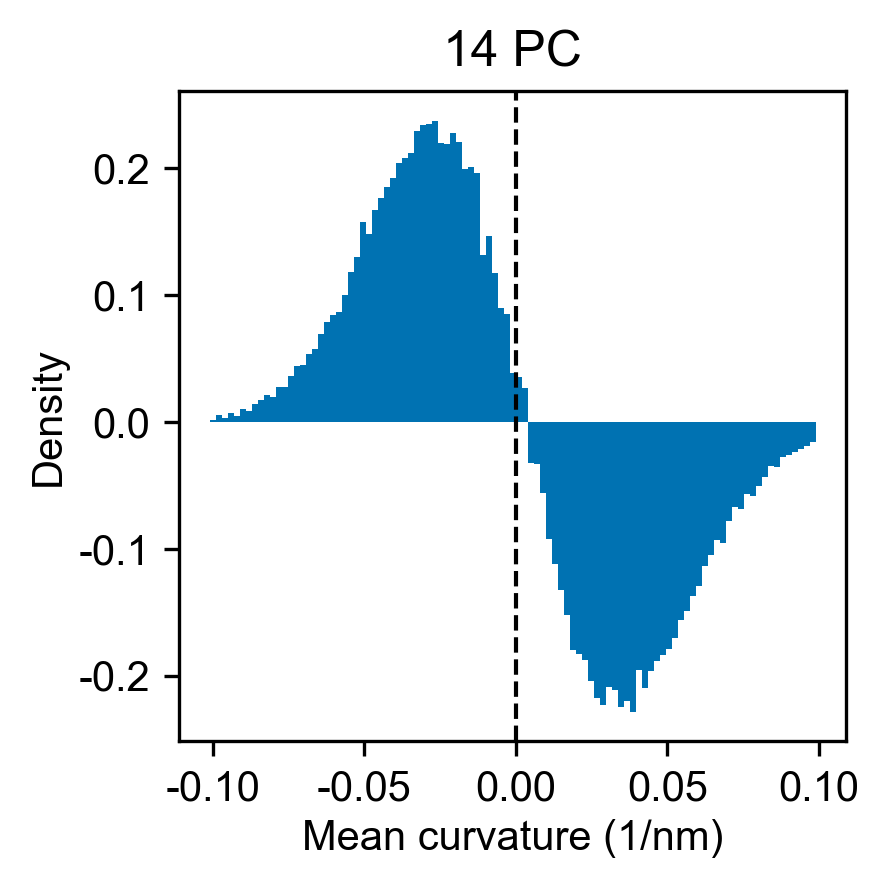

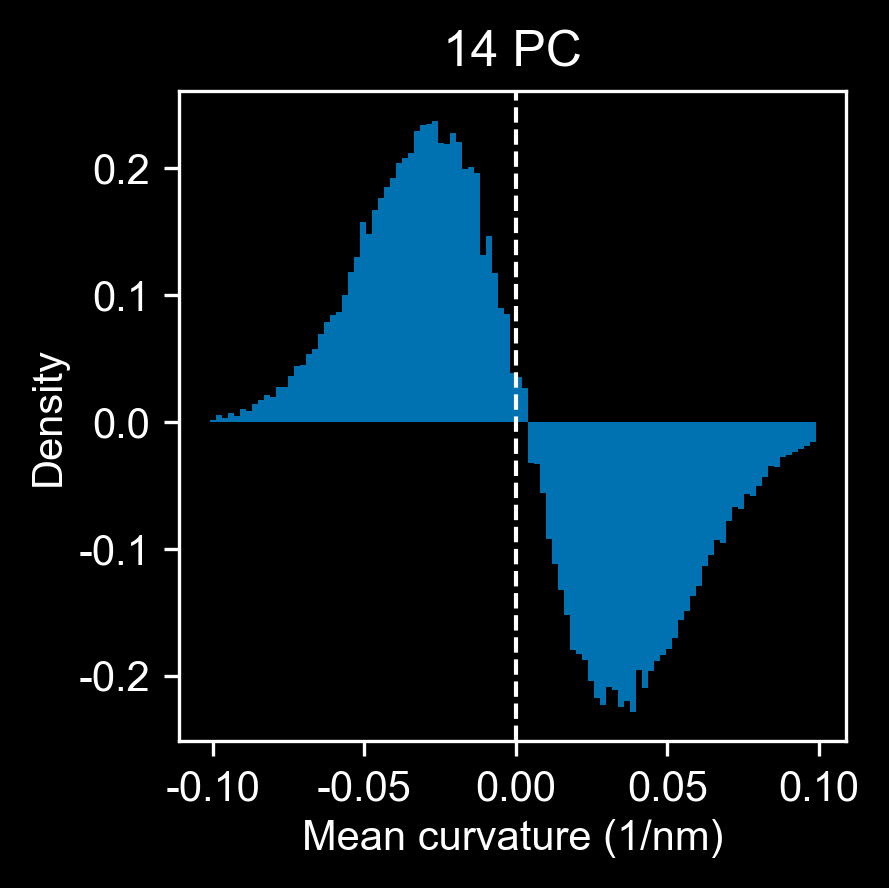

11 Overall mean: 0.0016228107862659973; PE mean 0.002970183831637837


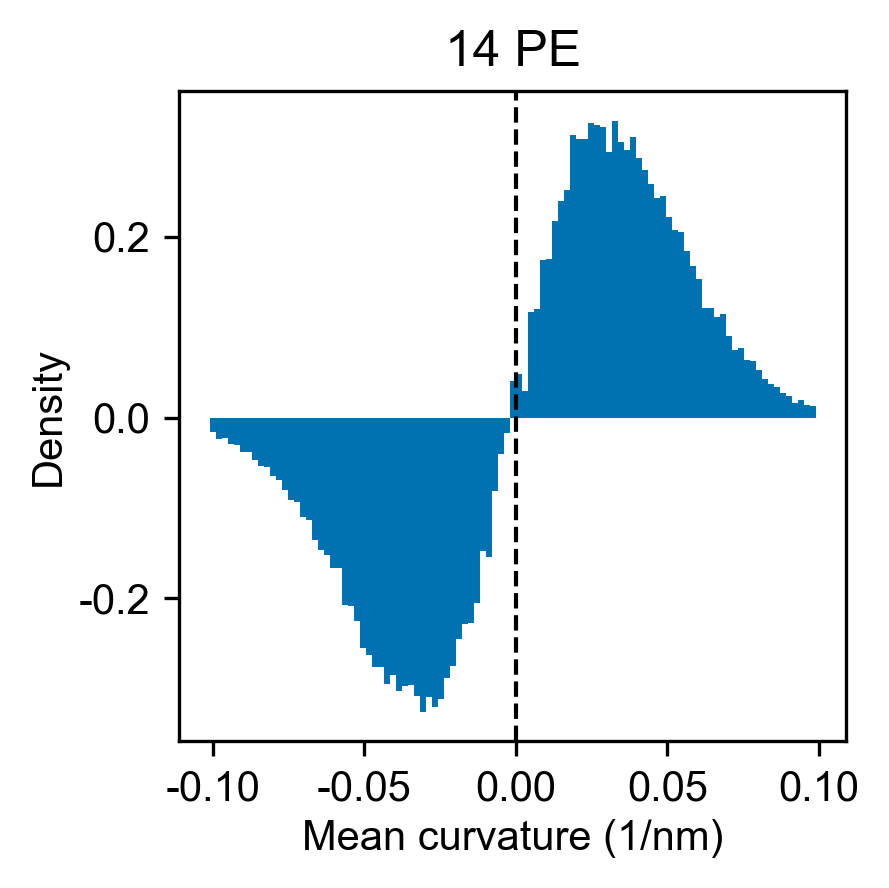

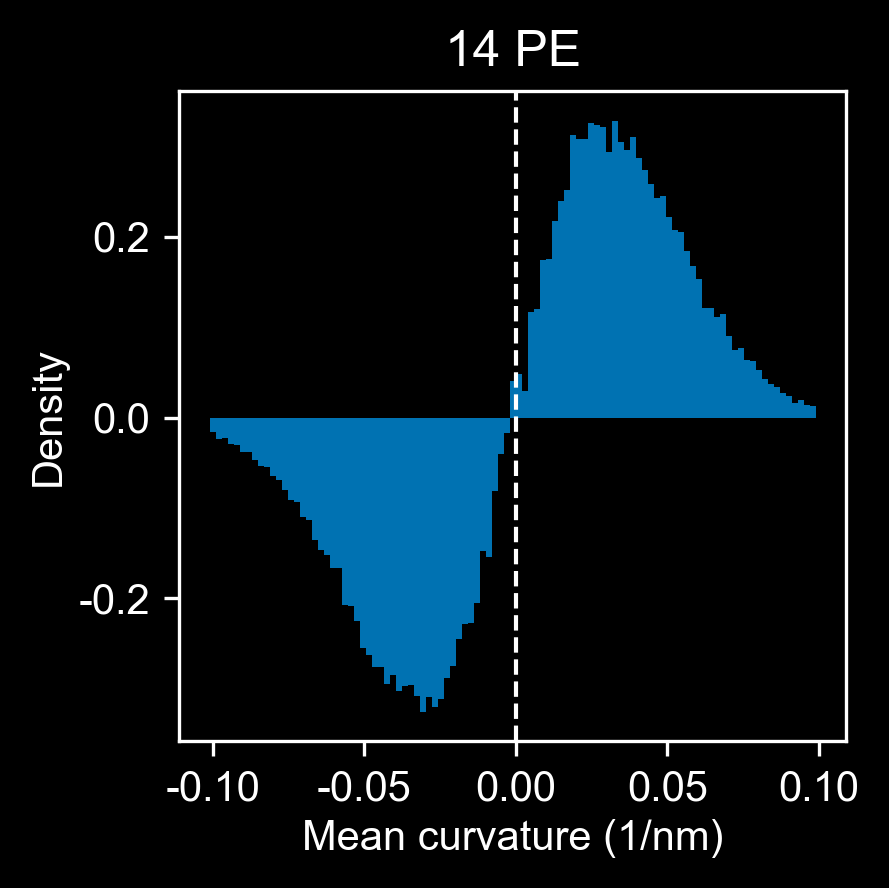

11 Overall mean: 0.0016228107862659973; PG mean 0.0017342584316517023


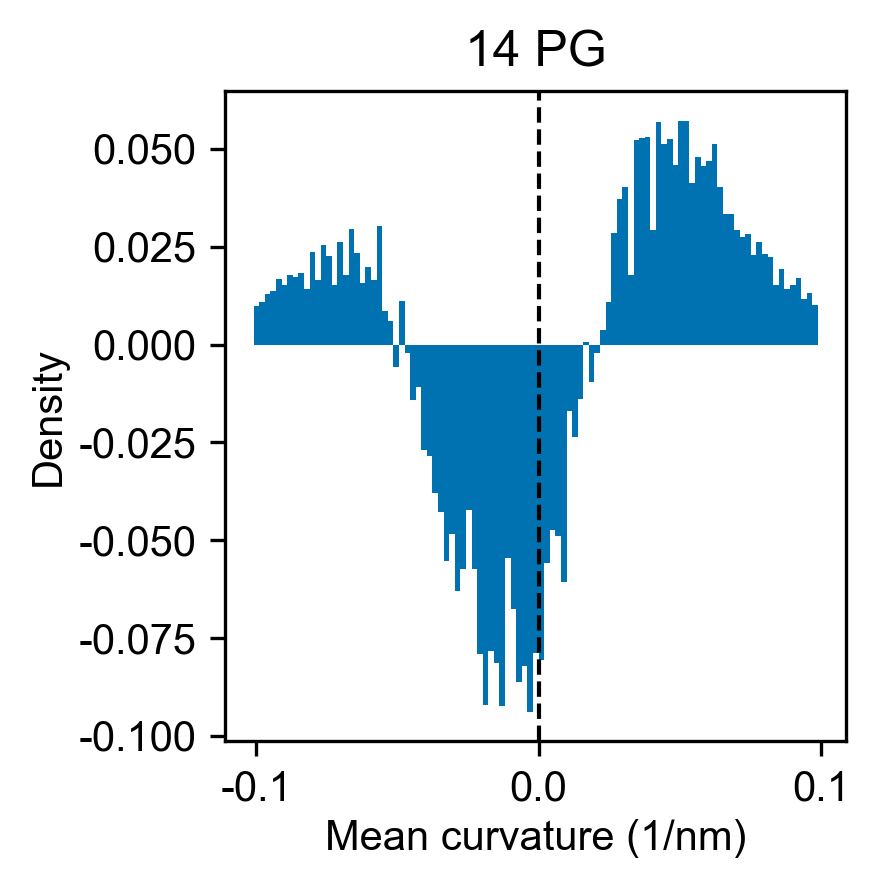

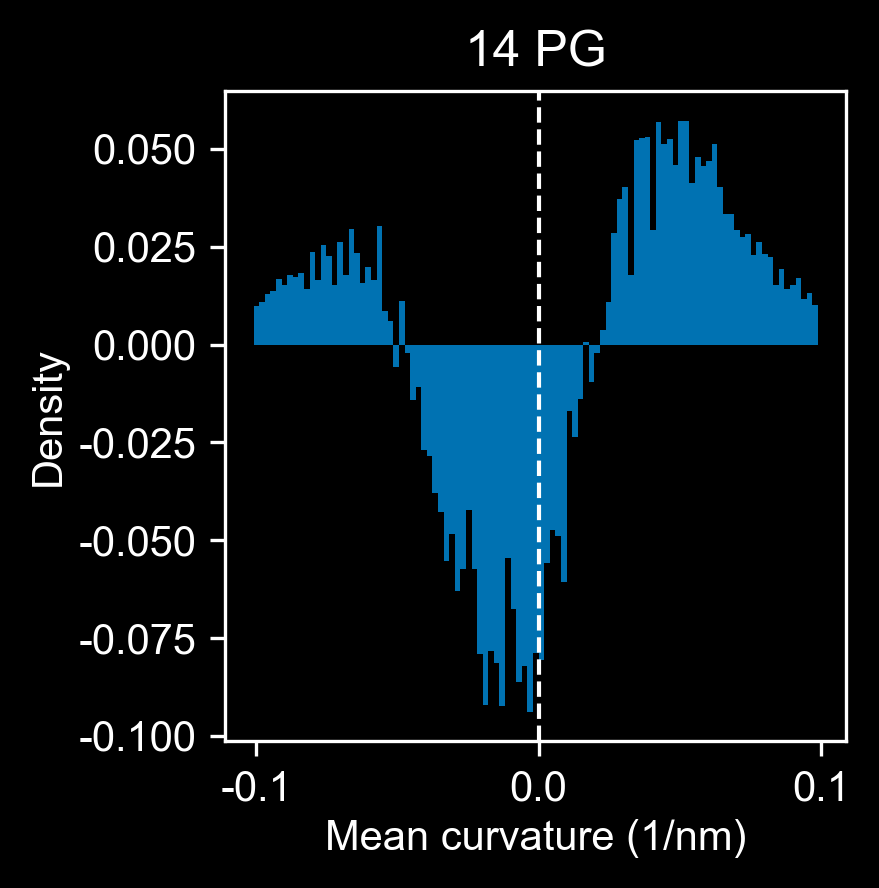

12 Overall mean: 0.001609022402265882; PC mean 0.0004246195837650924


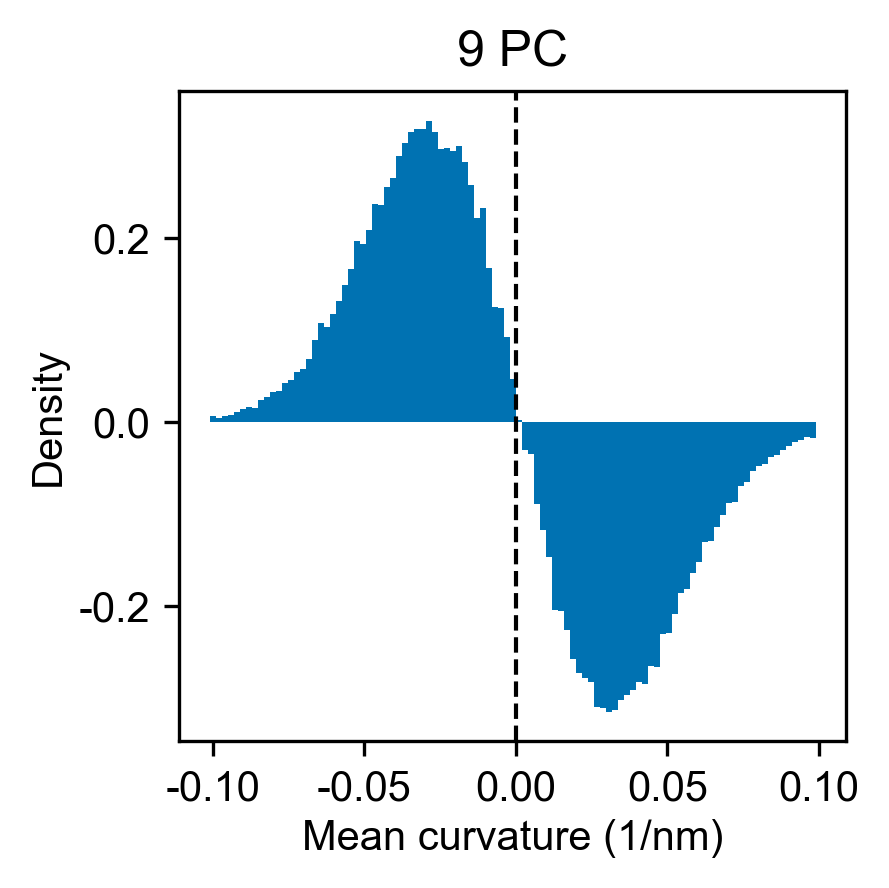

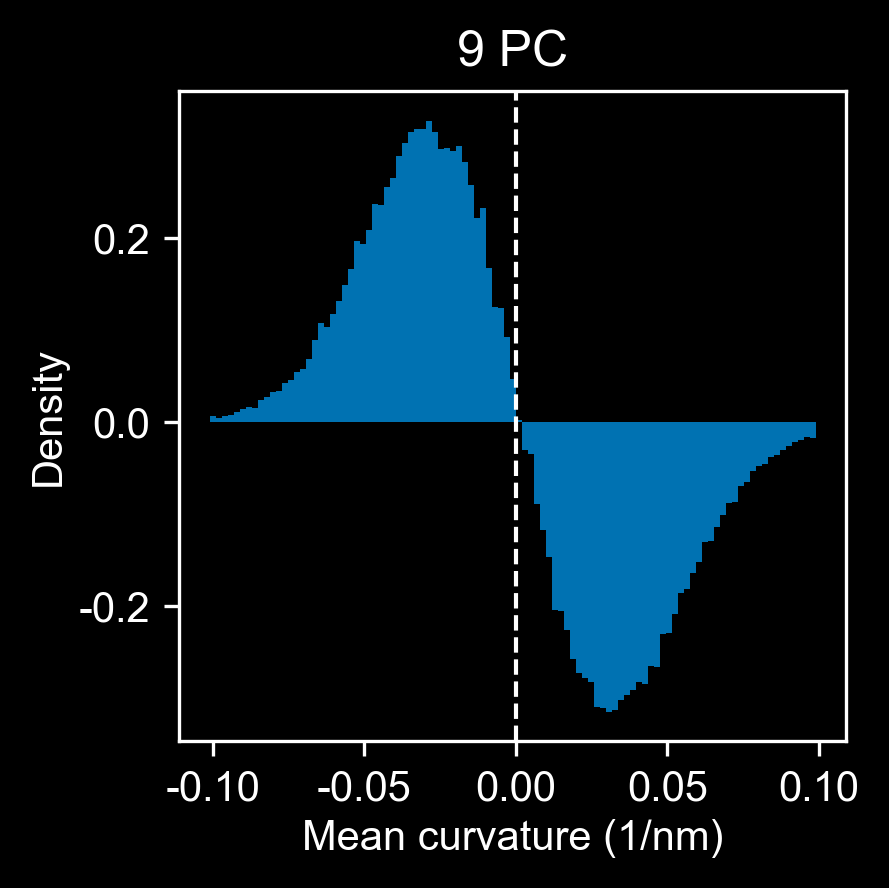

12 Overall mean: 0.001609022402265882; PE mean 0.0027435195150411133


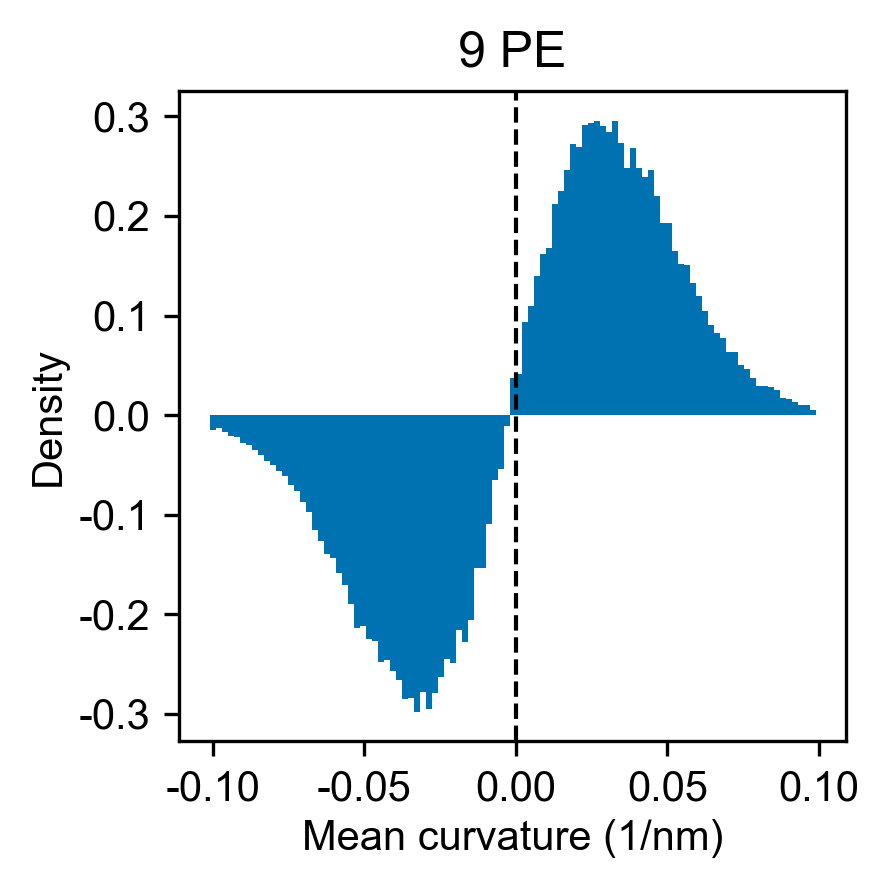

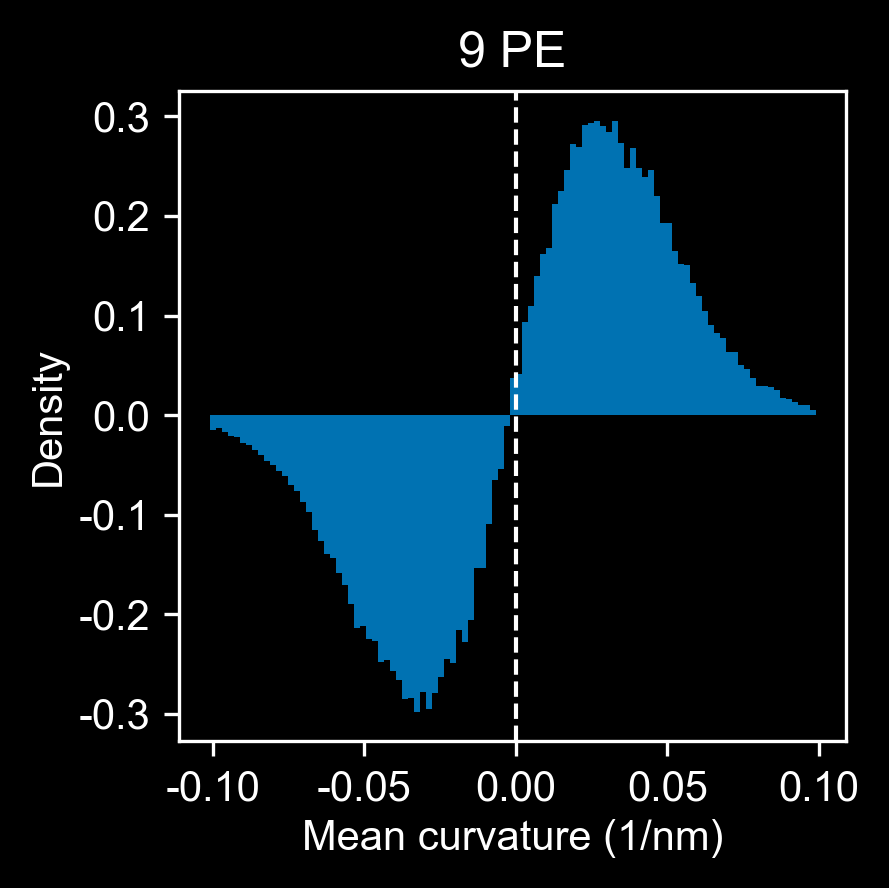

12 Overall mean: 0.001609022402265882; PG mean 0.0016872299778821177


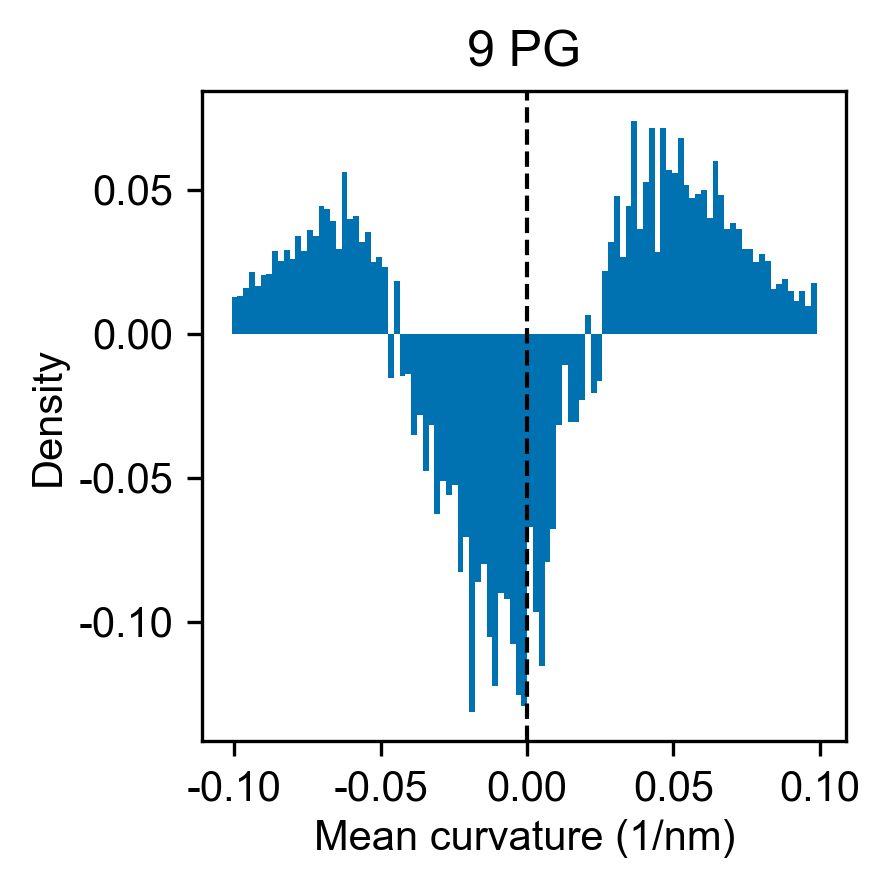

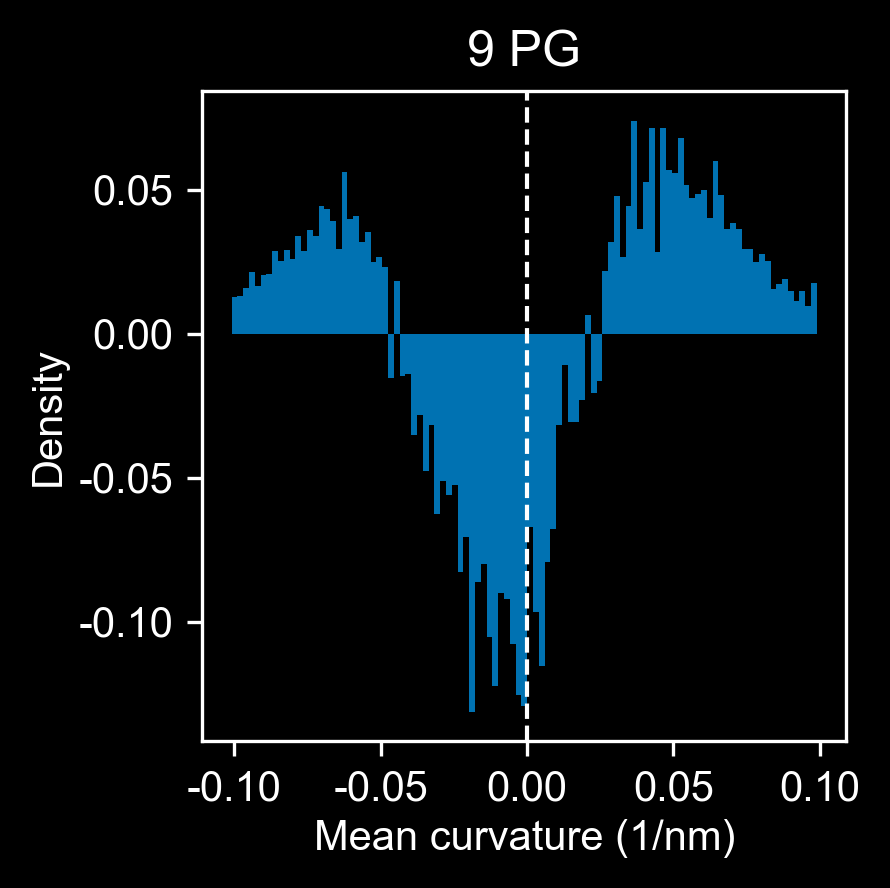

13 Overall mean: 0.002233071628219519; PC mean -0.0009964065129638745


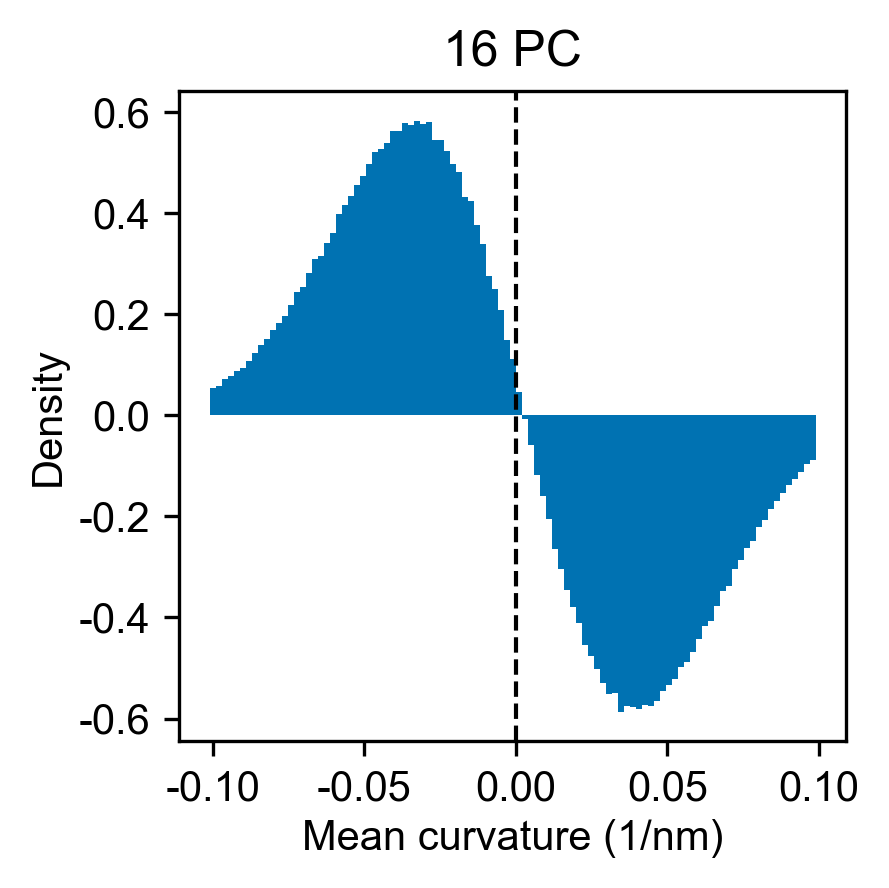

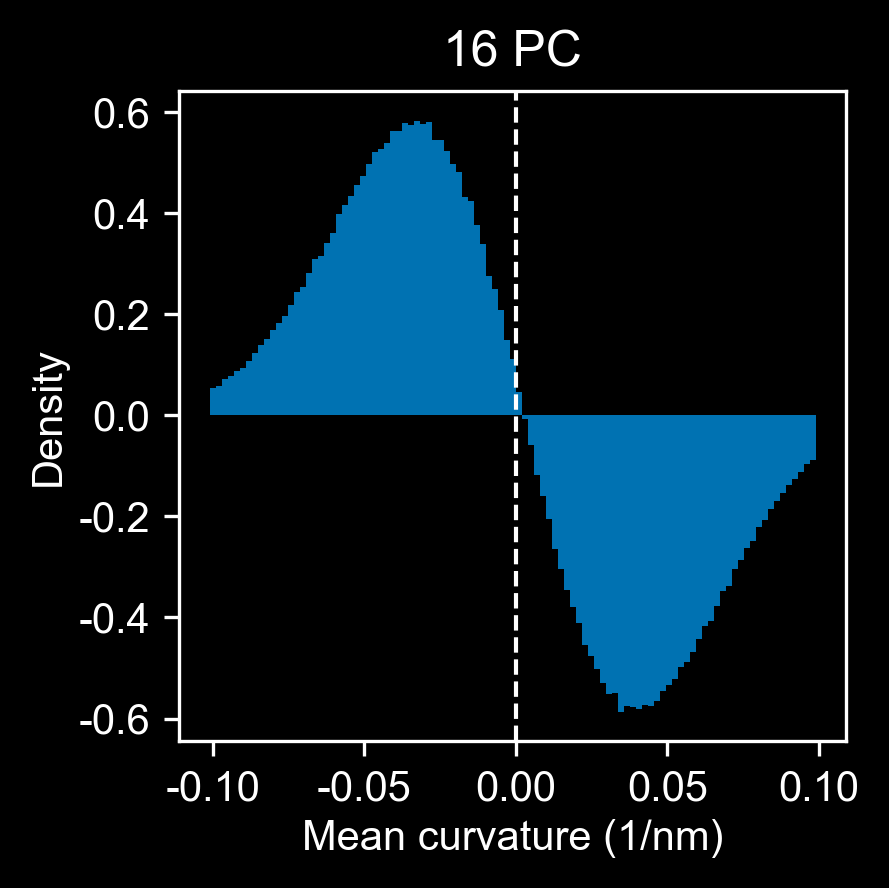

13 Overall mean: 0.002233071628219519; PE mean 0.003471534256998452


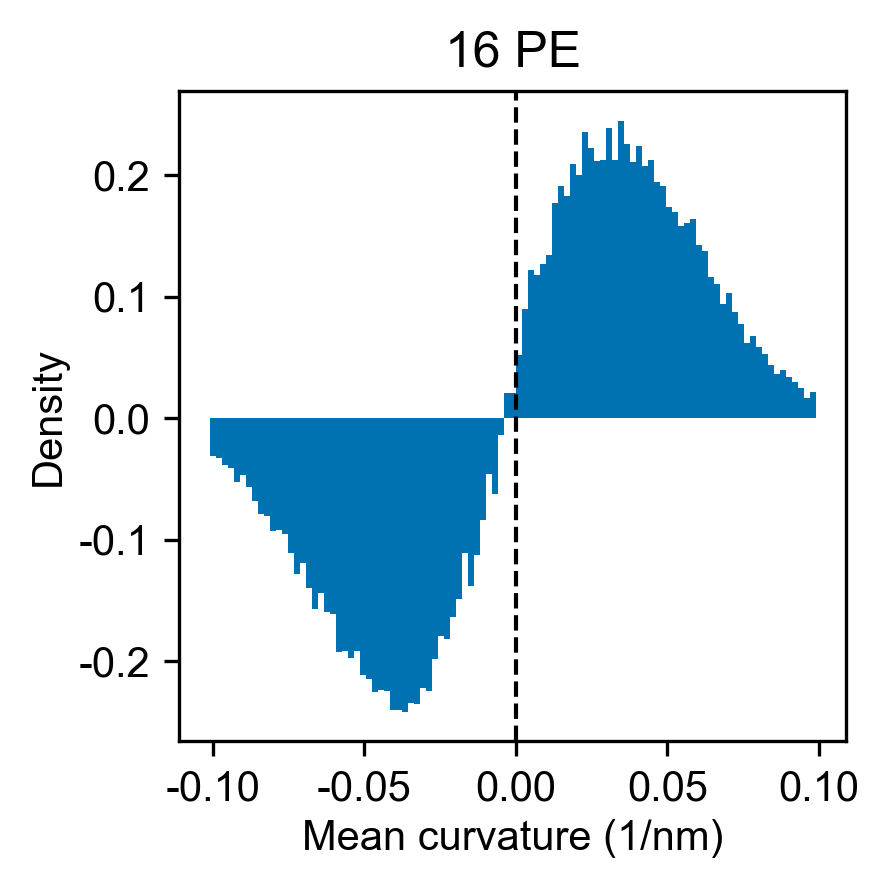

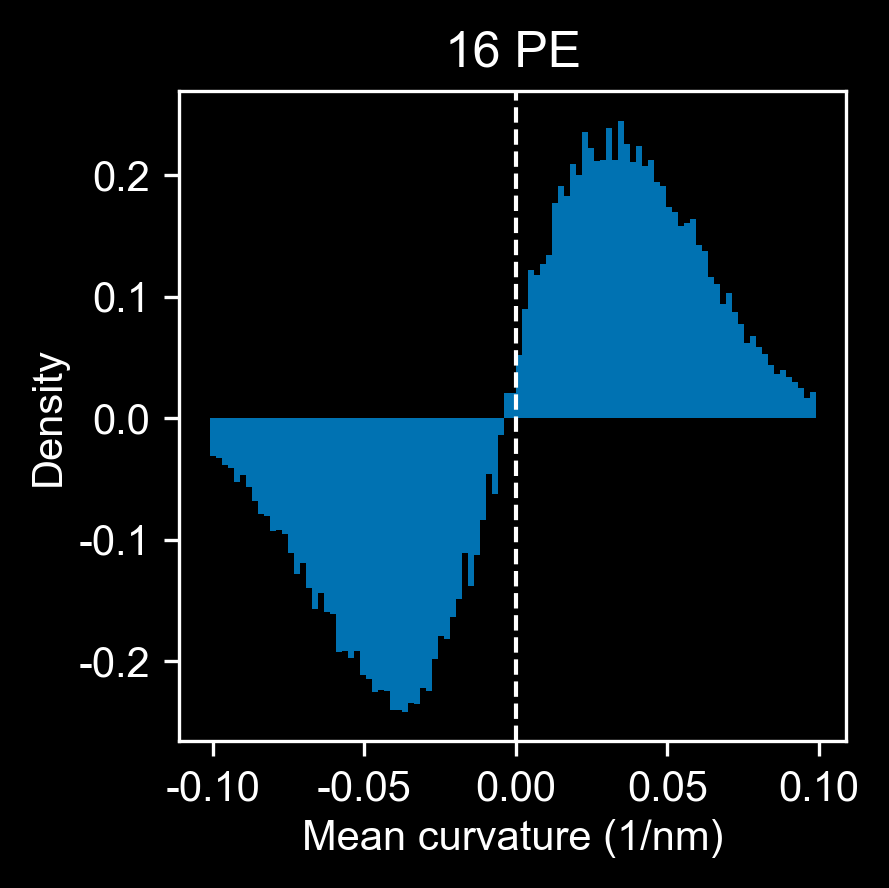

13 Overall mean: 0.002233071628219519; CDL mean 0.011094298056080233


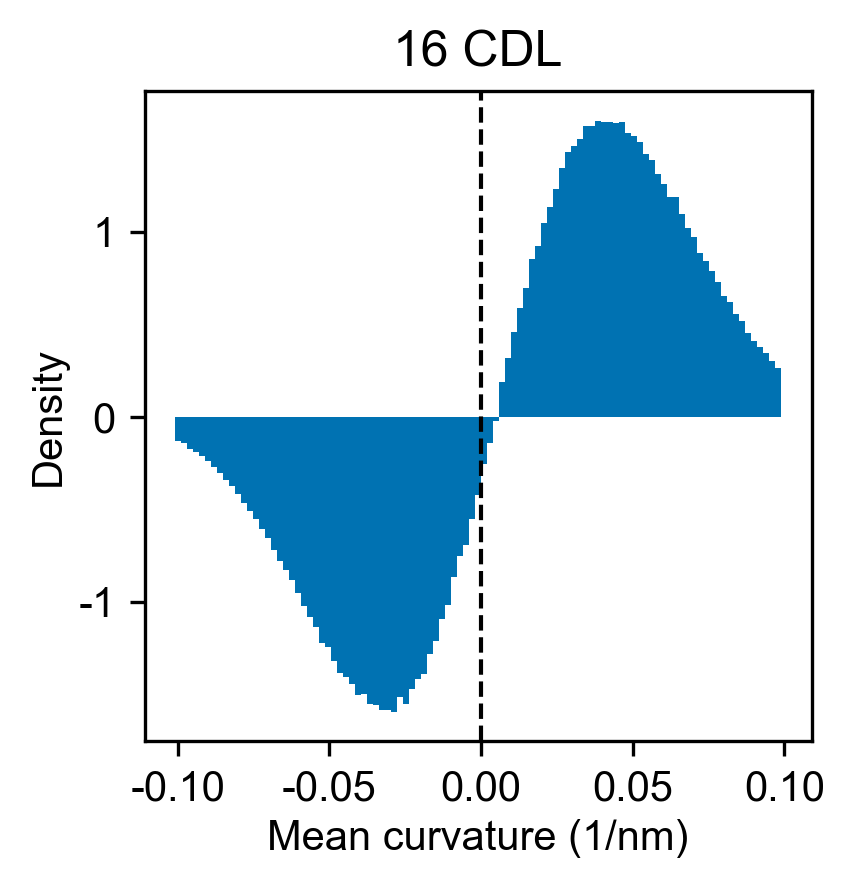

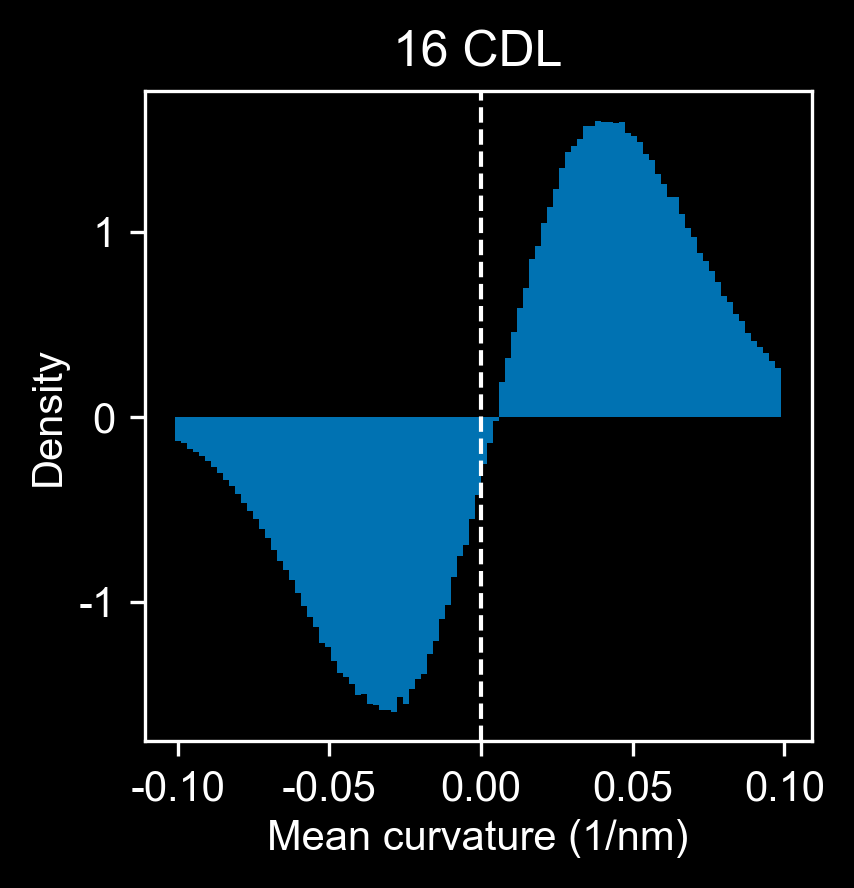

14 Overall mean: 0.0019705048396153947; PC mean -0.0001543315051150362


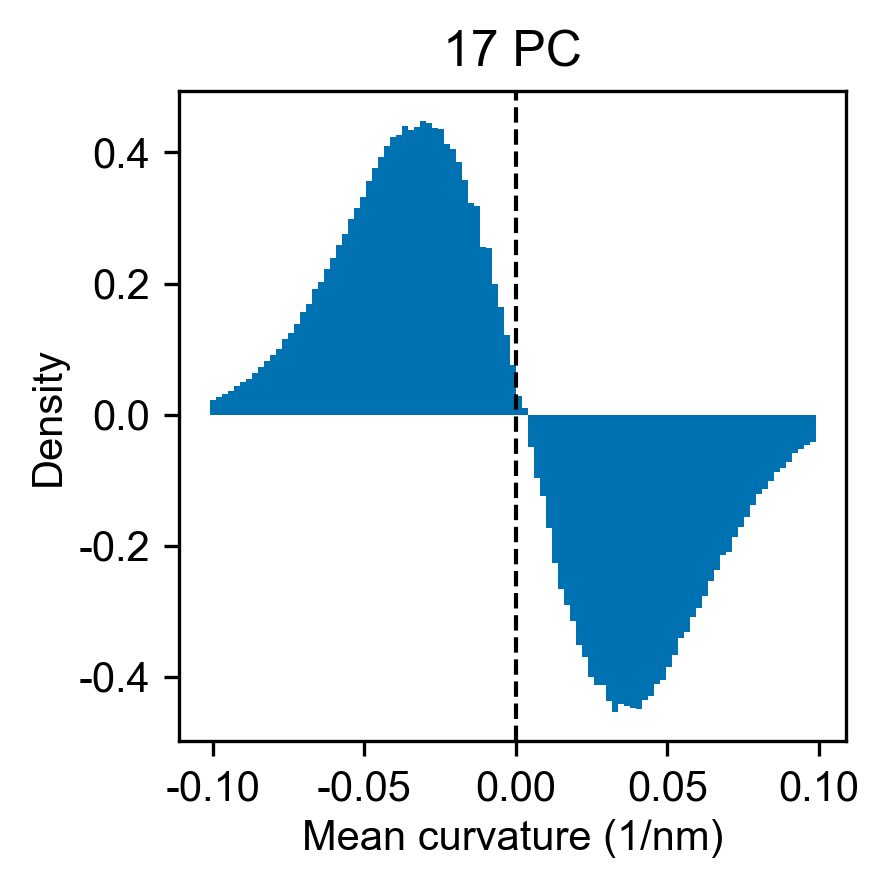

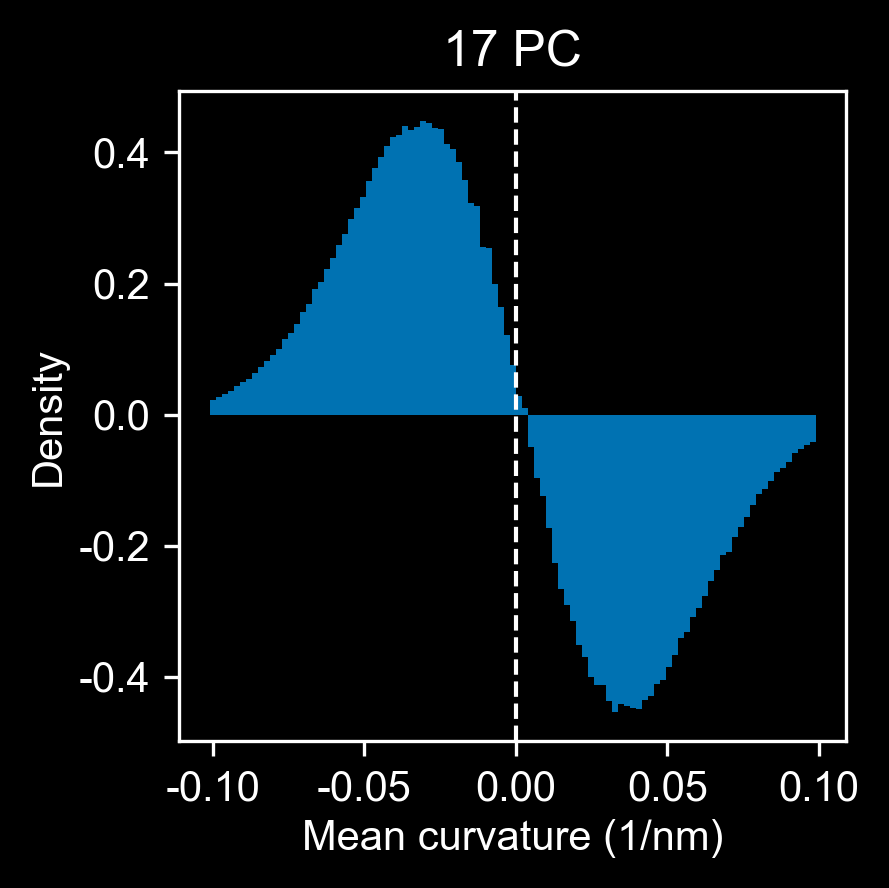

14 Overall mean: 0.0019705048396153947; PE mean 0.0034570863388196384


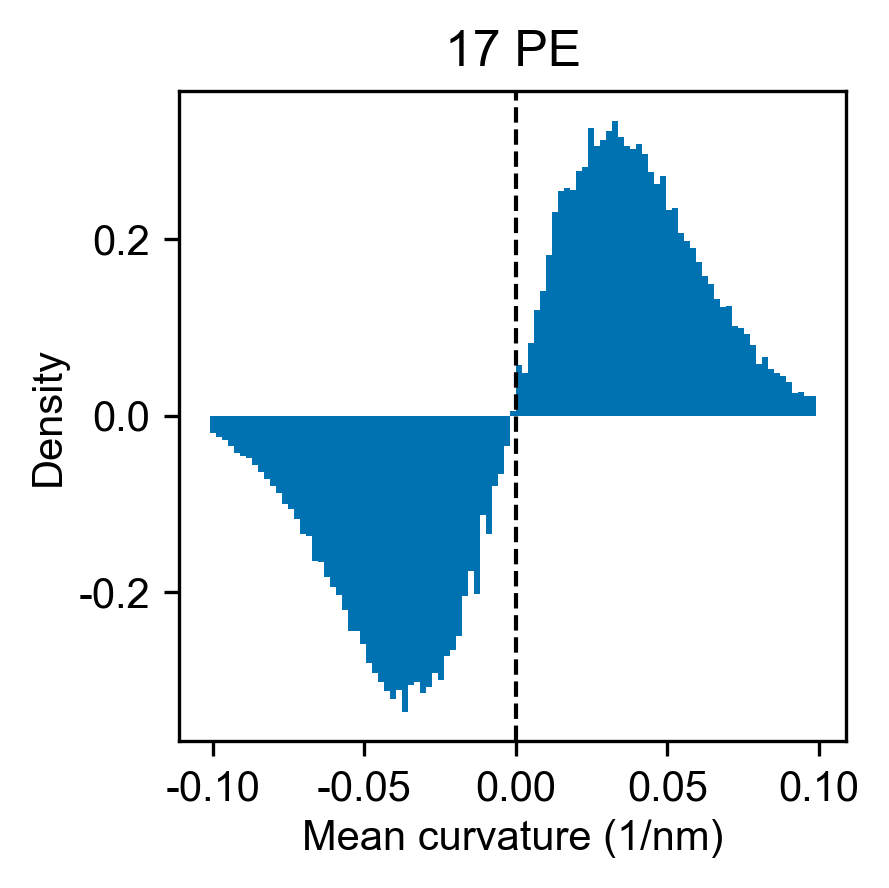

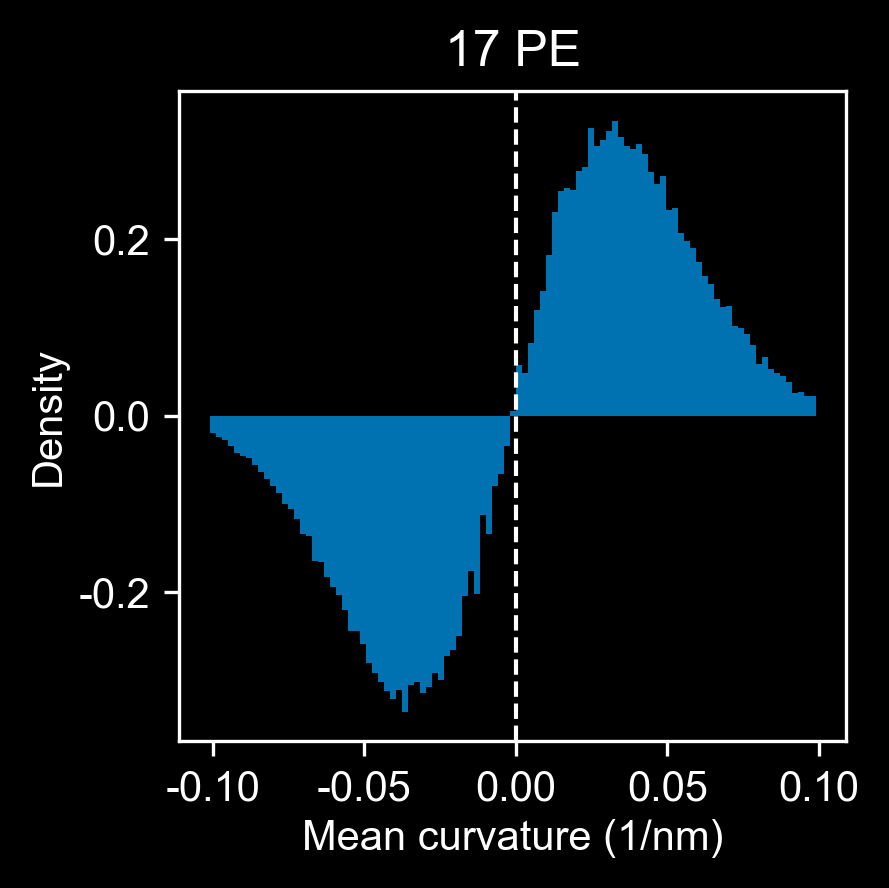

14 Overall mean: 0.0019705048396153947; CDL mean 0.011018259648154045


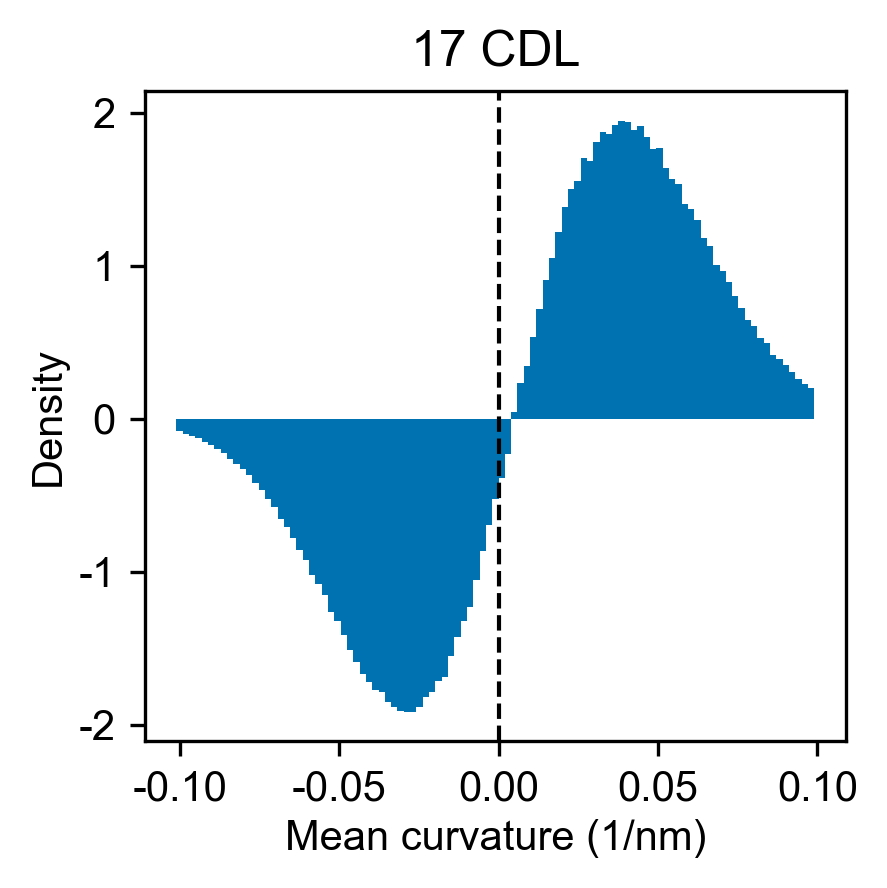

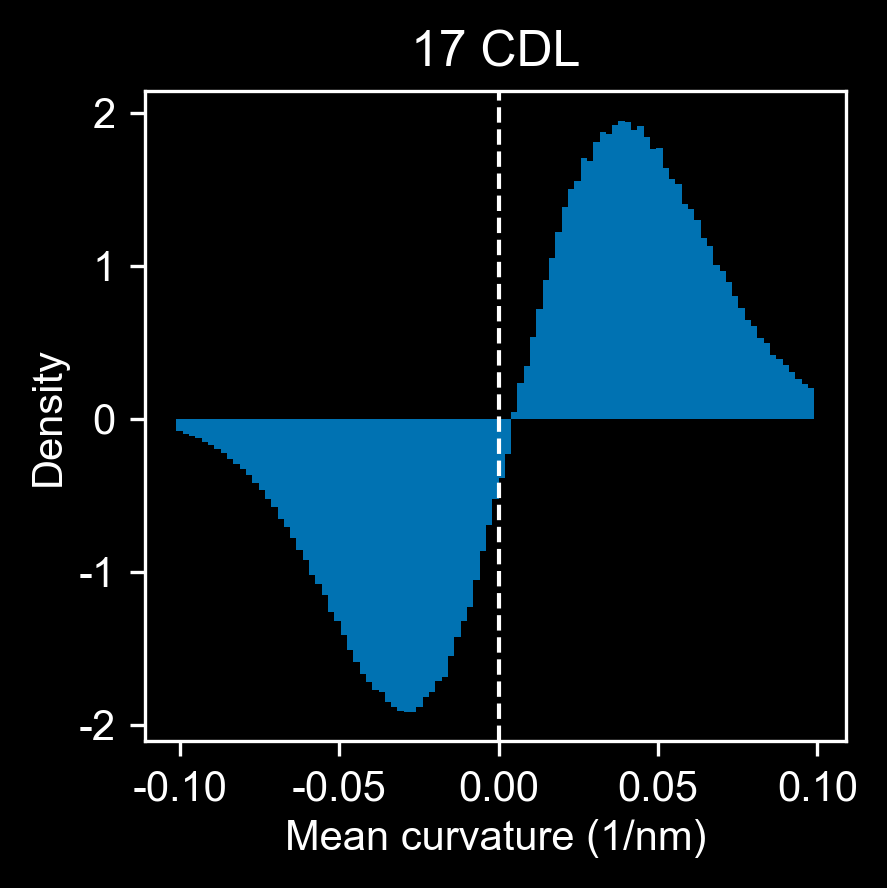

15 Overall mean: 0.002154436483998314; PC mean -0.0011073520199864511


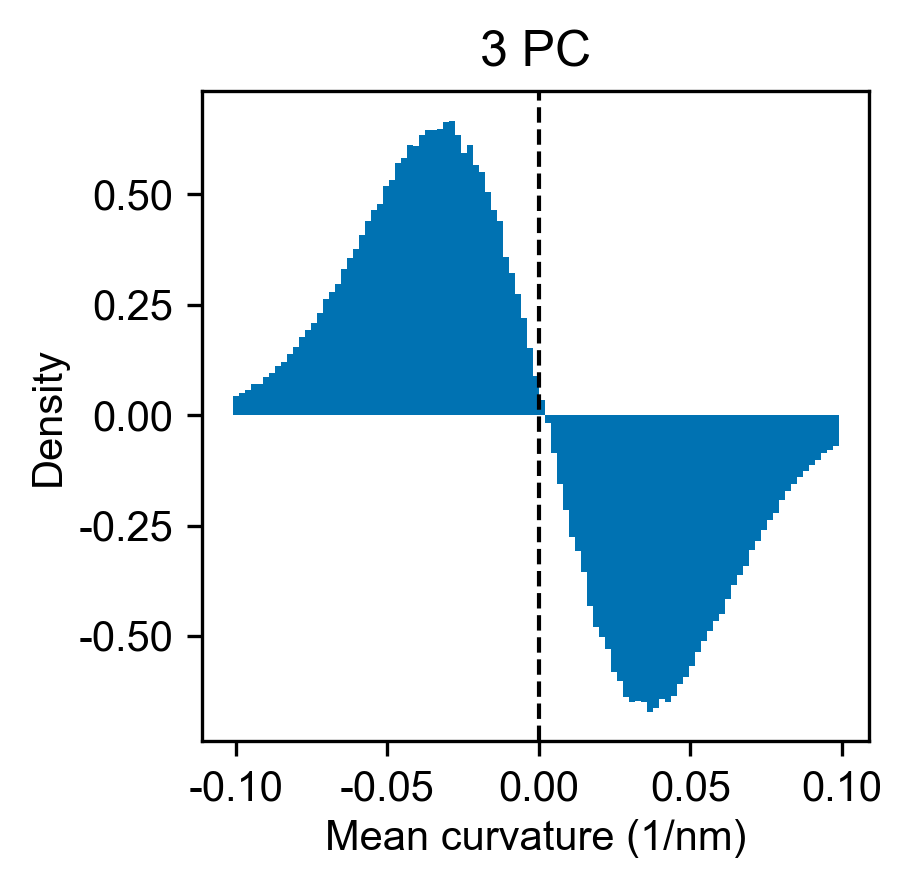

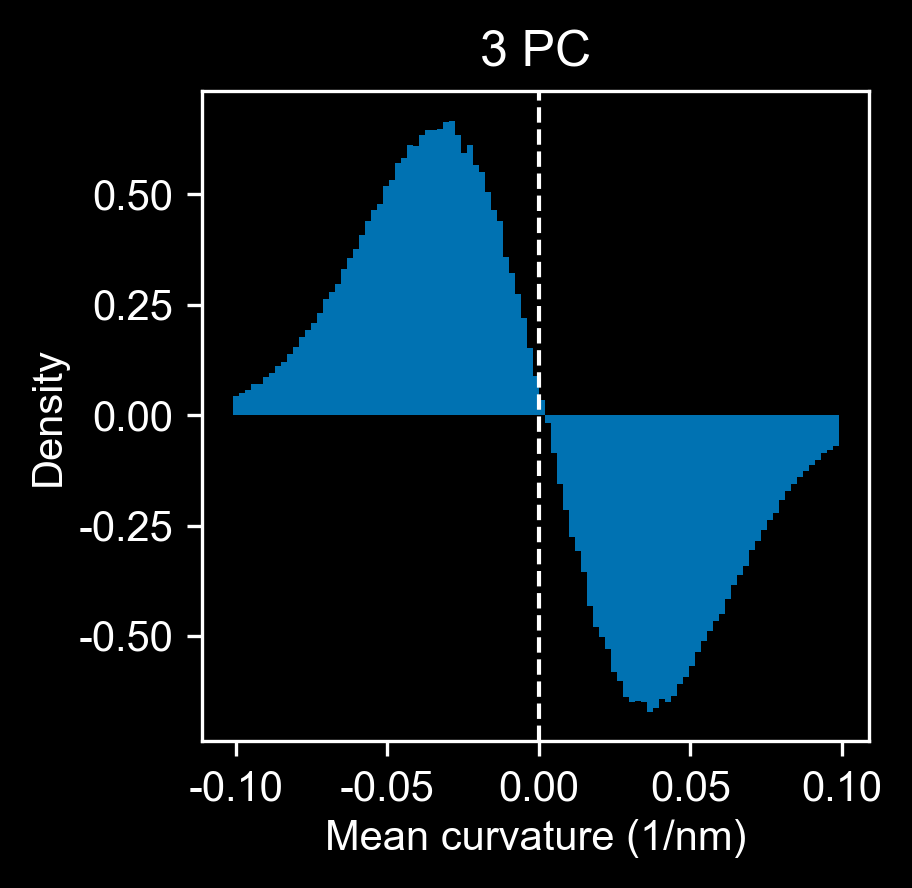

15 Overall mean: 0.002154436483998314; PE mean 0.003114822833300811


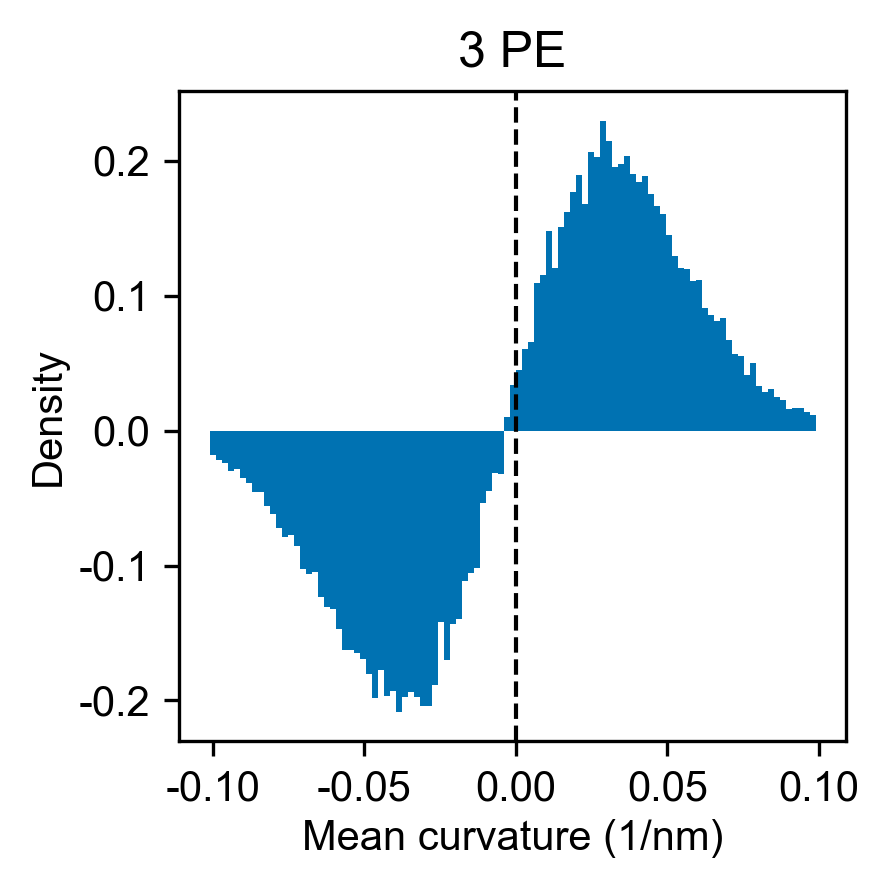

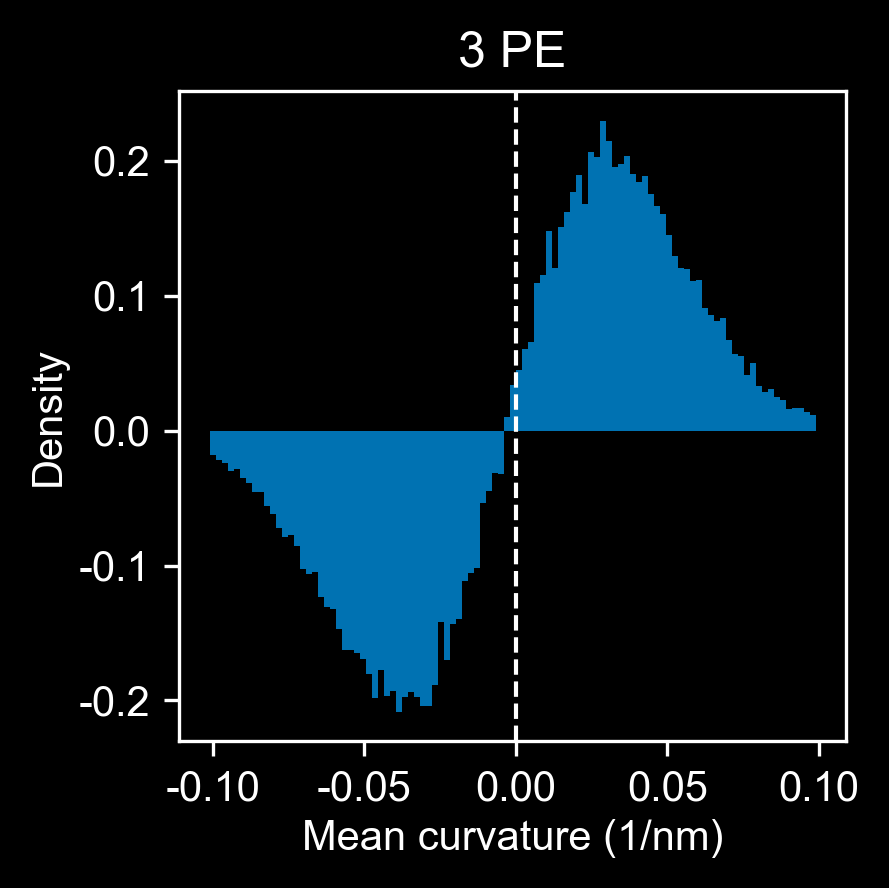

15 Overall mean: 0.002154436483998314; CDL mean 0.0106029782996357


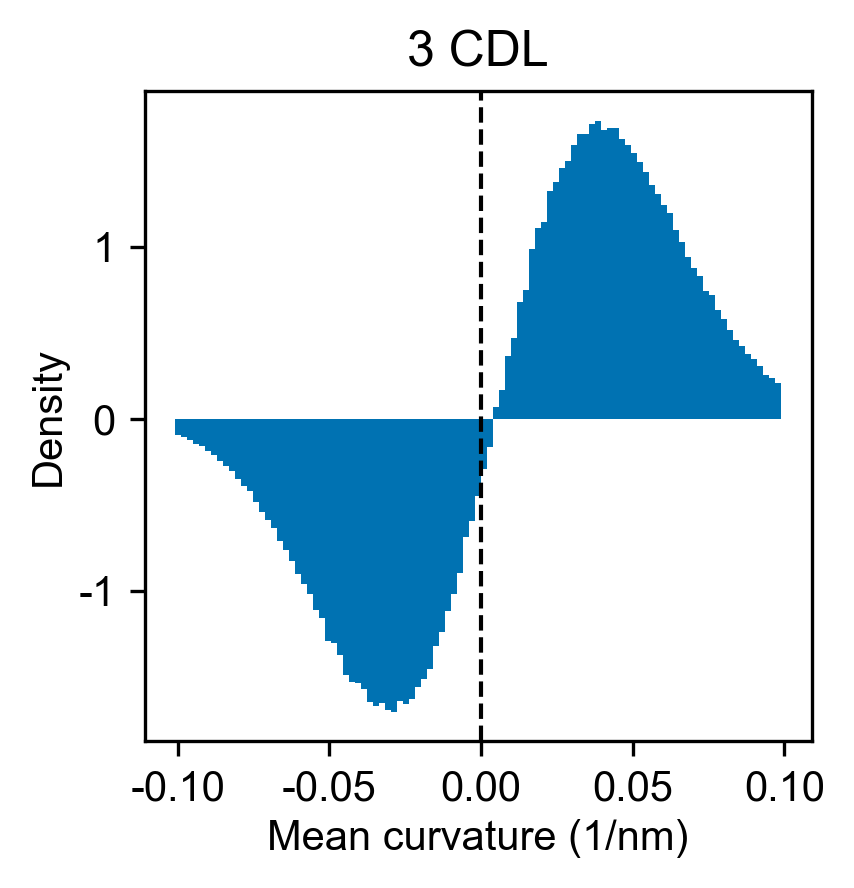

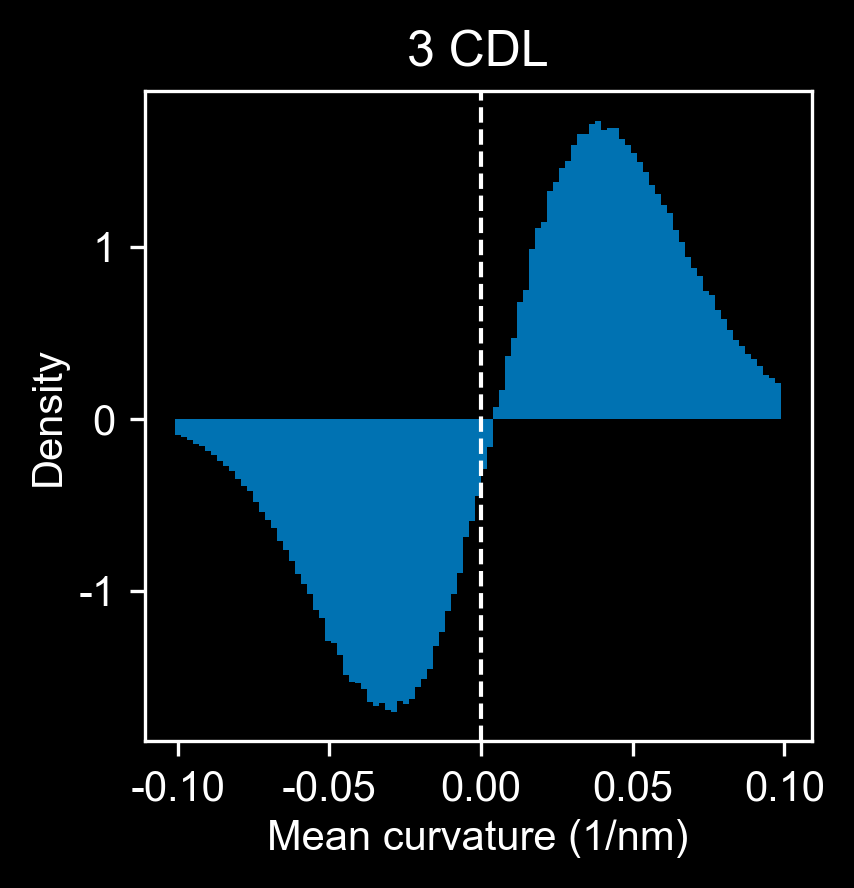

16 Overall mean: 0.0018212985663896995; PC mean -0.0002617854795954138


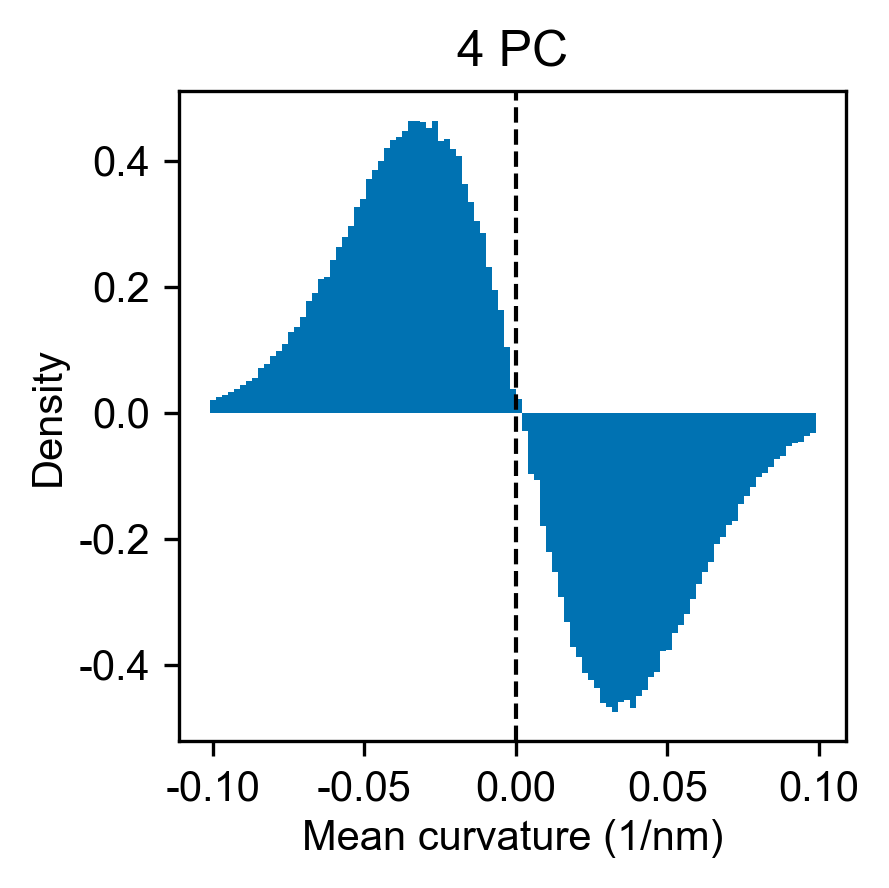

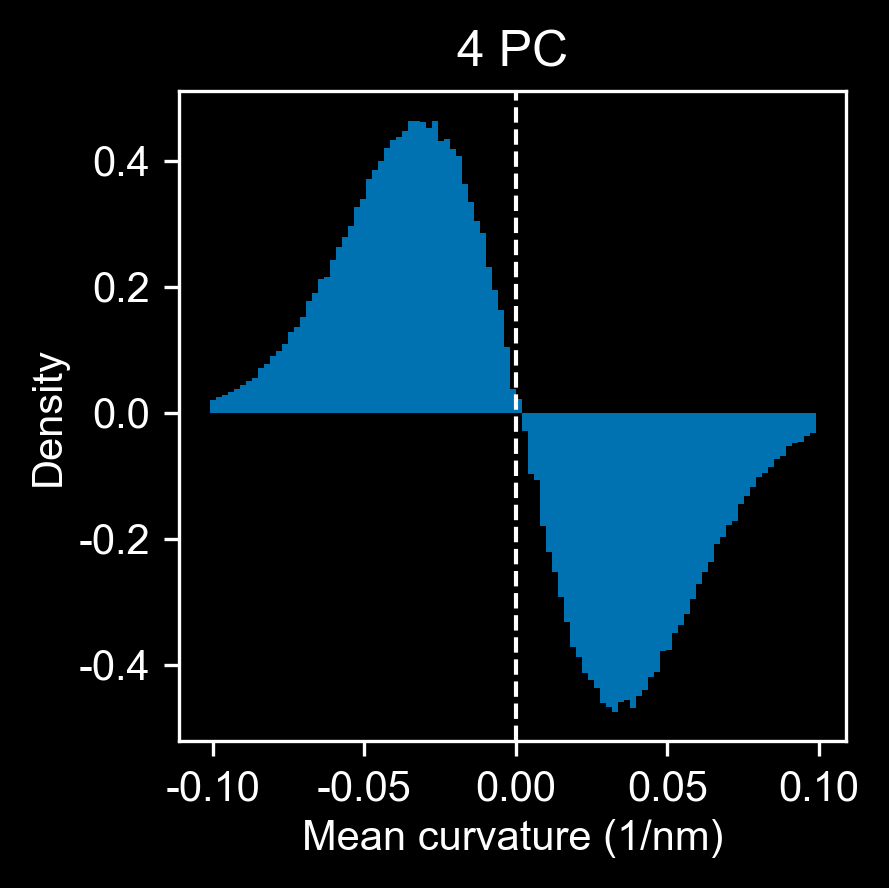

16 Overall mean: 0.0018212985663896995; PE mean 0.00348205836127961


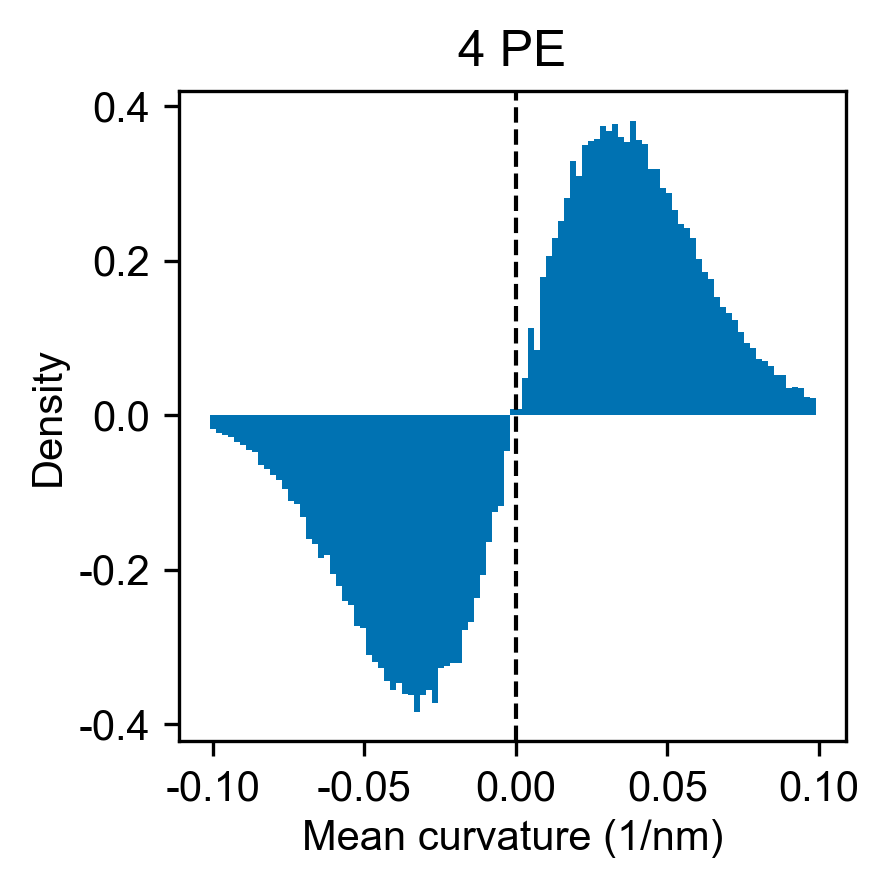

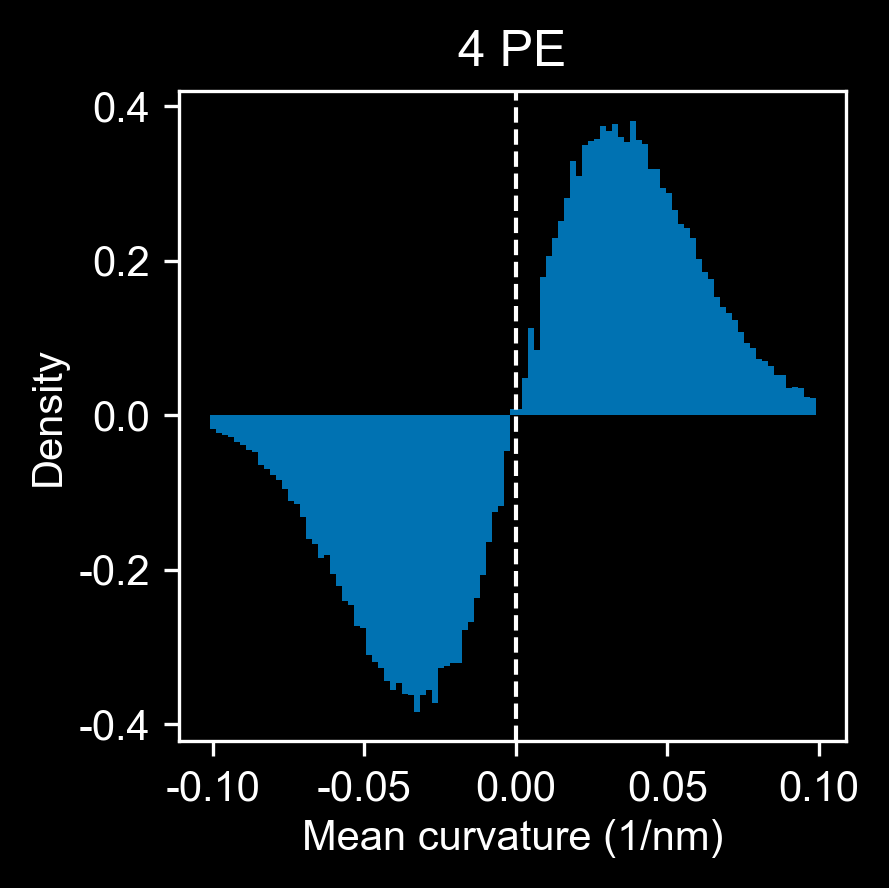

16 Overall mean: 0.0018212985663896995; CDL mean 0.007738942104670426


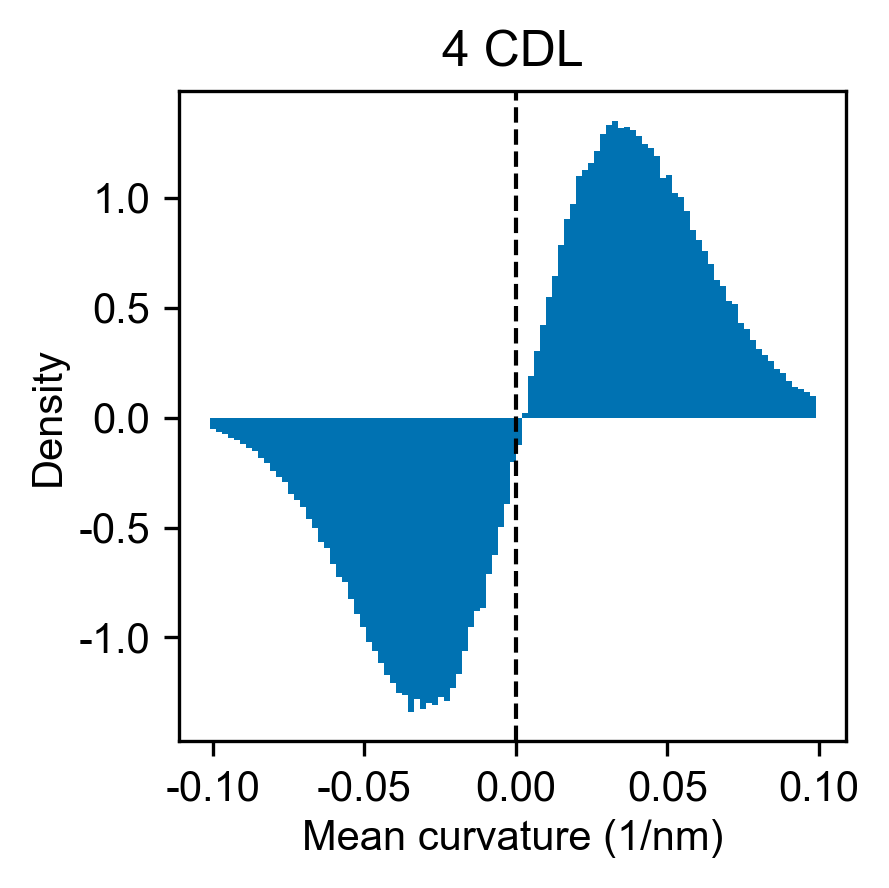

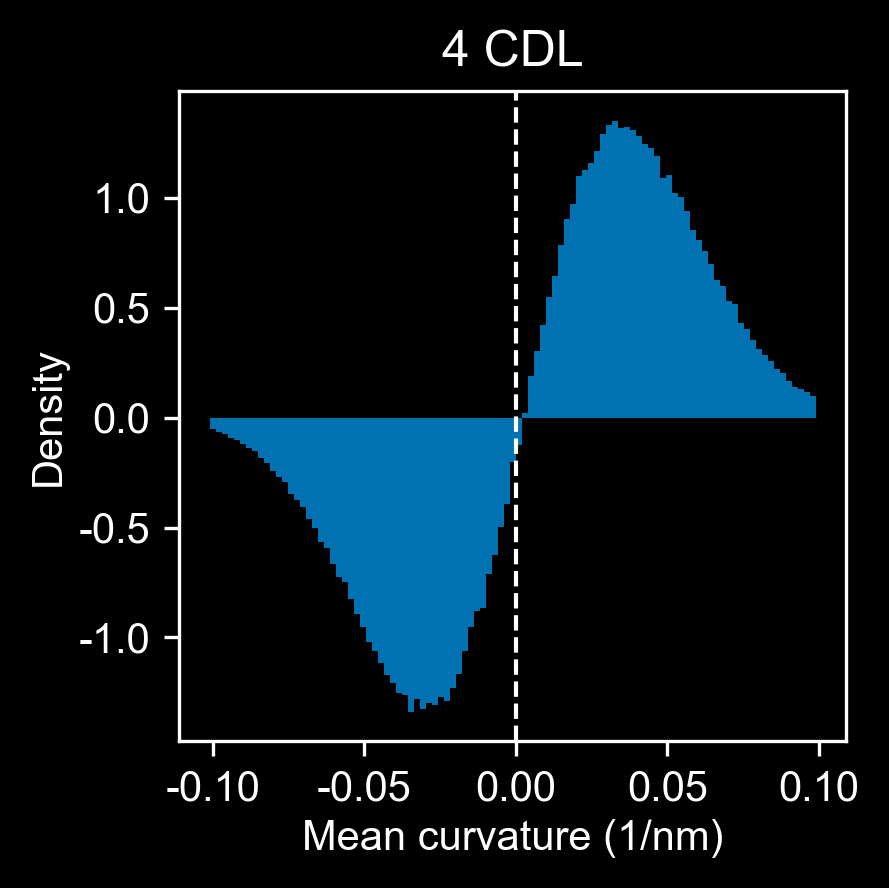

17 Overall mean: 0.0017988279741091885; PC mean -0.00041903455512568033


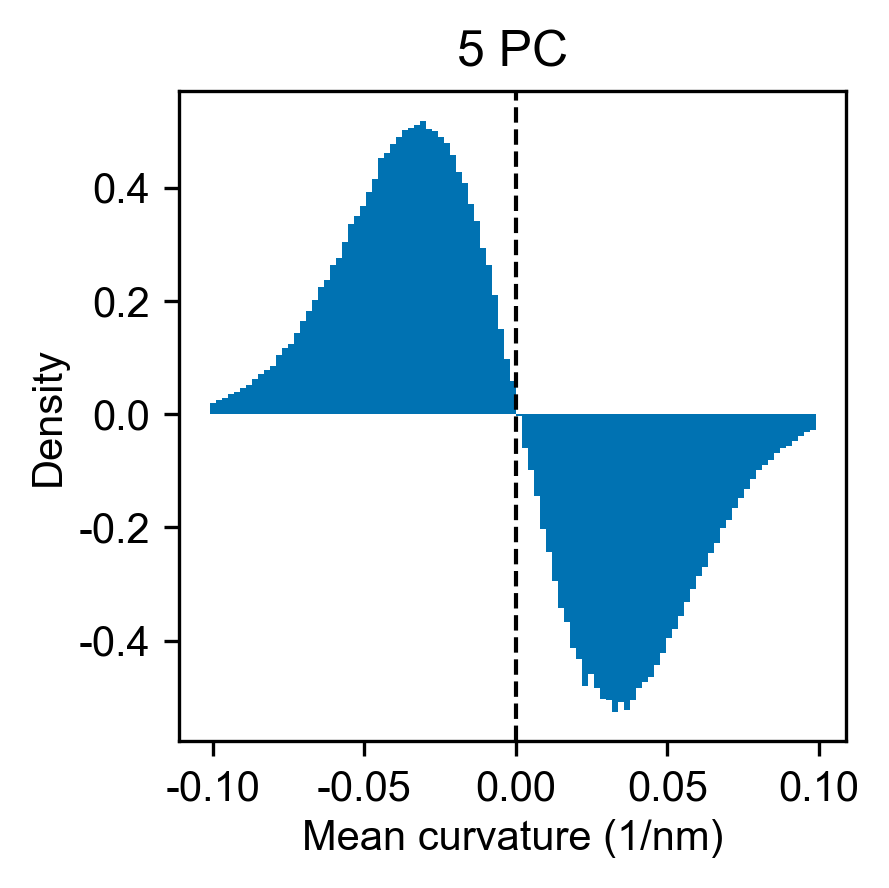

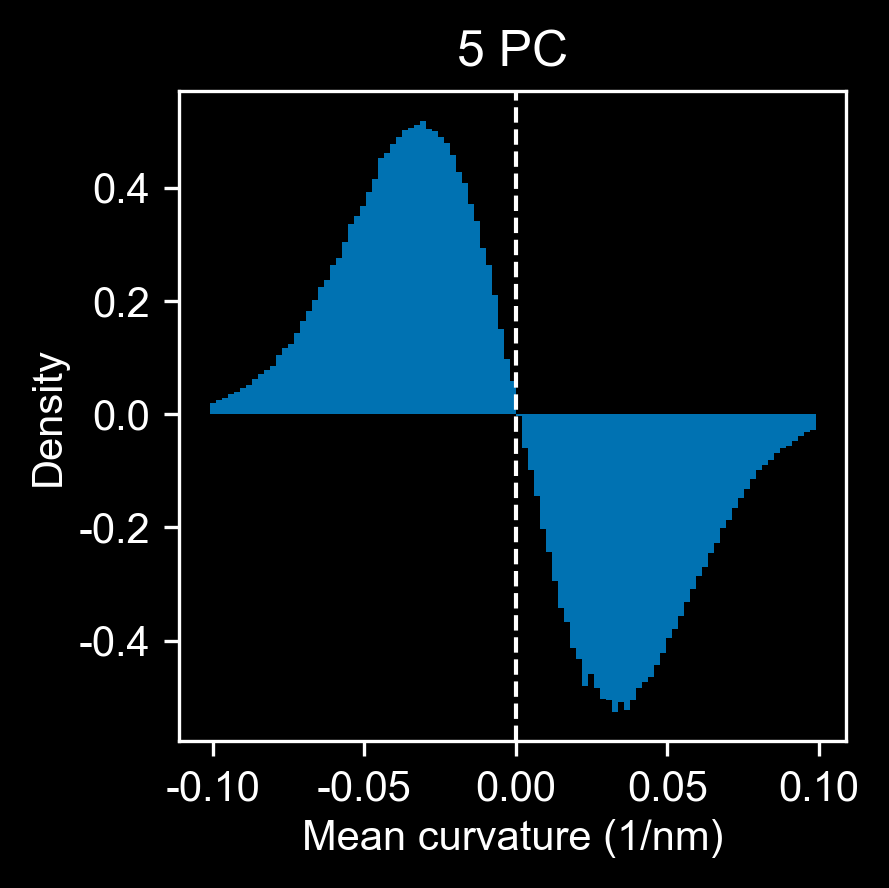

17 Overall mean: 0.0017988279741091885; PE mean 0.003133357201788108


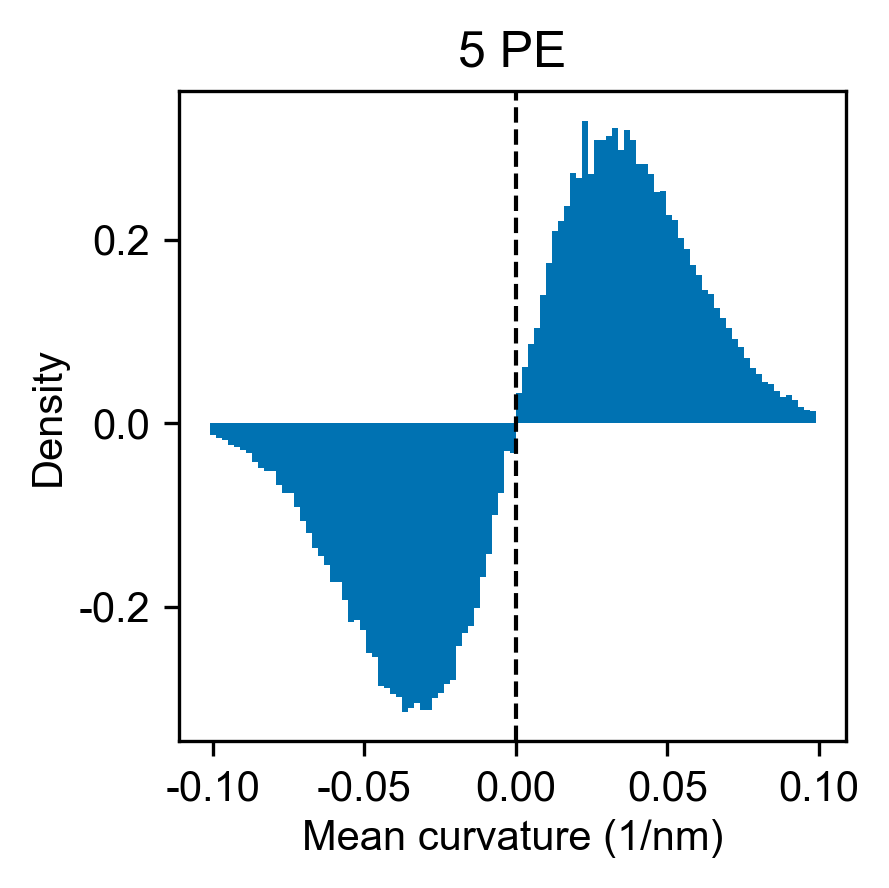

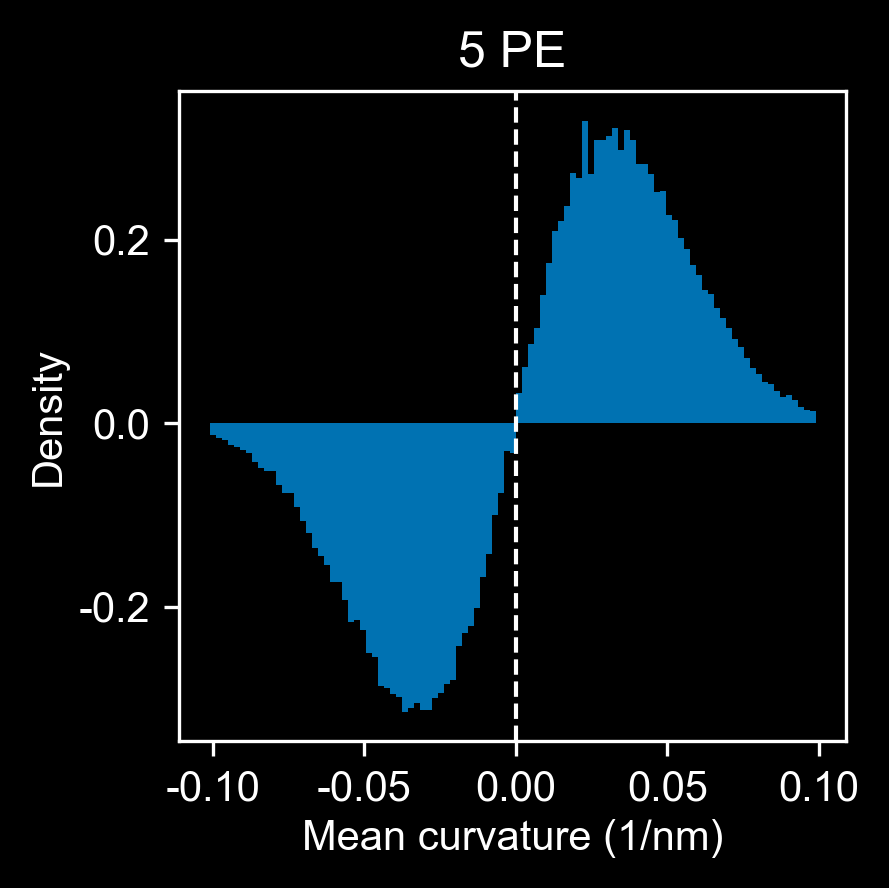

17 Overall mean: 0.0017988279741091885; CDL mean 0.007119516863417714


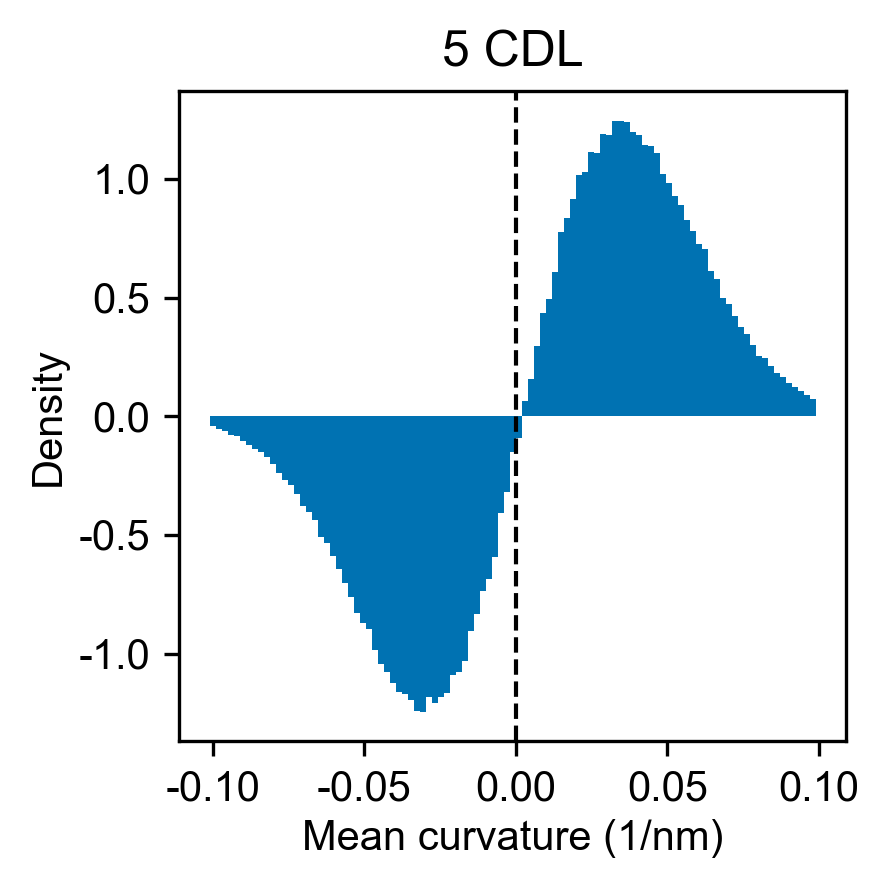

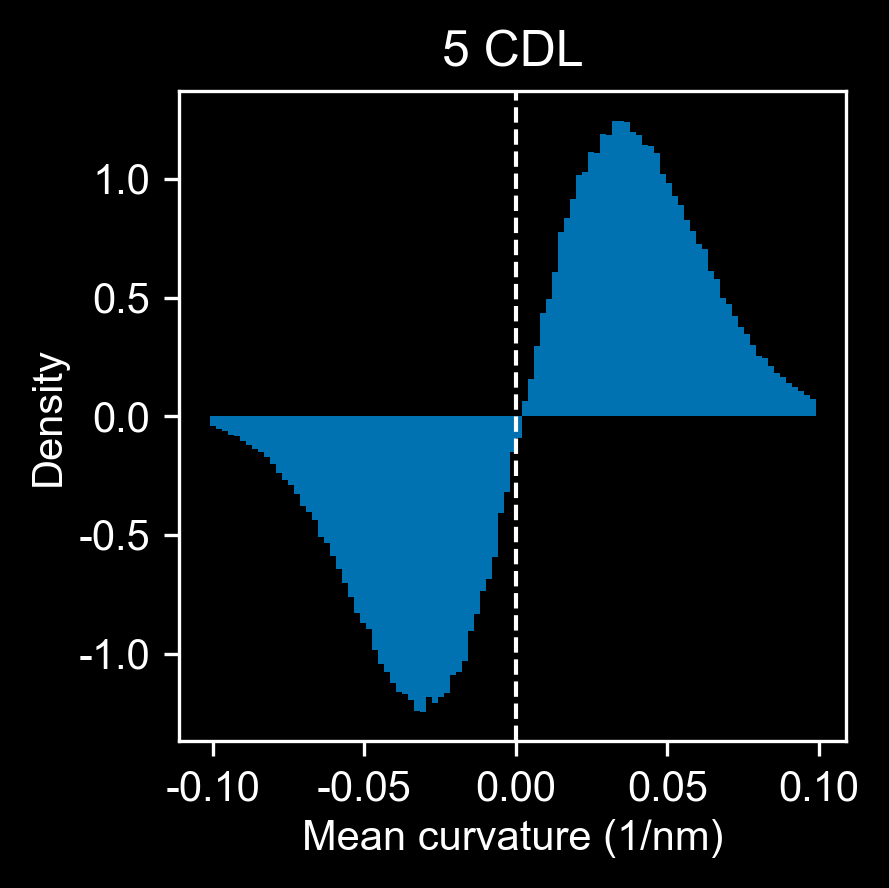

18 Overall mean: 0.0016978327907418945; PC mean -0.00031242894023441


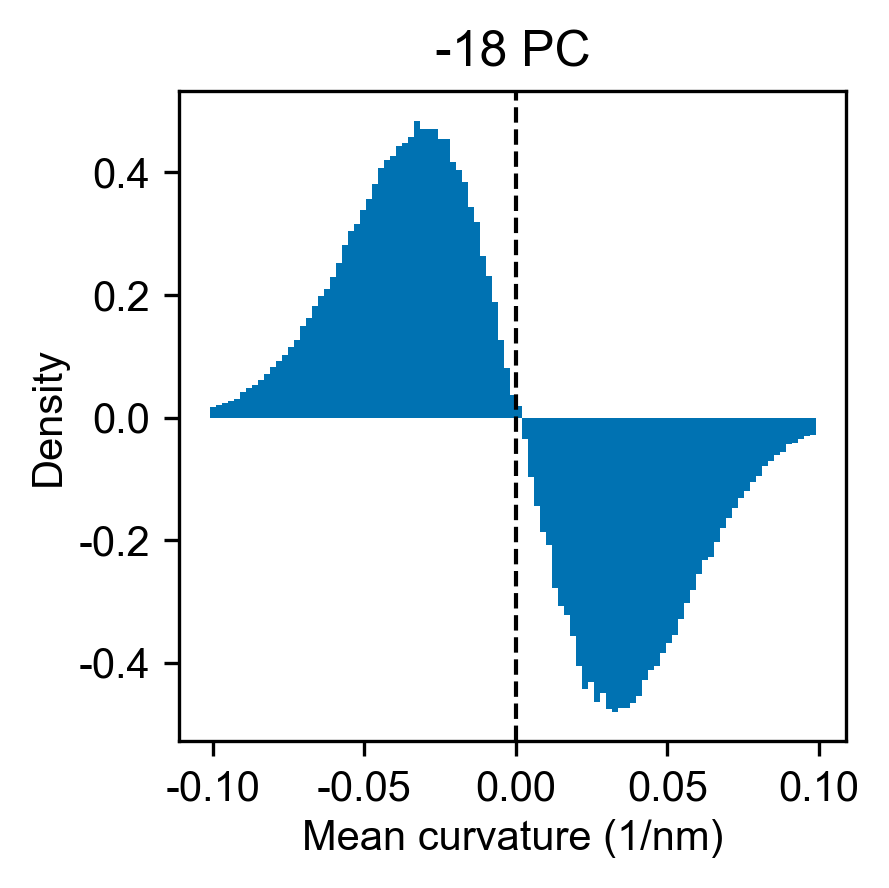

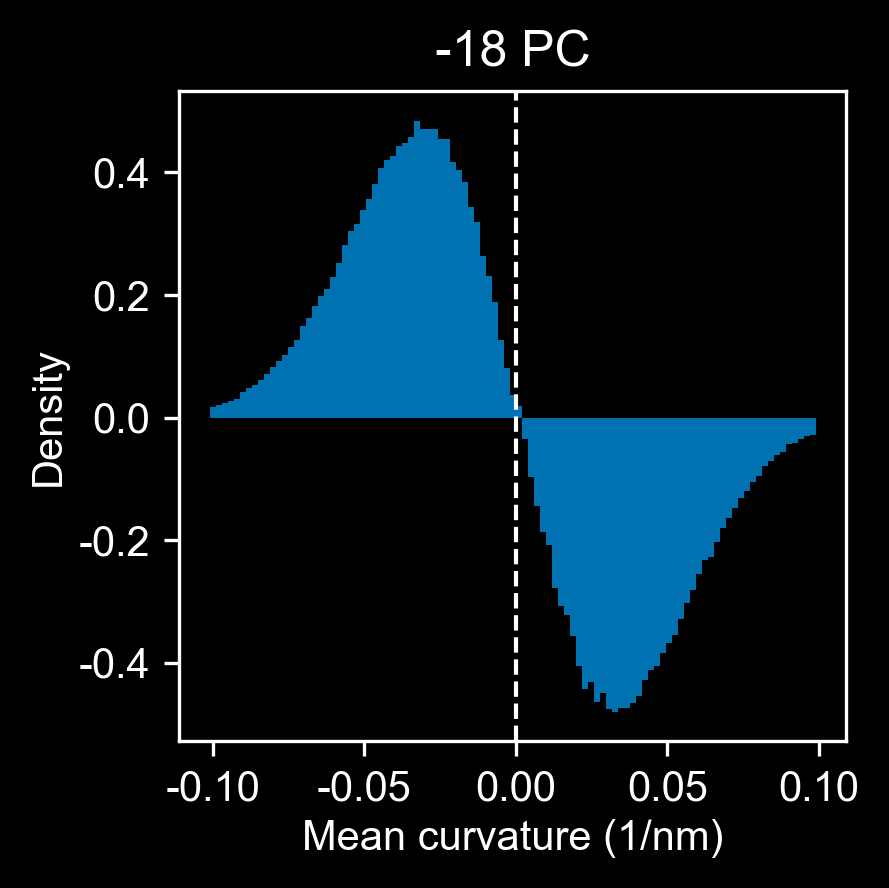

18 Overall mean: 0.0016978327907418945; PE mean 0.0031696432511891027


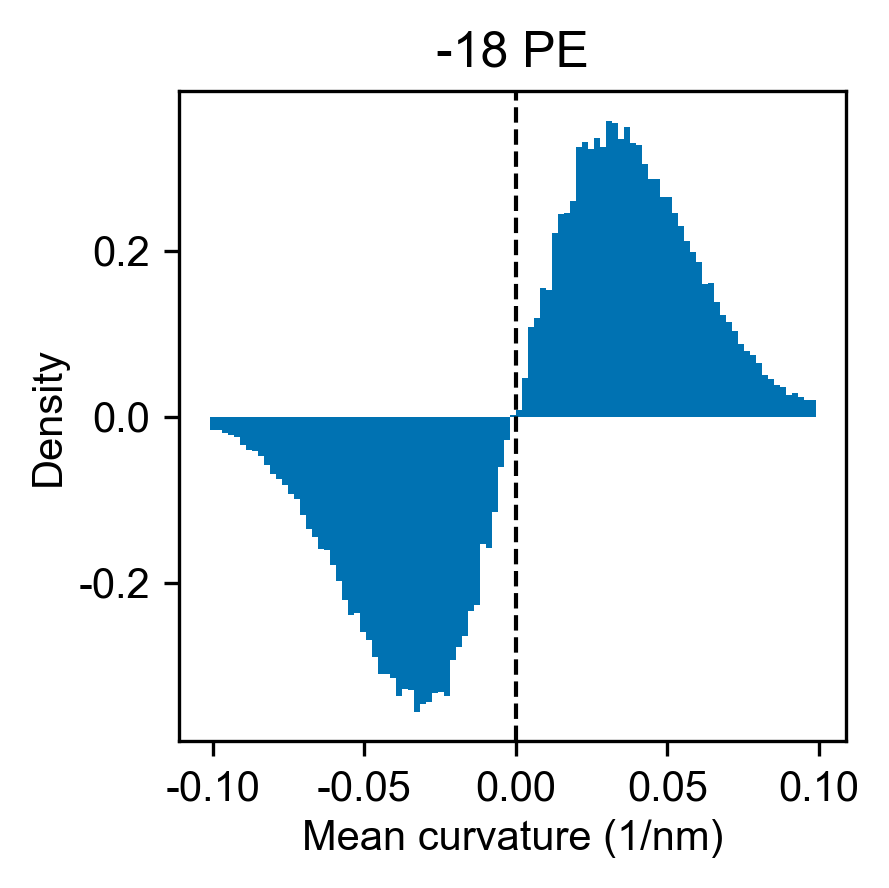

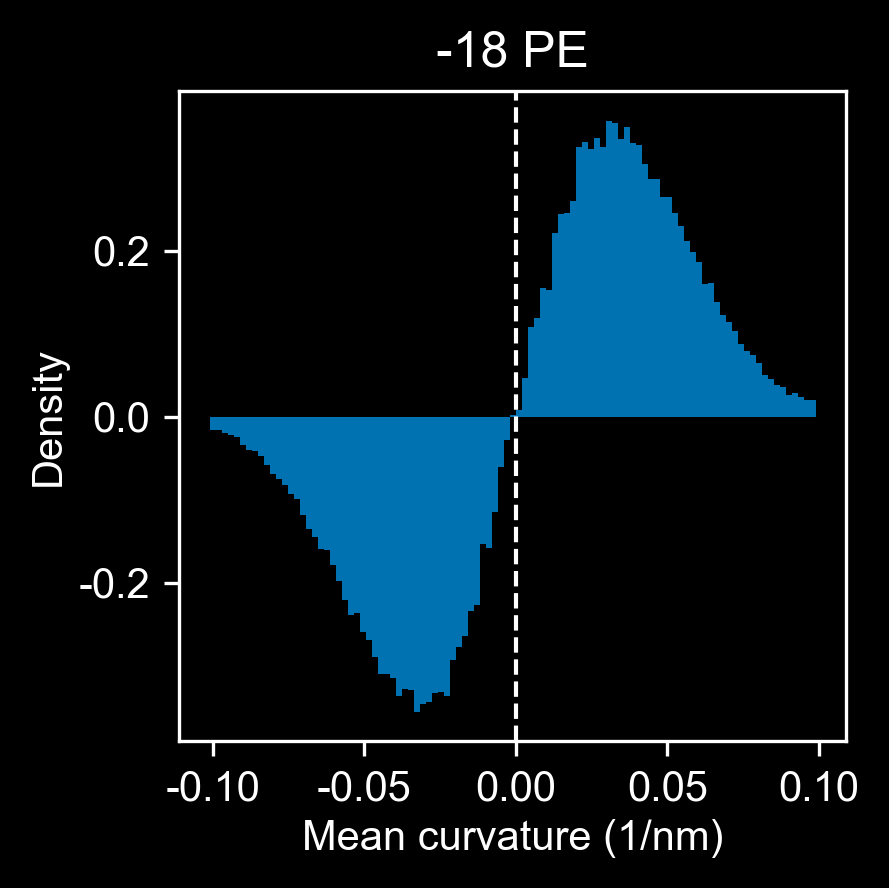

18 Overall mean: 0.0016978327907418945; CDL mean 0.007160430818954101


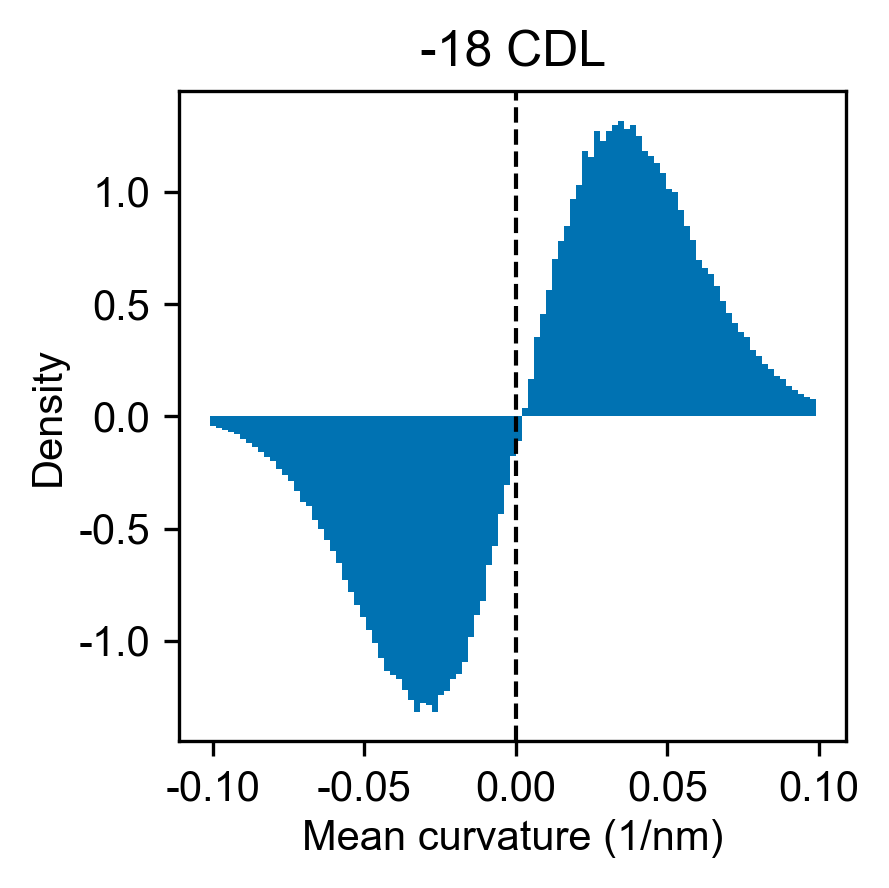

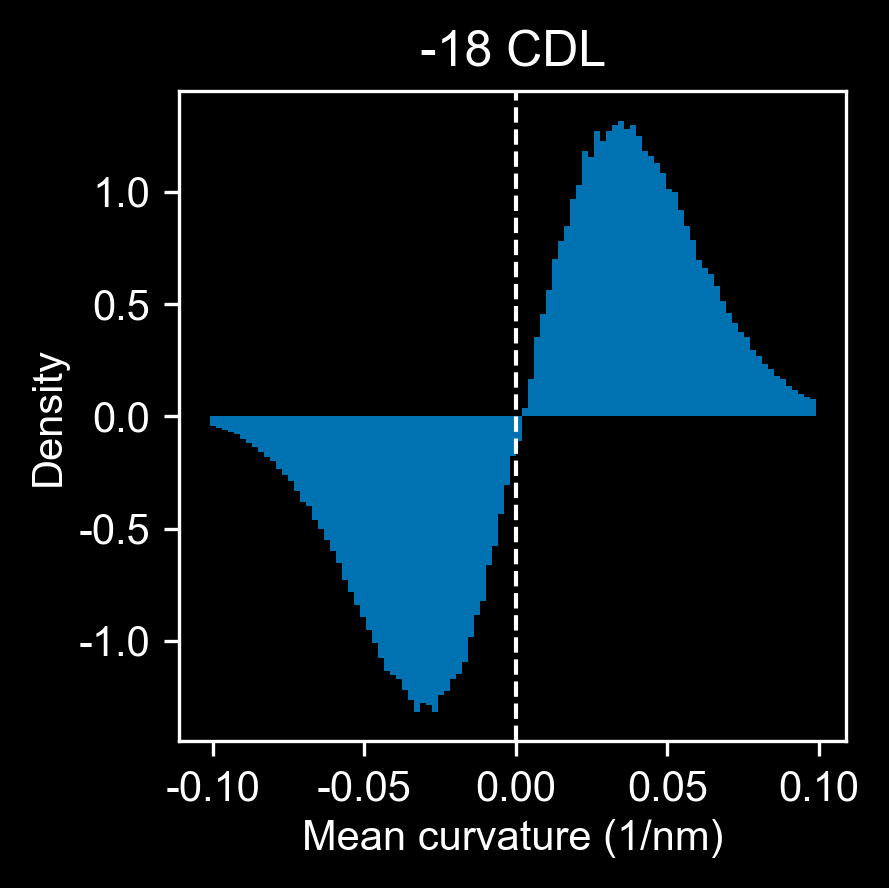

19 Overall mean: 0.002514188845014329; CDL mean 0.002514188845014329


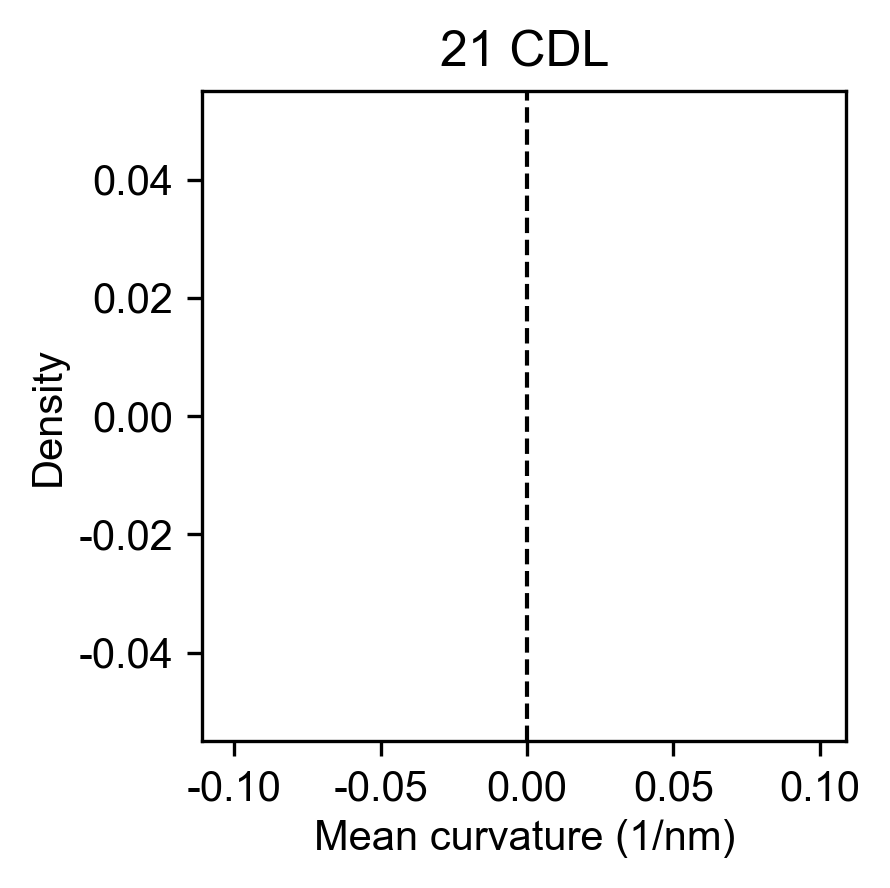

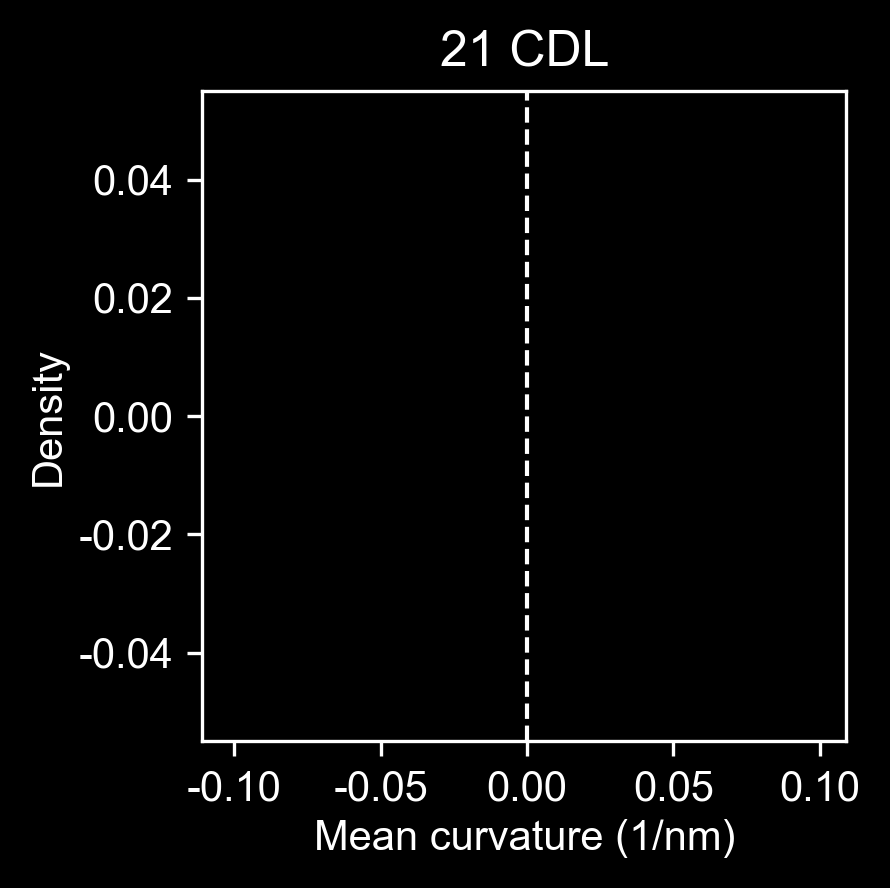

20 Overall mean: 0.00169294884063513; PC mean -0.0008475030966175958


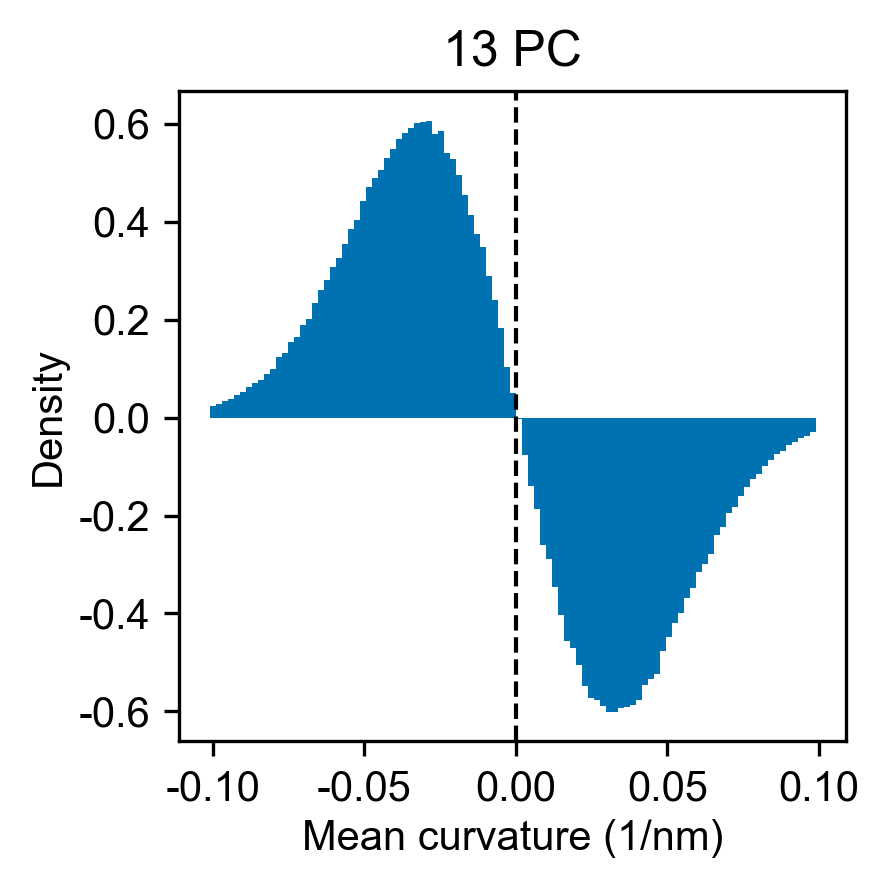

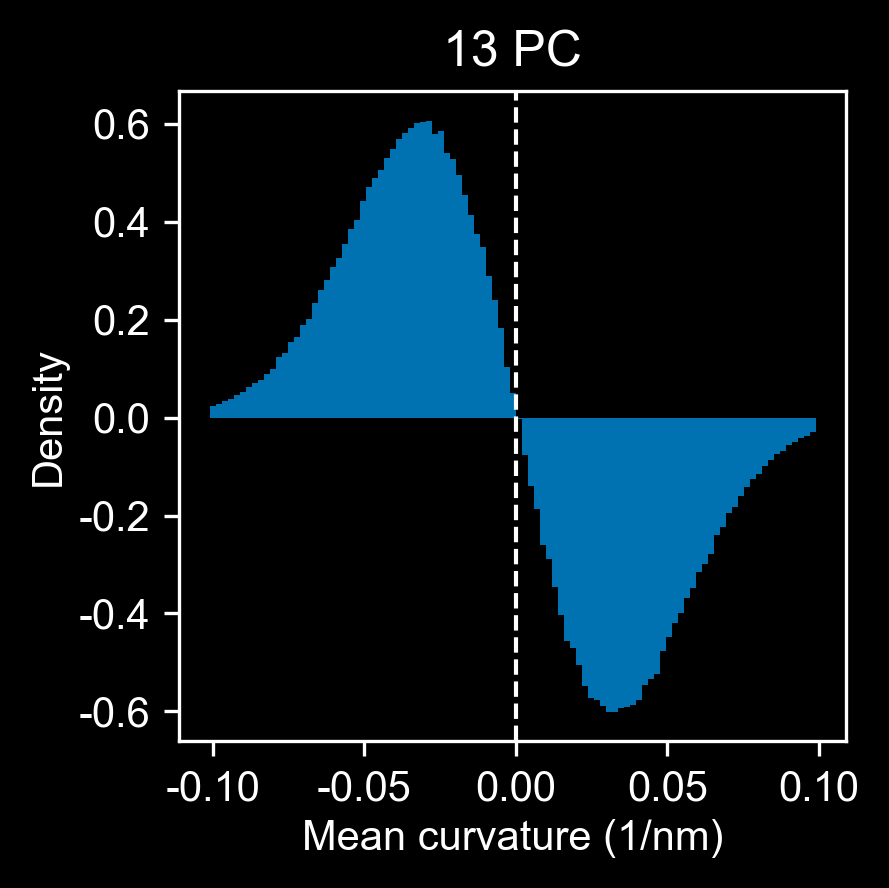

20 Overall mean: 0.00169294884063513; PE mean 0.0030247667872627753


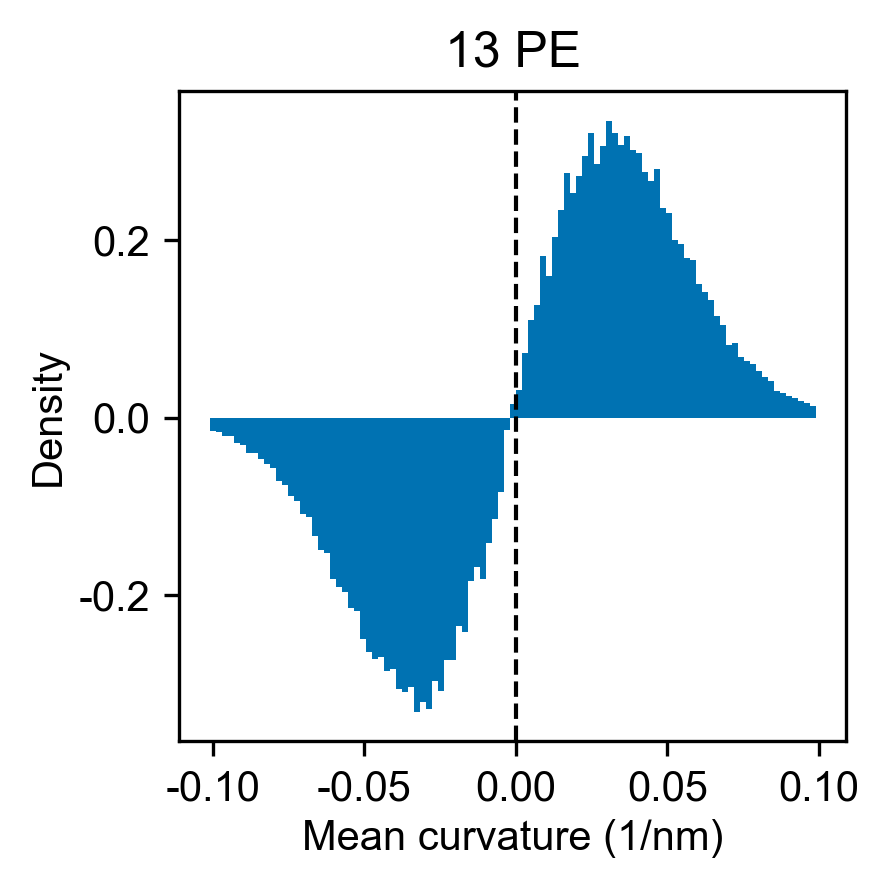

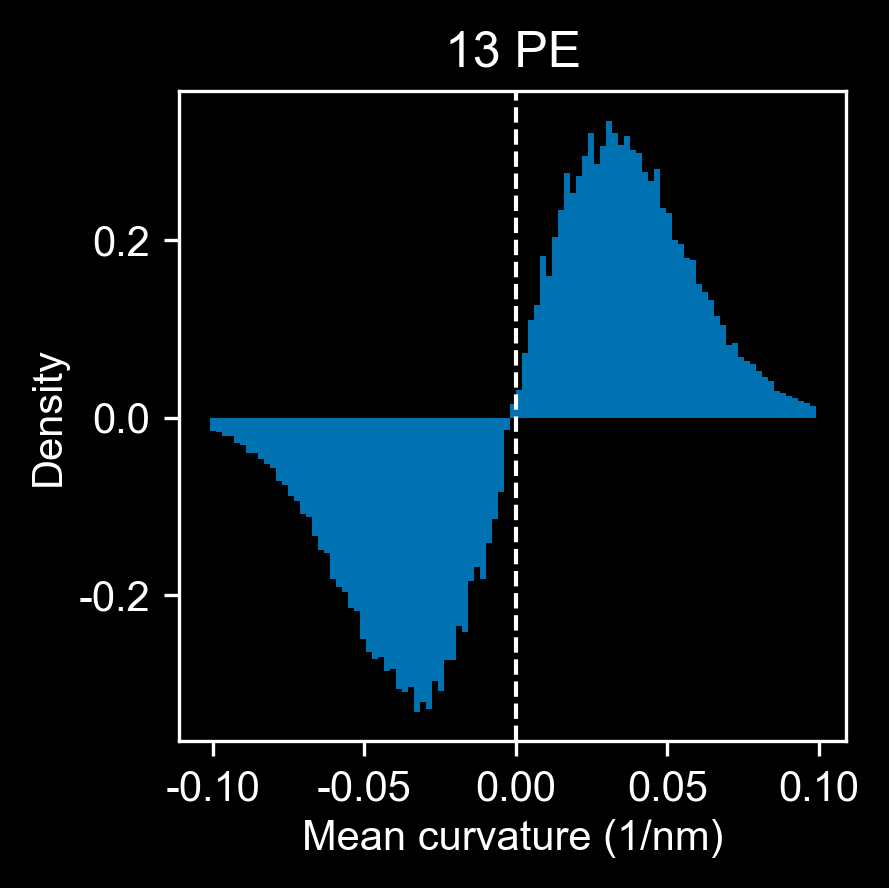

20 Overall mean: 0.00169294884063513; CDL mean 0.006053294515543753


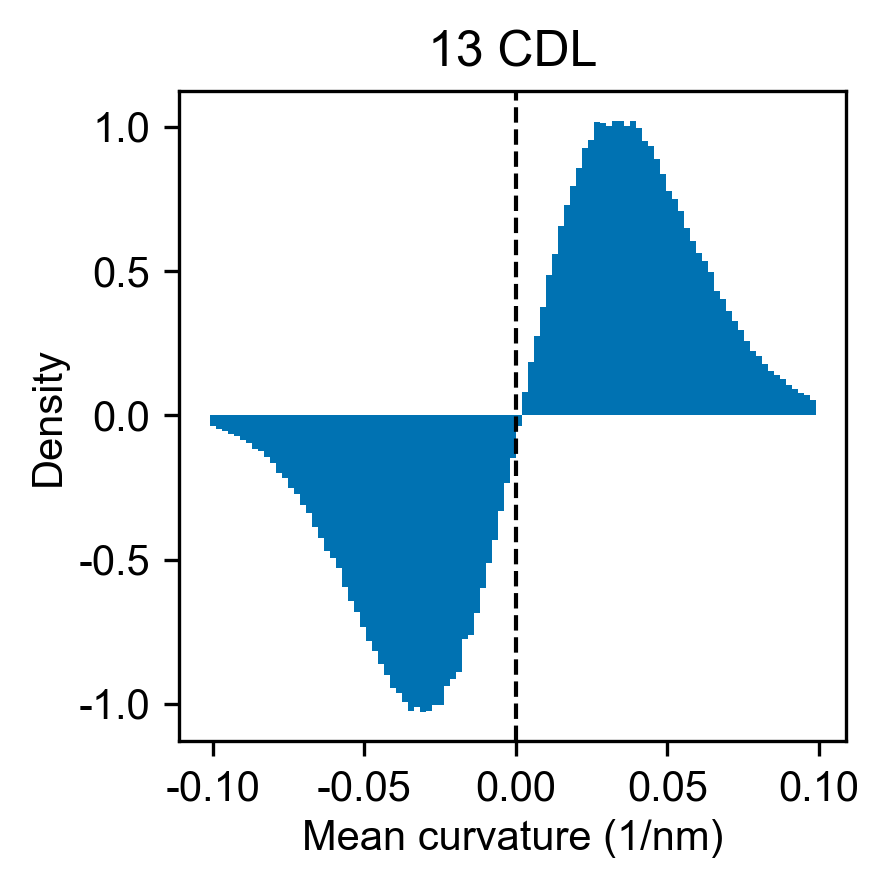

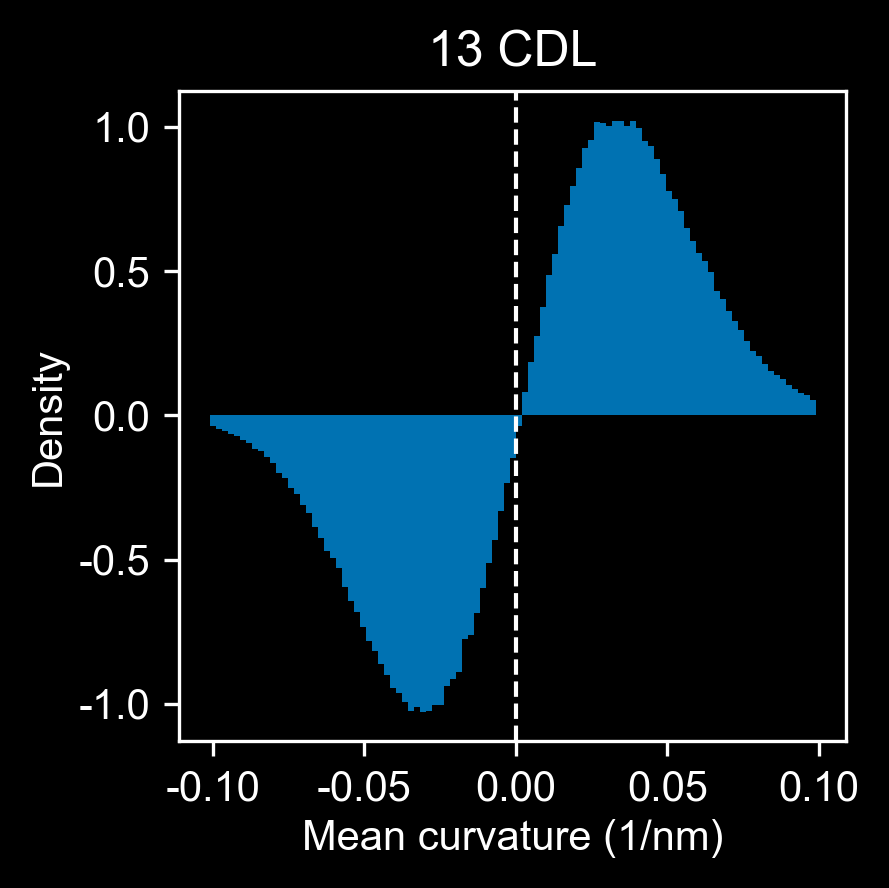

21 Overall mean: 0.002025007189050853; PC mean -0.0008162983241769188


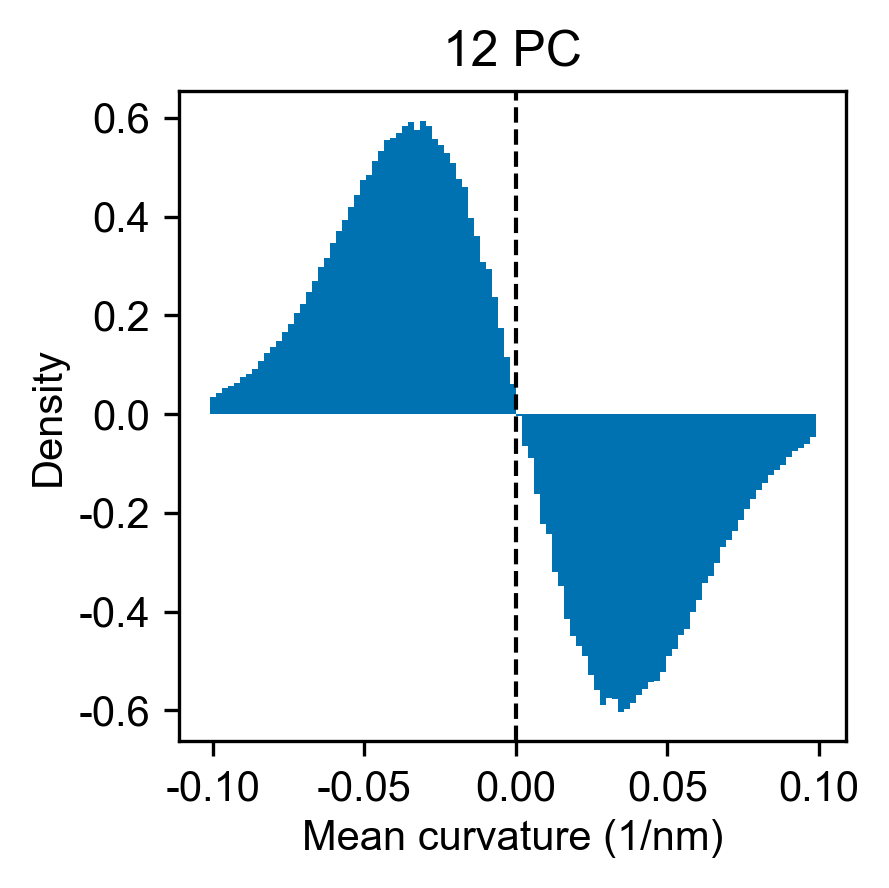

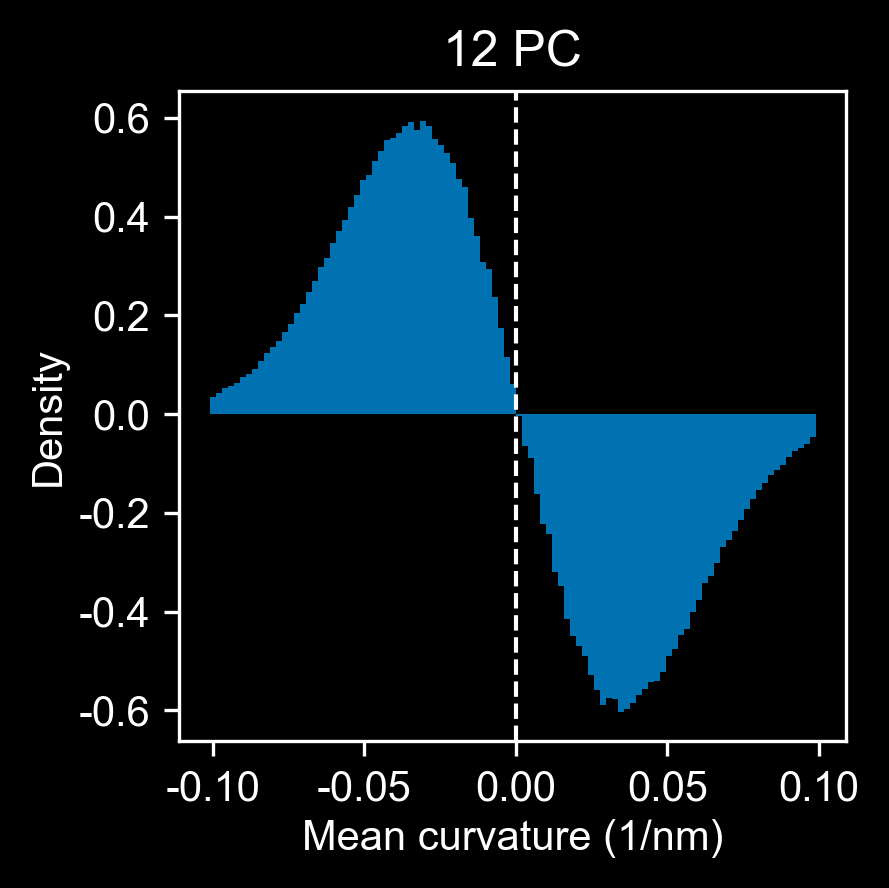

21 Overall mean: 0.002025007189050853; PE mean 0.0033463065831613966


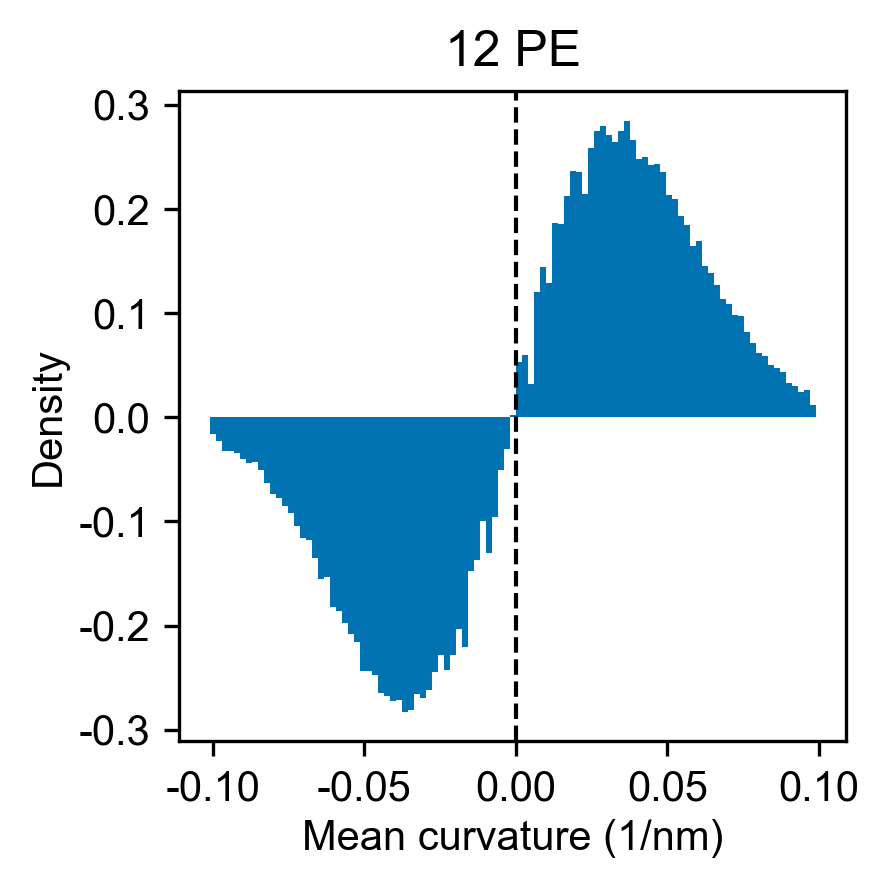

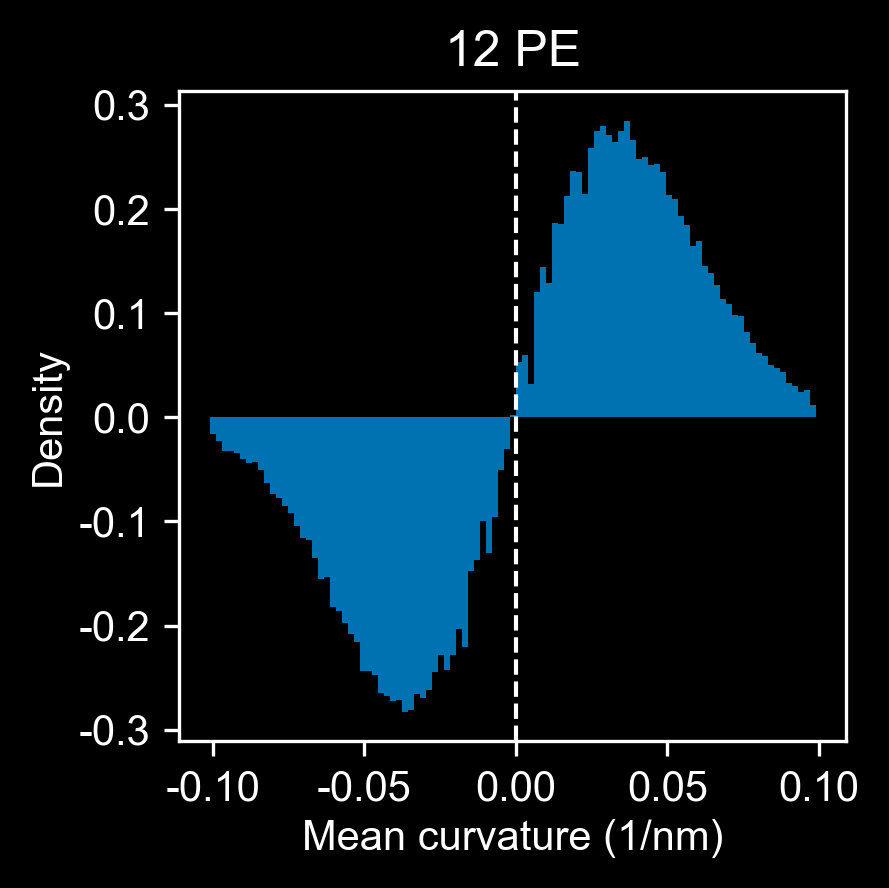

21 Overall mean: 0.002025007189050853; CDL mean 0.007154398383977285


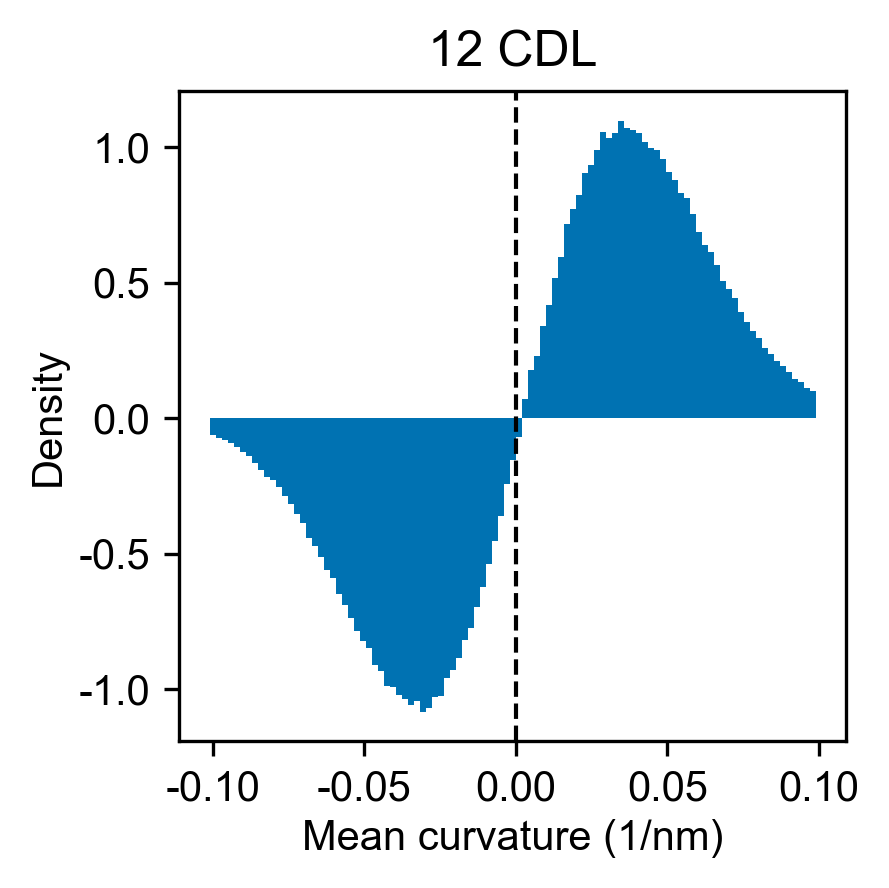

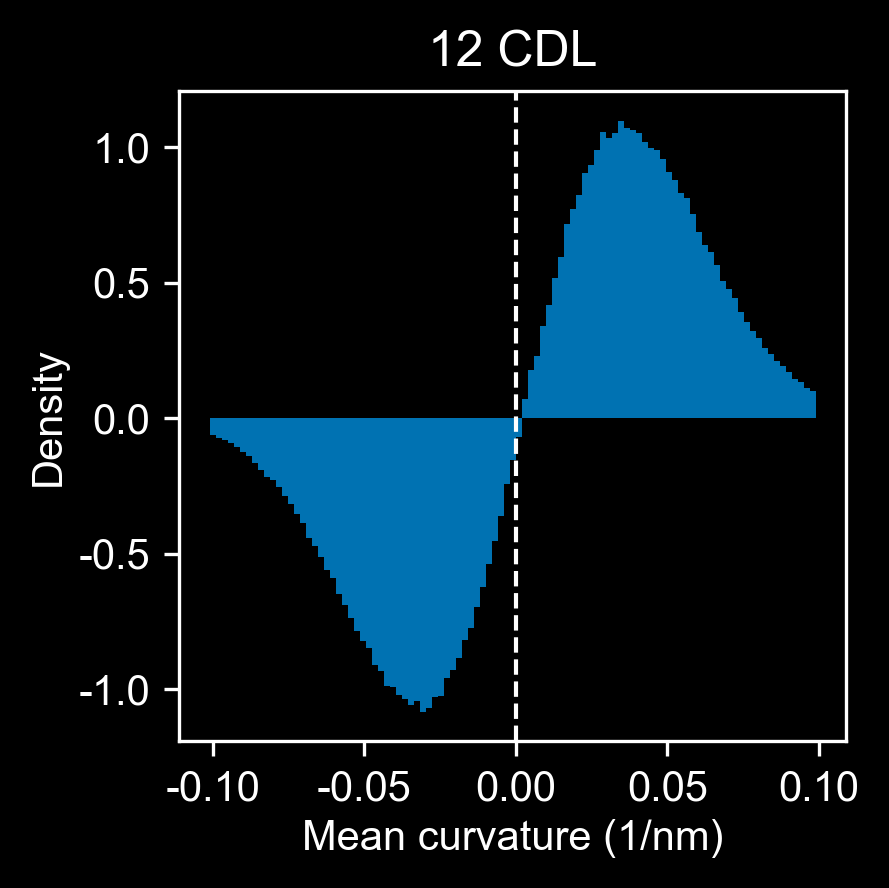

22 Overall mean: 0.0018091515261673278; PC mean -0.000515160176098631


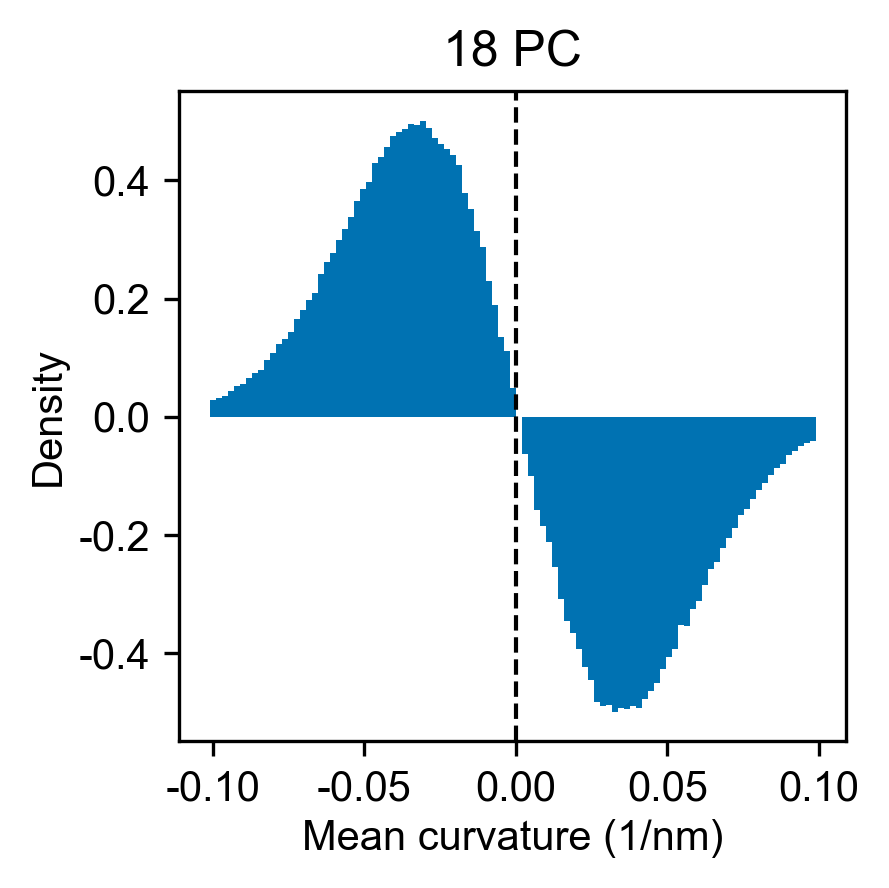

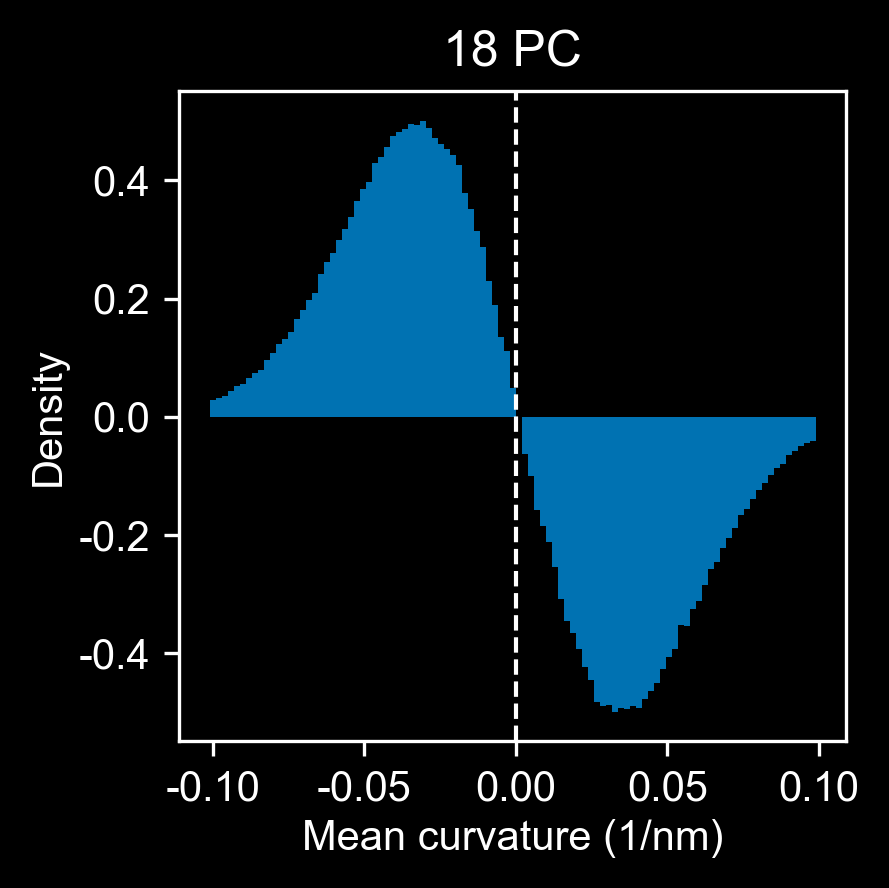

22 Overall mean: 0.0018091515261673278; PE mean 0.003185480439689918


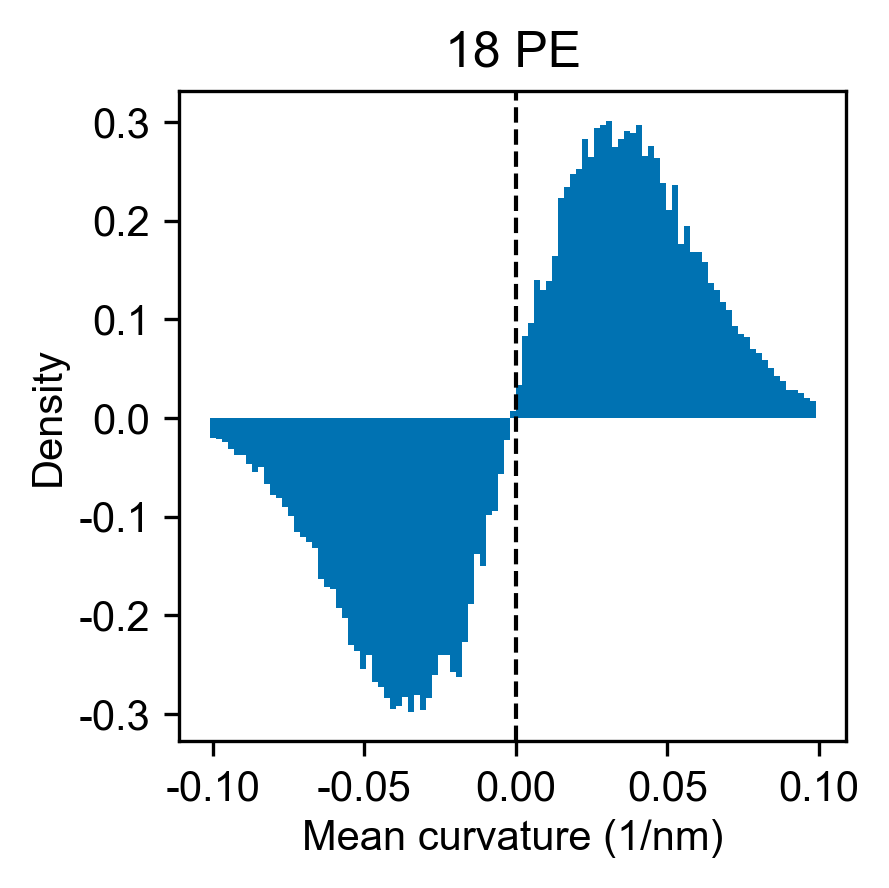

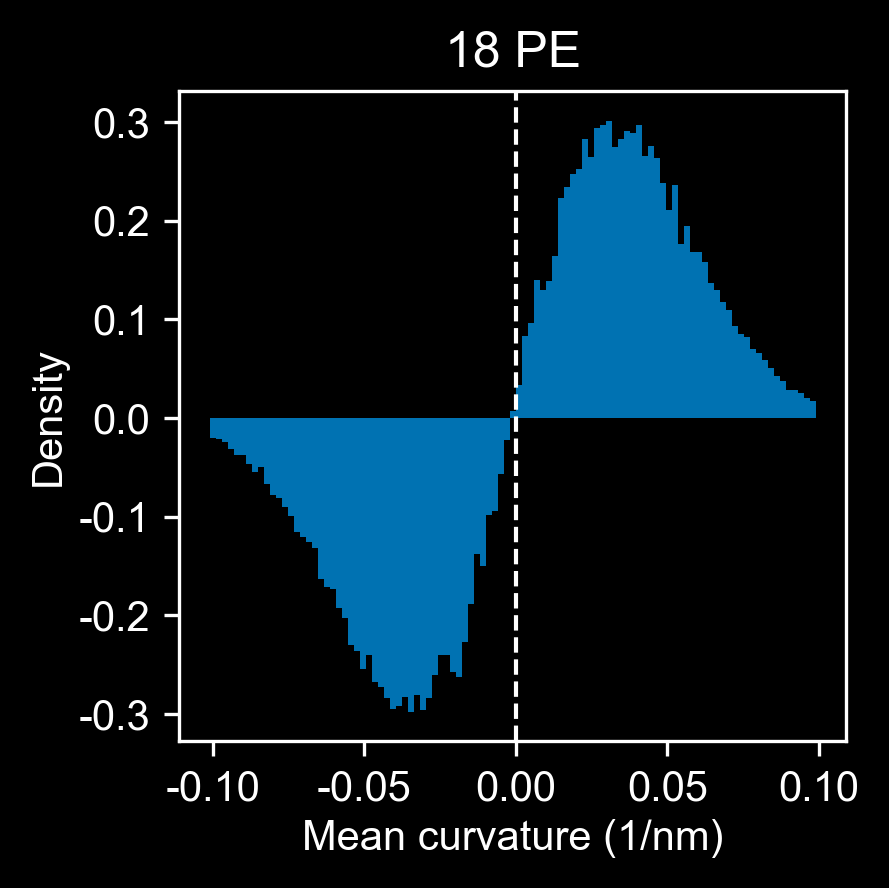

22 Overall mean: 0.0018091515261673278; CDL mean 0.007306571251550441


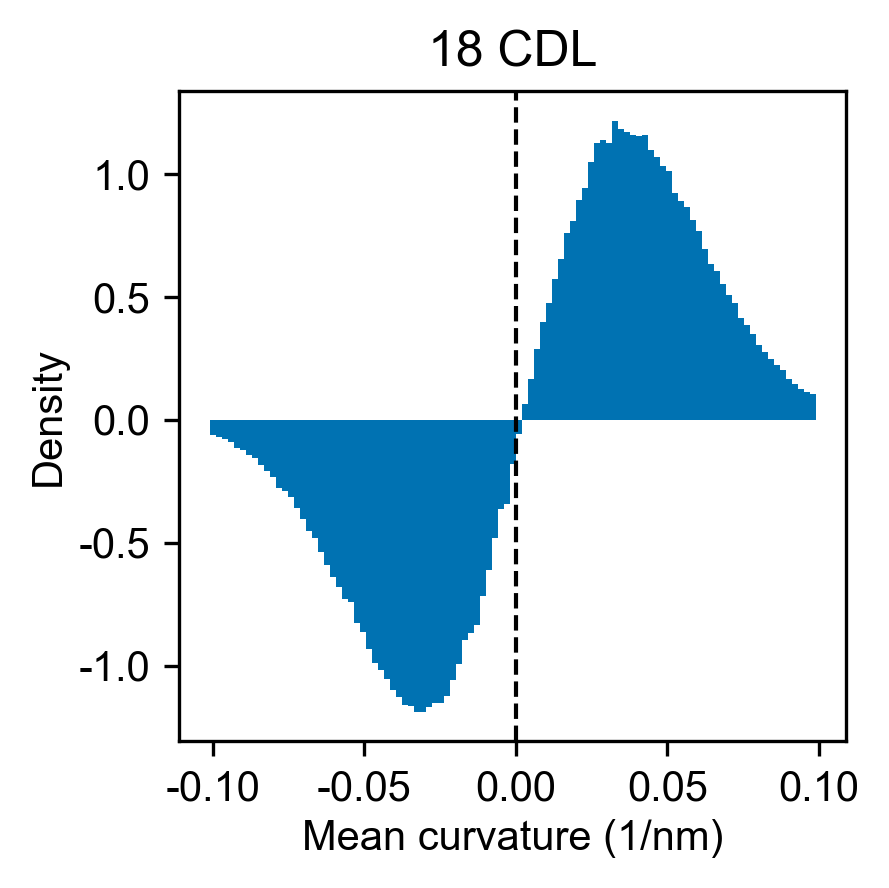

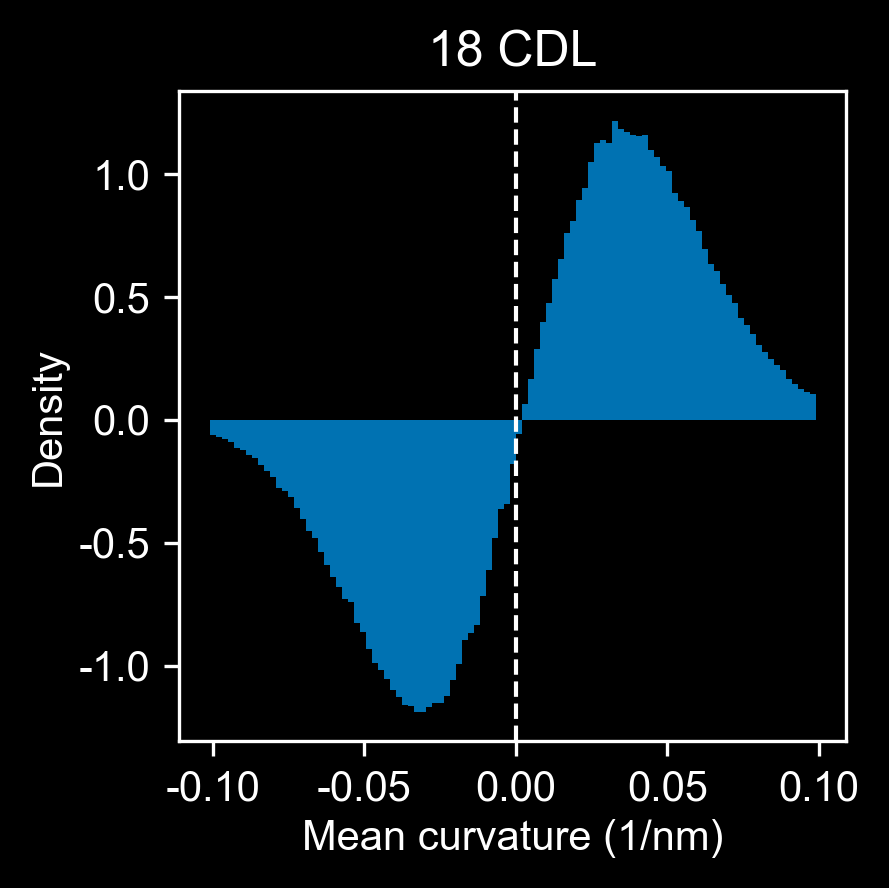

23 Overall mean: 0.0018018627675570106; PC mean -2.408081077582872e-05


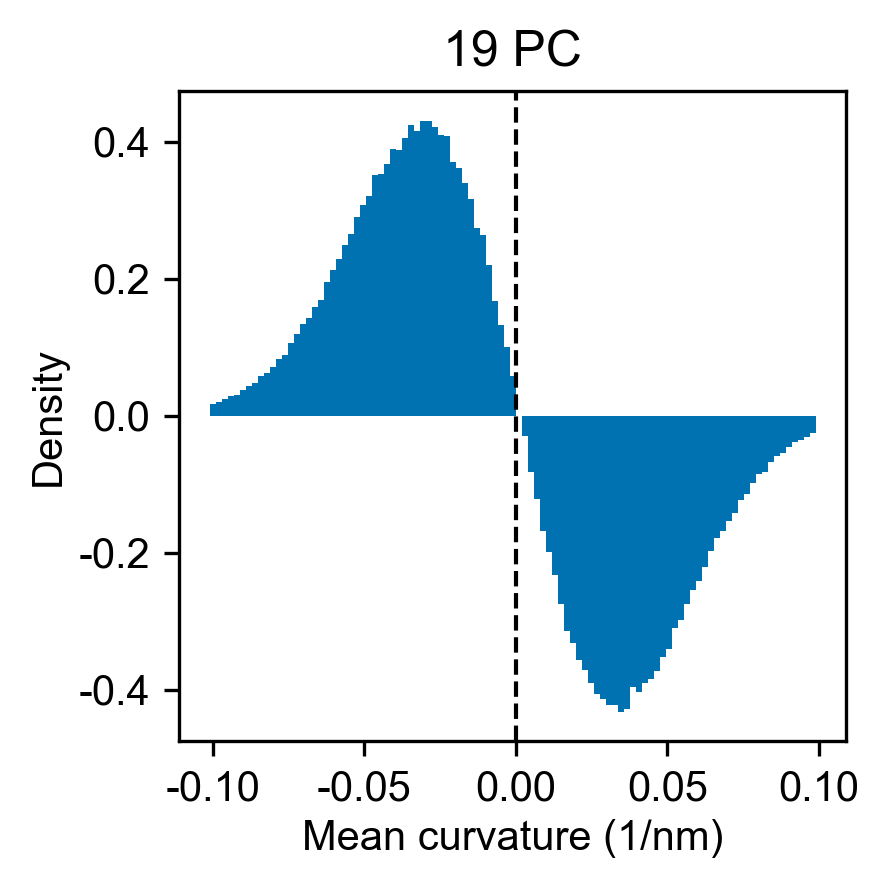

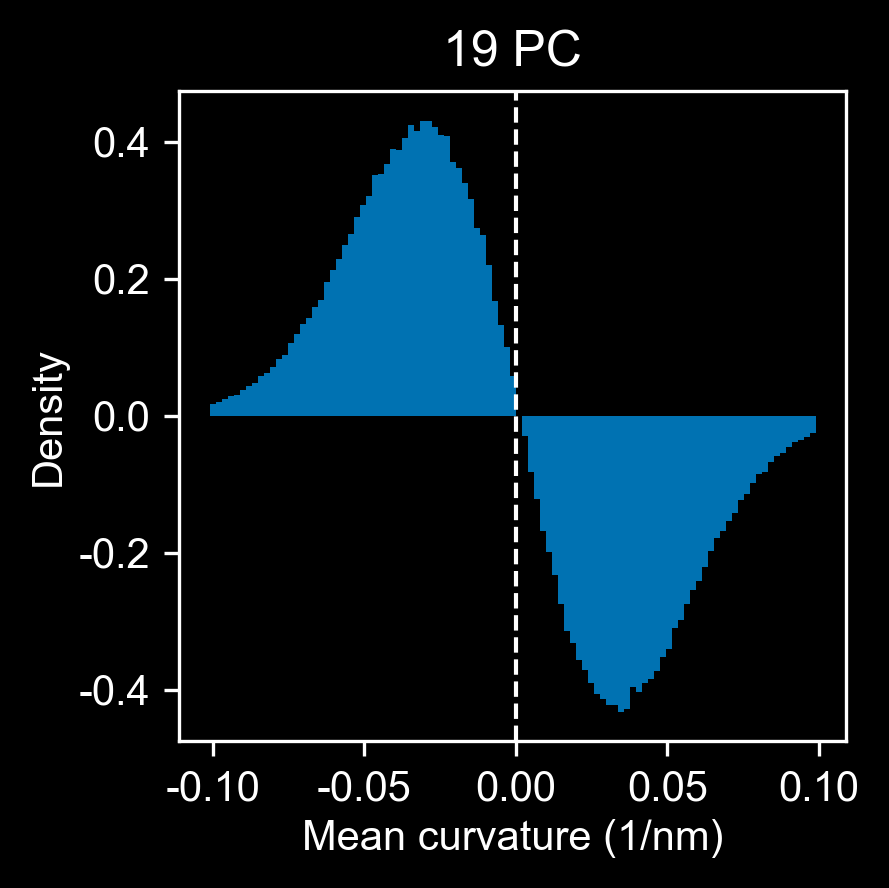

23 Overall mean: 0.0018018627675570106; PE mean 0.003485104622986465


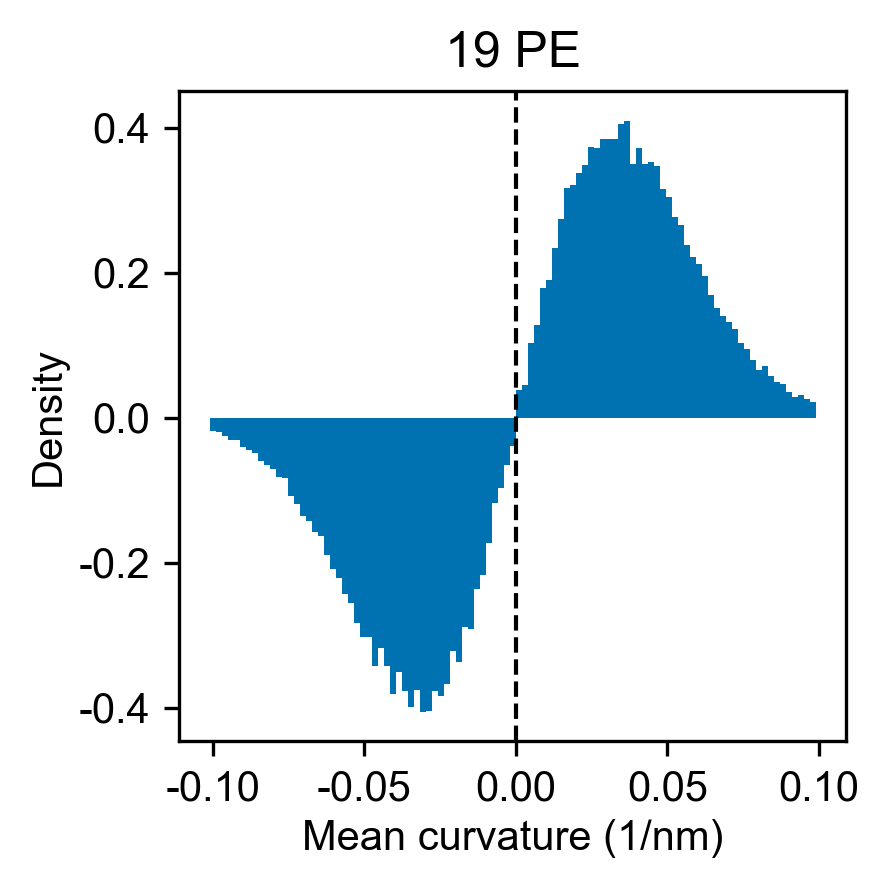

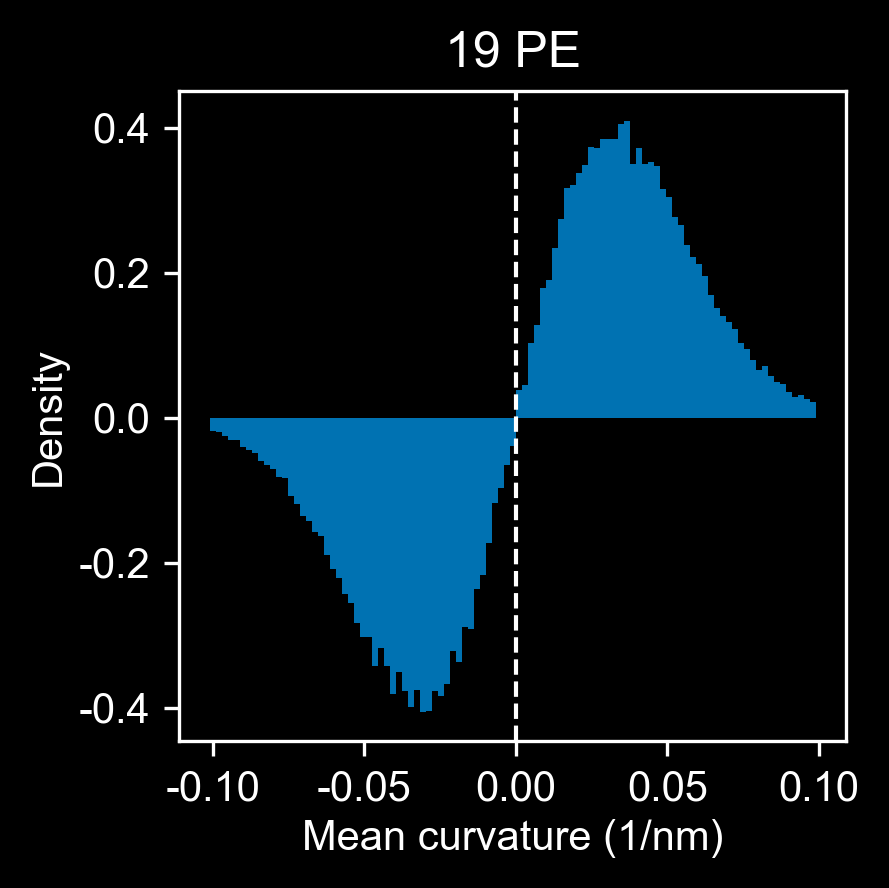

23 Overall mean: 0.0018018627675570106; CDL mean 0.00817757414874074


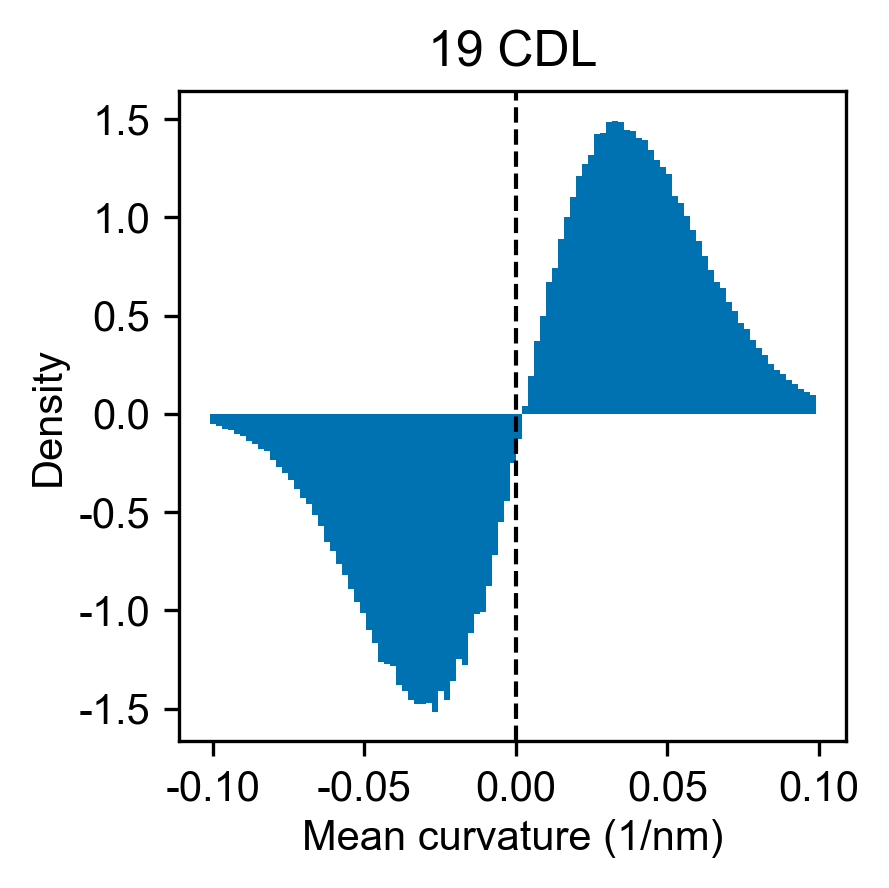

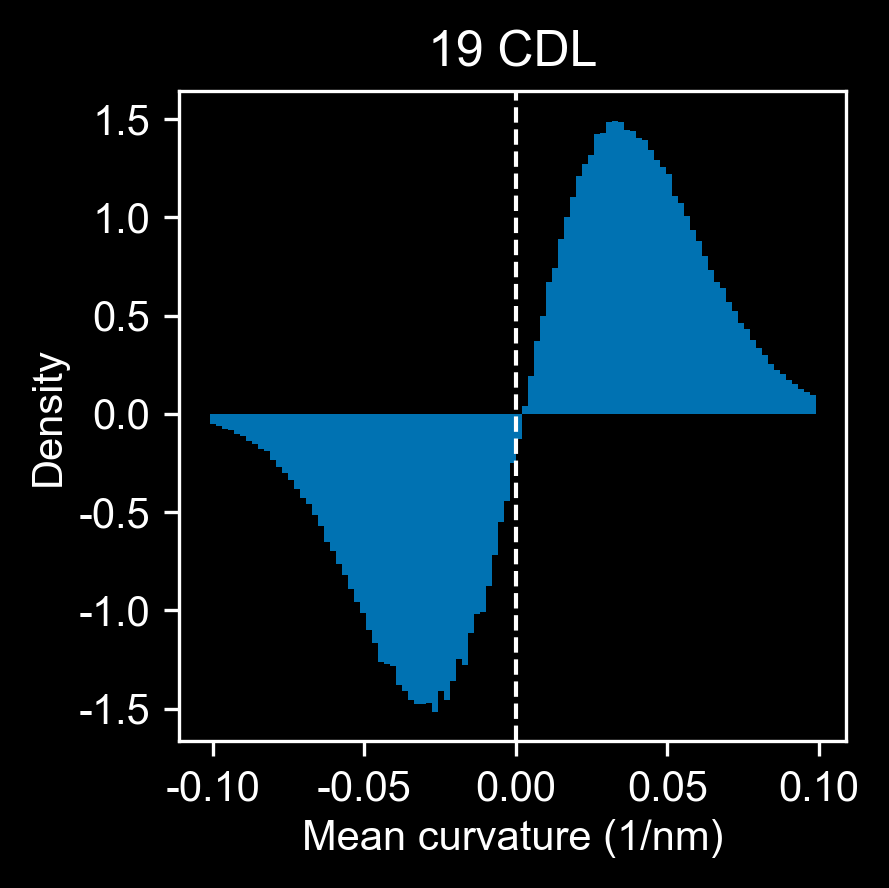

24 Overall mean: 0.0018651231529615865; PC mean -0.0006846048525258151


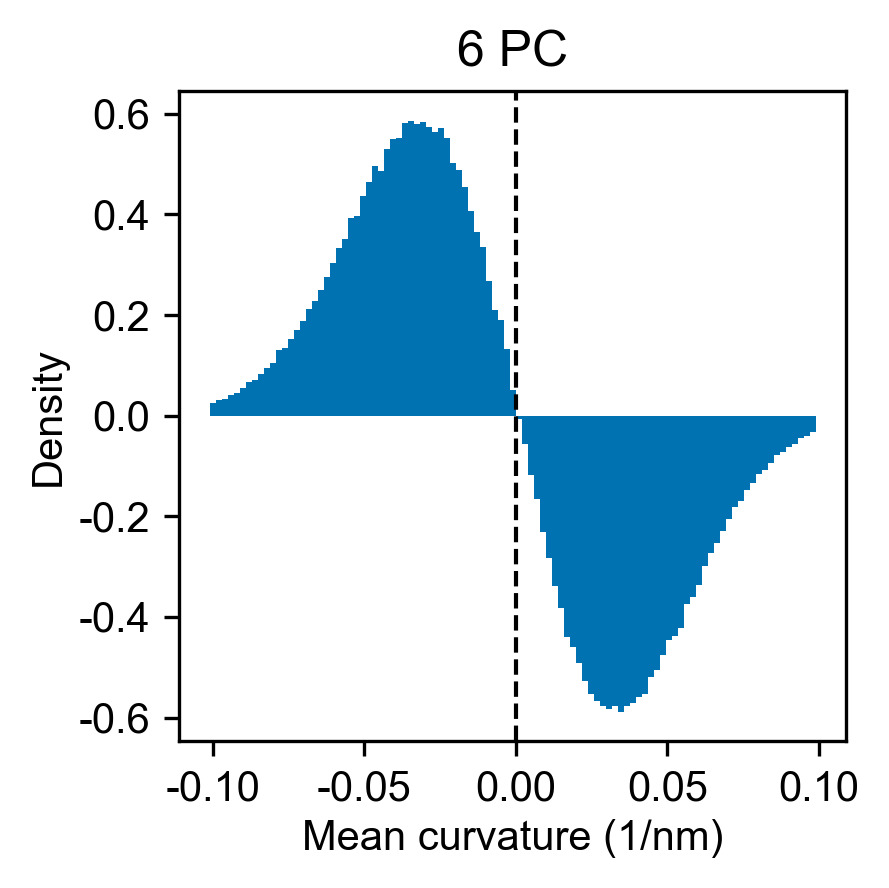

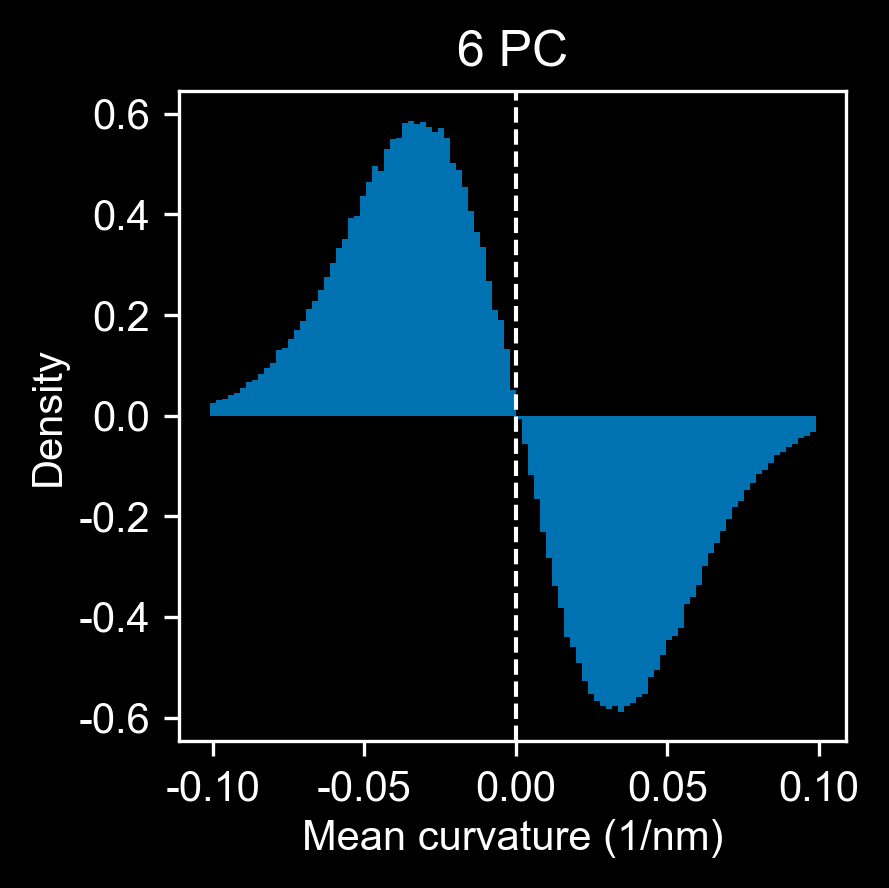

24 Overall mean: 0.0018651231529615865; PE mean 0.0029383495957739413


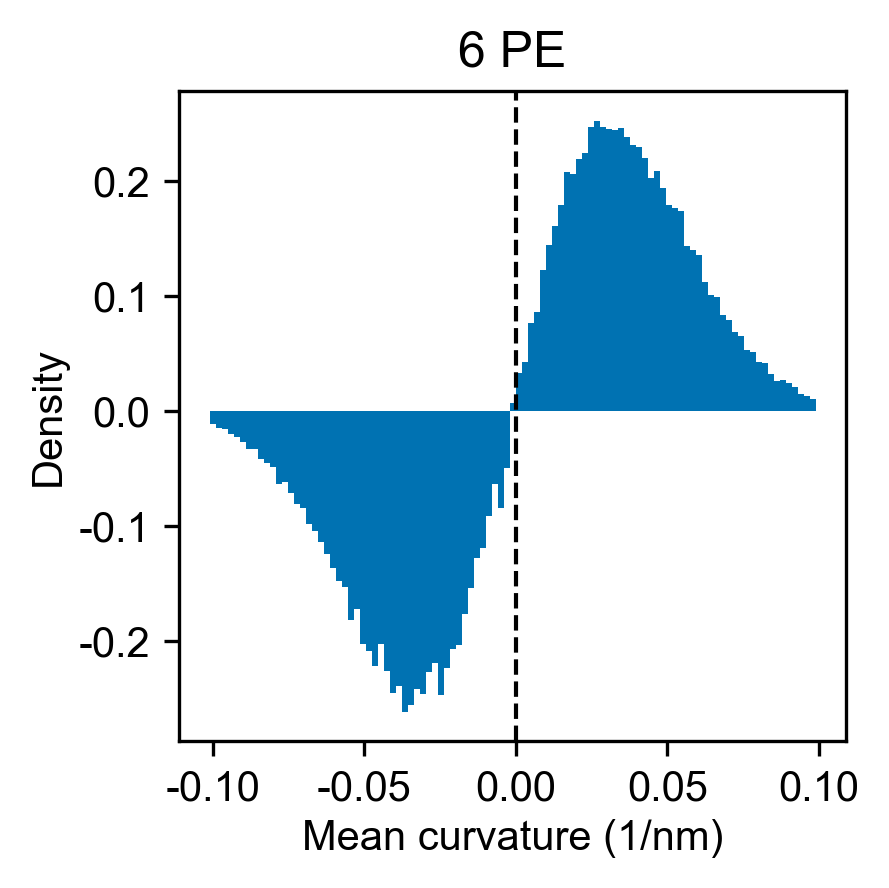

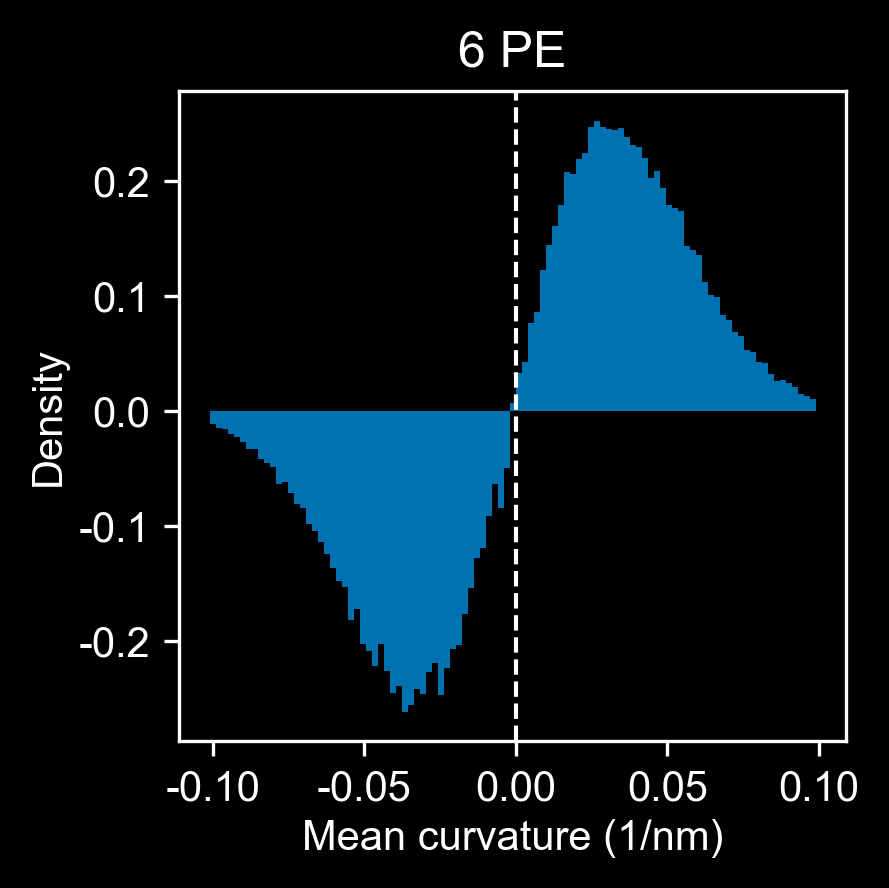

24 Overall mean: 0.0018651231529615865; CDL mean 0.00728683174698454


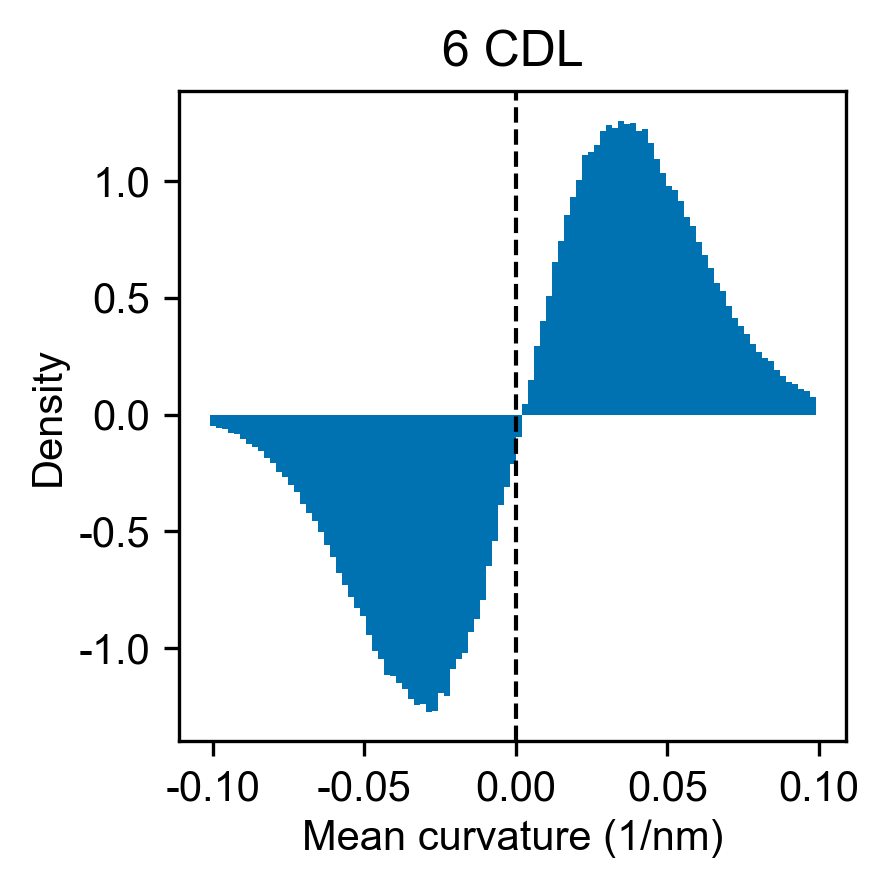

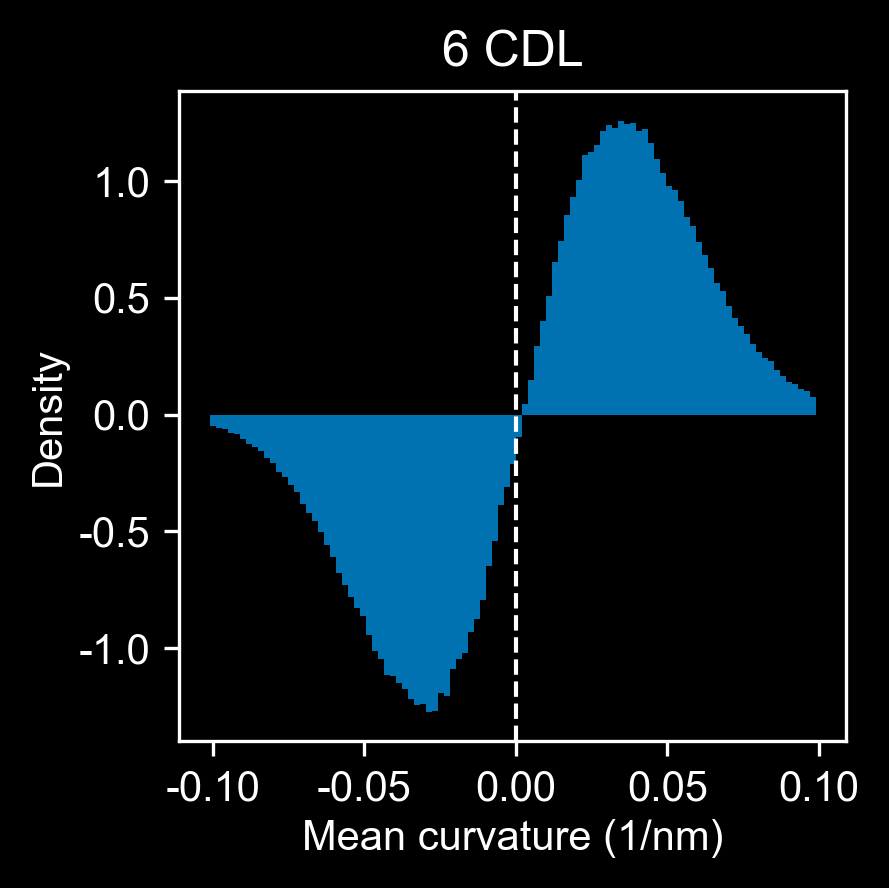

1_vbt Overall mean: 0.002066971660298063; PC mean -0.00042909212079680534


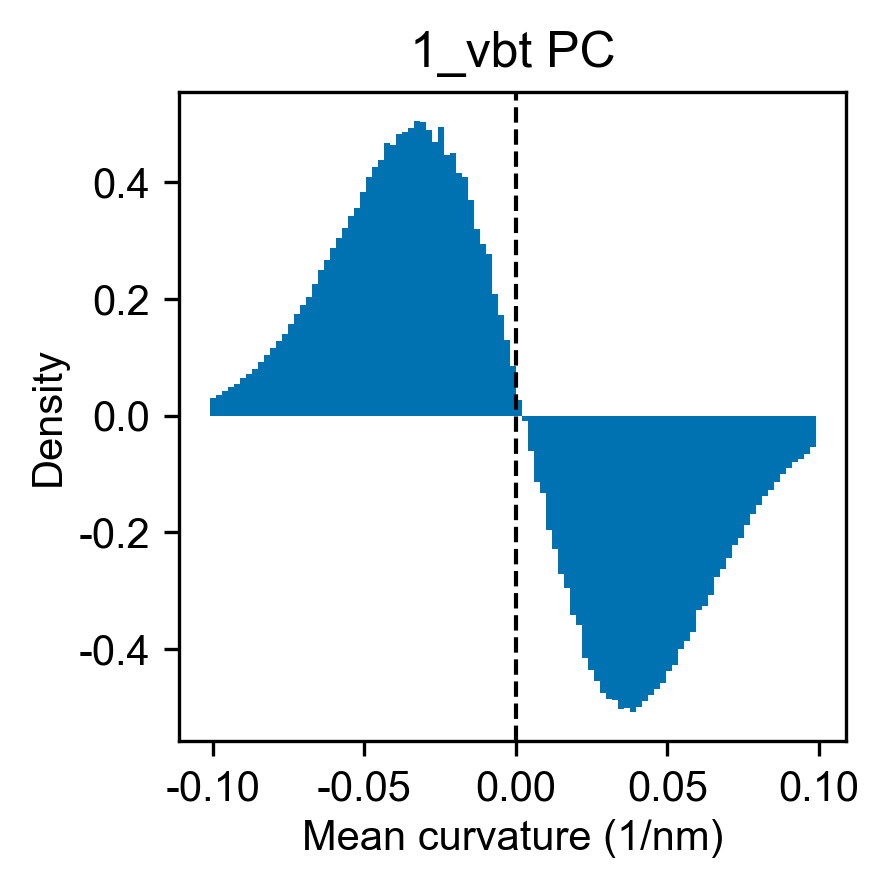

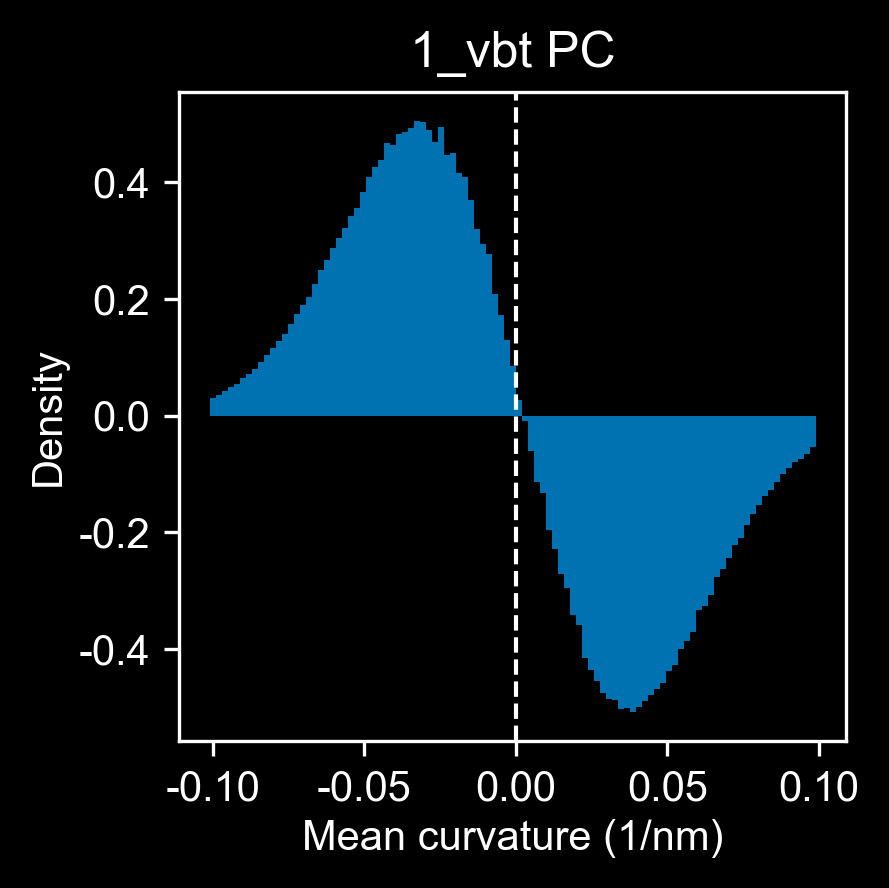

1_vbt Overall mean: 0.002066971660298063; PE mean 0.0034417808851517602


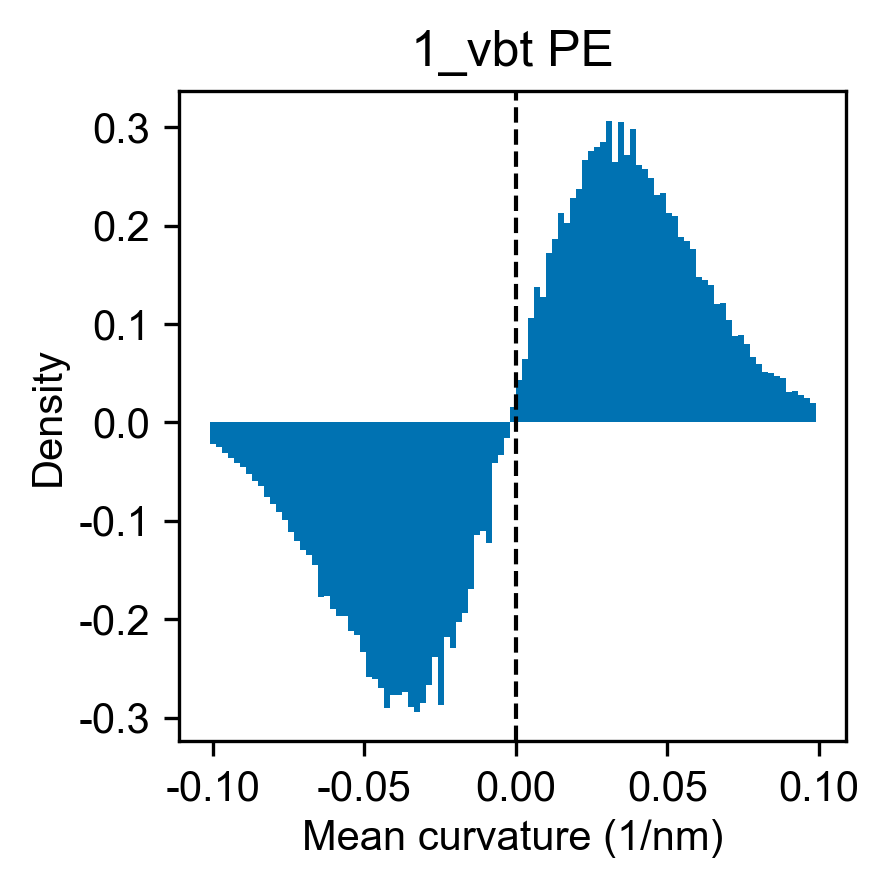

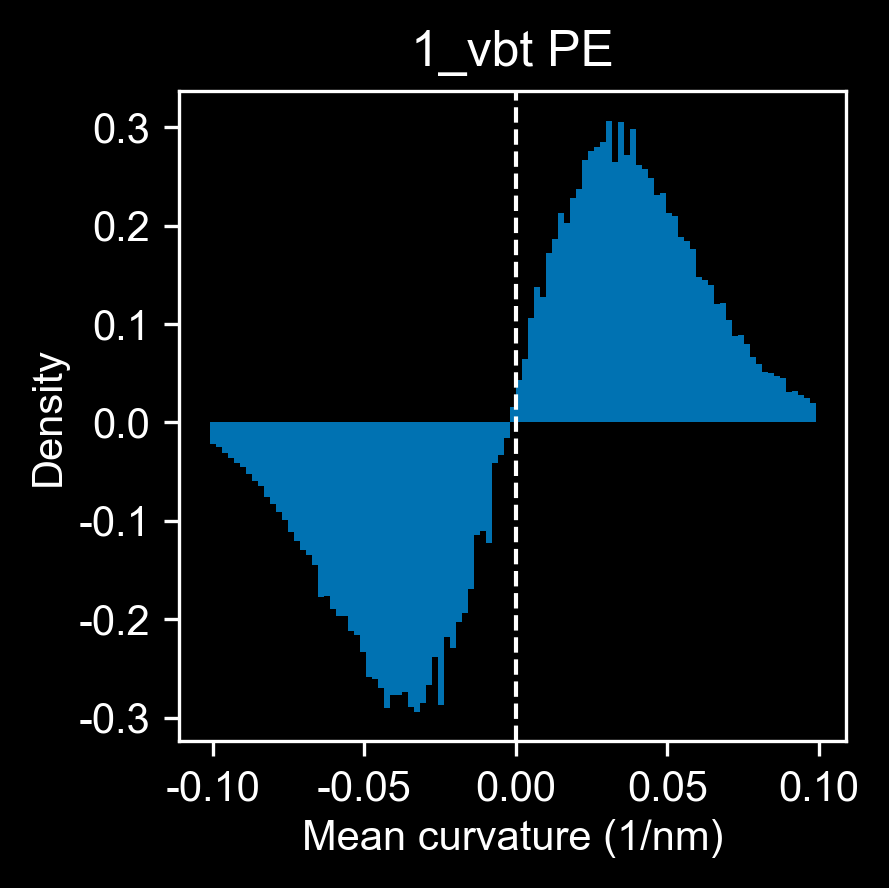

1_vbt Overall mean: 0.002066971660298063; CDL mean 0.010697717535666267


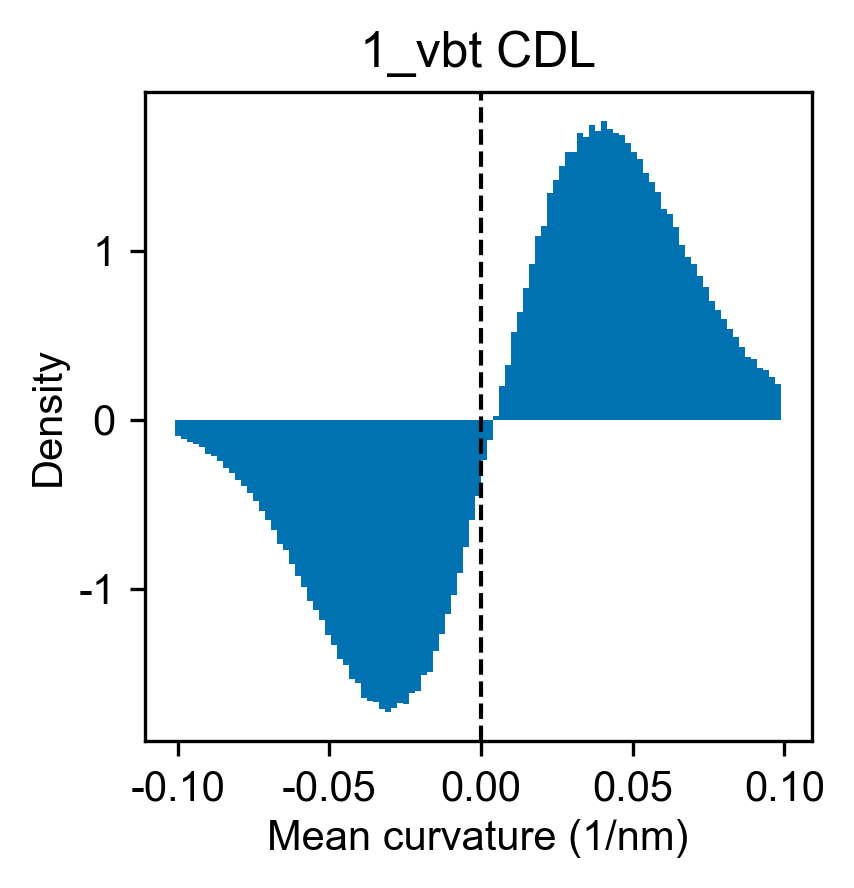

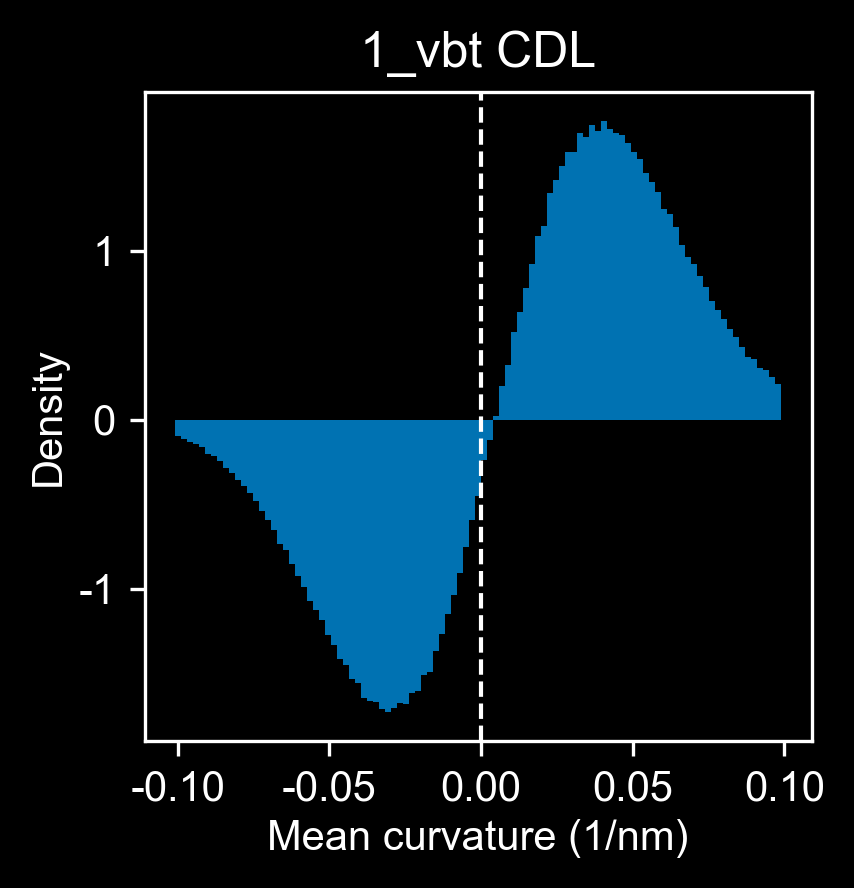

In [6]:
show_figs = True
curr_fig_path = Path("Figures/curvature_histograms_diff")
curr_fig_path.mkdir(parents=True, exist_ok=True)

for sim in np.concatenate((util.simulations, ["1_vbt"])):
    ahs = curvature_correlation_data[sim]["all"]

    for lipid, query in queries.items():
        if lipid not in curvature_correlation_data[sim]:
            continue

        hs = curvature_correlation_data[sim][lipid]
        bin_range = [-0.1, 0.1]

        hsn, hs_bins = np.histogram(hs, bins=101, range=tuple(bin_range), density=True)
        asn, as_bins = np.histogram(ahs, bins=101, range=tuple(bin_range), density=True)
        print(f"{sim} Overall mean: {np.mean(ahs)}; {lipid} mean {np.mean(hs)}")

        for style, style_ext in plot_styles:
            with plt.style.context(style):
                if style_ext:
                    ecolor = "white"
                else:
                    ecolor = "black"
                fig, ax = plt.subplots(1, 1, figsize=(3, 3))  # sharex=True,

                # Lipid specific minus all
                ax.bar(hs_bins[:-1], hsn - asn, width=hs_bins[1] - hs_bins[0])
                ax.axvline(0, color=ecolor, linestyle="--", linewidth=1)

                ax.set_xlabel(r"Mean curvature (1/nm)")
                ax.set_ylabel(r"Density")

                if sim == "1_vbt":
                    ax.set_title(f"1_vbt {lipid}")
                else:
                    ax.set_title(f"{util.sim_to_final_index[int(sim)]} {lipid}")
                # ax.set_xlim(bin_range)
                # ax.set_ylim(-0.5, 0.5)

                fig.tight_layout()

                if sim == "1_vbt":
                    save_fig(fig, curr_fig_path / f"1_vbt_{lipid}{style_ext}")
                else:
                    save_fig(
                        fig,
                        curr_fig_path
                        / f"{util.sim_to_final_index[int(sim)]}_{lipid}{style_ext}",
                    )

                if show_figs:
                    plt.show()

                fig.clear()
                plt.close(fig)


In [13]:
curvature_first_moment = {}
curvature_zero_moment = {}
curvature_second_moment = {}

for sim in np.concatenate((util.simulations, ["1_vbt"])):
    curvature_zero_moment[sim] = {}
    curvature_first_moment[sim] = {}
    curvature_second_moment[sim] = {}
    ahs = curvature_correlation_data[sim]["all"]

    for lipid, query in queries.items():
        if lipid not in curvature_correlation_data[sim]:
            continue

        hs = curvature_correlation_data[sim][lipid]
        bin_range = [-0.1, 0.1]
        hsn, hs_bins = np.histogram(hs, bins=101, range=bin_range, density=True)
        asn, as_bins = np.histogram(ahs, bins=101, range=bin_range, density=True)

        # Lipid specific minus all
        diff = hsn - asn
        bin_centers = ((hs_bins + np.roll(hs_bins, -1)) / 2)[:-1]

        moment = np.sum(diff * bin_centers) * (bin_centers[1] - bin_centers[0])
        second_moment = np.sum(diff * bin_centers * bin_centers) * (
            bin_centers[1] - bin_centers[0]
        )
        curvature_zero_moment[sim][lipid] = np.sum(diff) * (
            bin_centers[1] - bin_centers[0]
        )

        curvature_first_moment[sim][lipid] = moment
        curvature_second_moment[sim][lipid] = second_moment
        if sim != "1_vbt":
            print(
                f"{sim} {util.sim_to_final_index[int(sim)]} moment: {moment}; Overall mean: {np.mean(ahs)}; {lipid} mean {np.mean(hs)}"
            )
        else:
            print(
                f"{sim} moment: {moment}; Overall mean: {np.mean(ahs)}; {lipid} mean {np.mean(hs)}"
            )


1 1 moment: -0.002529386809096876; Overall mean: 0.0021015377060117765; PC mean -0.0005496532211734329
1 1 moment: 0.0013707515286493562; Overall mean: 0.0021015377060117765; PE mean 0.0035256583263642395
1 1 moment: 0.008823343122744515; Overall mean: 0.0021015377060117765; CDL mean 0.011359112890559209
2 2 moment: -0.002839451712376949; Overall mean: 0.002090852749879218; PC mean -0.0008780794688413184
2 2 moment: 0.0010083674950065583; Overall mean: 0.002090852749879218; PE mean 0.003141222469188779
2 2 moment: 0.008992844763443858; Overall mean: 0.002090852749879218; CDL mean 0.011485259571811473
3 -3 moment: -0.0024539249692873215; Overall mean: 0.0019702582985402896; PC mean -0.0005822301866712825
3 -3 moment: 0.0011920945390837543; Overall mean: 0.0019702582985402896; PE mean 0.003201818129841939
3 -3 moment: 0.008295826409389601; Overall mean: 0.0019702582985402896; CDL mean 0.010605589730270246
4 7 moment: -0.0007290251785626601; Overall mean: 0.0015446340712941262; PC mean 0.

In [8]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys

    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


light_factor = 0.8

p = sns.color_palette("colorblind")

# palette = [lighten_color(p[i], j) for i, j in [(7, 1),(7, light_factor),(8,1),(8,light_factor),(0,1),(0,light_factor),(2,1),(2,light_factor)]]

# sns.palplot(palette)
# sns.palplot(p)


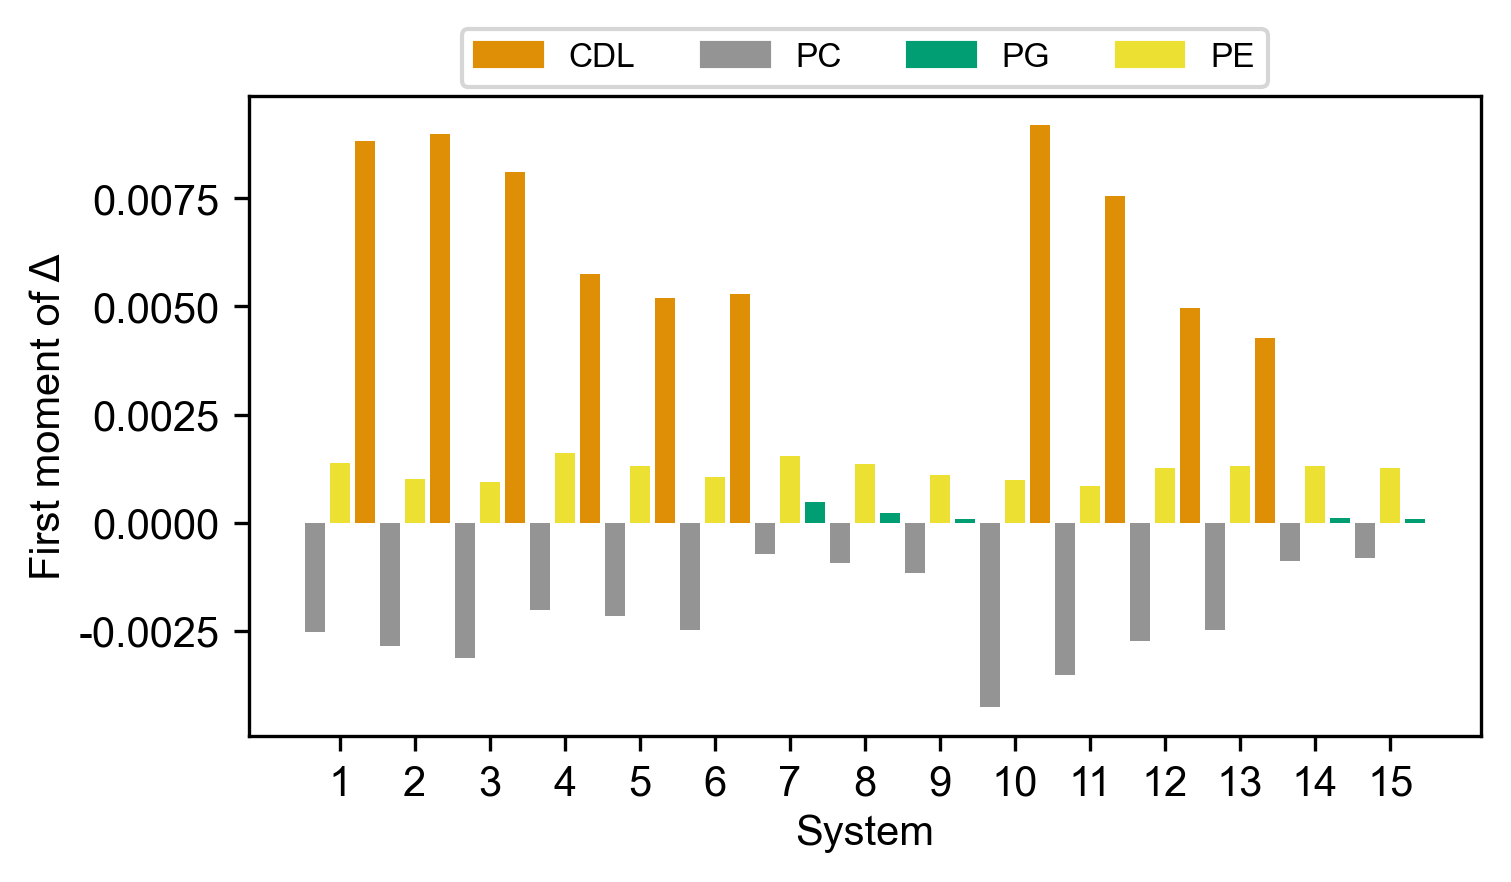

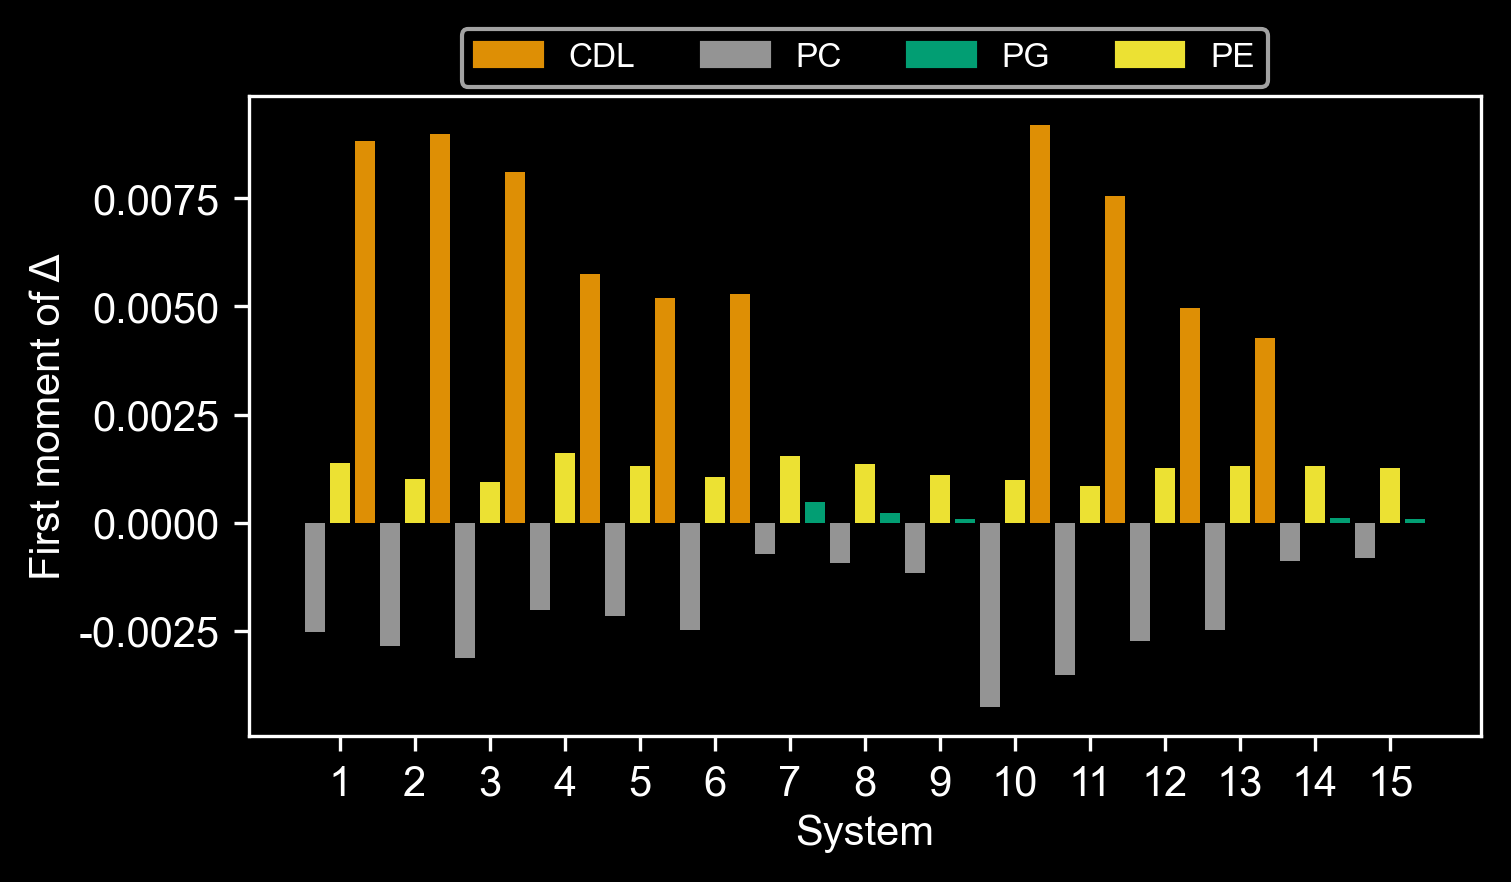

In [15]:
show_figs = True
curr_fig_path = Path("Figures/delta_analysis")
curr_fig_path.mkdir(parents=True, exist_ok=True)

color_index = {"CDL": 1, "PC": 7, "PG": 2, "PE": 8}

vals = []
colors = []
for sim in range(1, 16):
    for lipid in queries.keys():
        if lipid not in curvature_first_moment[str(util.remapping_dict[sim])]:
            continue
        vals.append(curvature_first_moment[str(util.remapping_dict[sim])][lipid])
        colors.append(p[color_index[lipid]])

# print(vals)
# print(colors)


for style, style_ext in plot_styles:
    with plt.style.context(style):
        fig, ax = plt.subplots(1, 1, figsize=(5, 3))  # sharex=True,

        ax.bar(range(len(vals)), vals, color=colors)

        ax.set_xticks(np.arange(1, len(vals), 3))
        ax.set_xticklabels(np.arange(1, 16))

        patches = [
            mpatches.Patch(color=p[1], label="CDL"),
            mpatches.Patch(color=p[7], label="PC"),
            mpatches.Patch(color=p[2], label="PG"),
            mpatches.Patch(color=p[8], label="PE"),
        ]

        box = ax.get_position()
        ax.legend(
            handles=patches, loc="upper center", ncols=4, bbox_to_anchor=(0.5, 1.13)
        )

        ax.set_ylabel("First moment of Δ")
        ax.set_xlabel("System")

        fig.tight_layout()

        save_fig(fig, curr_fig_path / f"first_moment_1-9{style_ext}")

        if show_figs:
            plt.show()

        fig.clear()
        plt.close(fig)


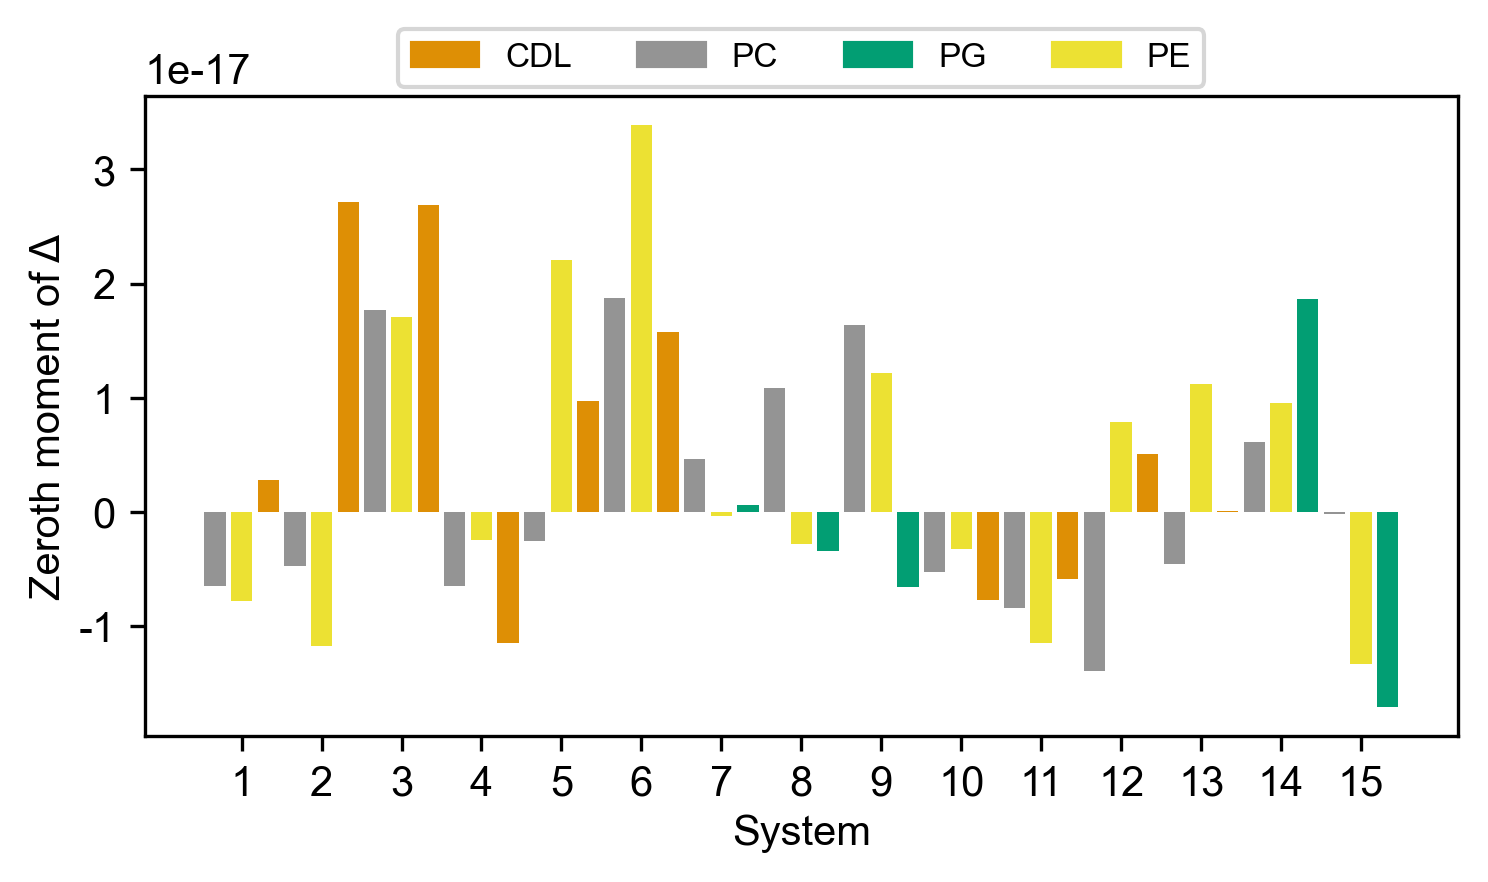

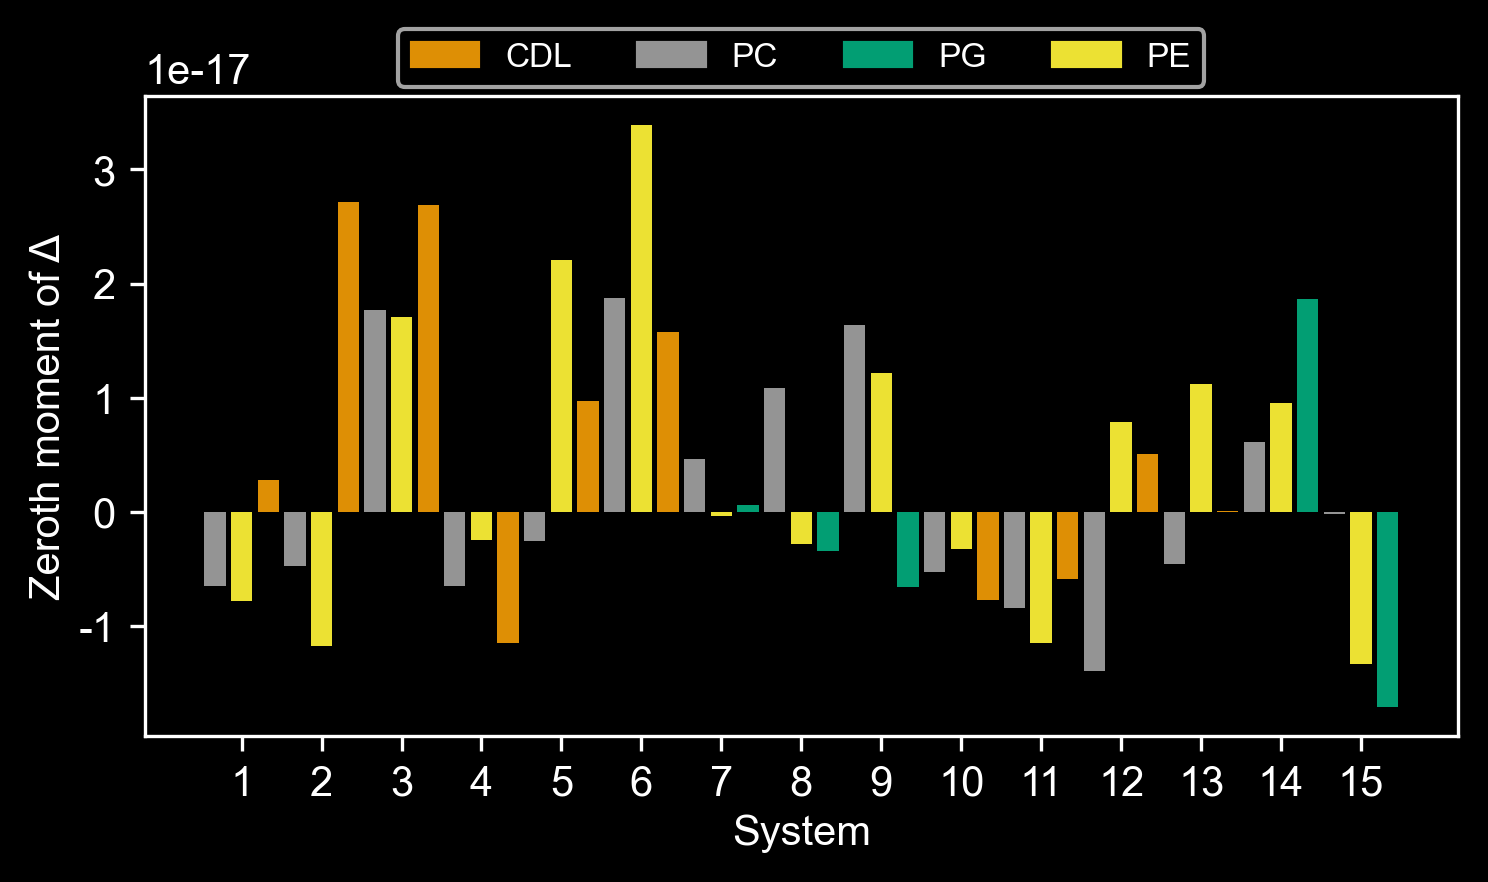

In [16]:
show_figs = True
curr_fig_path = Path("Figures/delta_analysis")
curr_fig_path.mkdir(parents=True, exist_ok=True)

color_index = {"CDL": 1, "PC": 7, "PG": 2, "PE": 8}

vals = []
colors = []
for sim in range(1, 16):
    for lipid in queries.keys():
        if lipid not in curvature_zero_moment[str(util.remapping_dict[sim])]:
            continue
        vals.append(curvature_zero_moment[str(util.remapping_dict[sim])][lipid])
        colors.append(p[color_index[lipid]])

# print(vals)
# print(colors)


for style, style_ext in plot_styles:
    with plt.style.context(style):
        fig, ax = plt.subplots(1, 1, figsize=(5, 3))  # sharex=True,

        ax.bar(range(len(vals)), vals, color=colors)

        ax.set_xticks(np.arange(1, len(vals), 3))
        ax.set_xticklabels(np.arange(1, 16))

        patches = [
            mpatches.Patch(color=p[1], label="CDL"),
            mpatches.Patch(color=p[7], label="PC"),
            mpatches.Patch(color=p[2], label="PG"),
            mpatches.Patch(color=p[8], label="PE"),
        ]

        box = ax.get_position()
        ax.legend(
            handles=patches, loc="upper center", ncols=4, bbox_to_anchor=(0.5, 1.13)
        )

        ax.set_ylabel("Zeroth moment of Δ")
        ax.set_xlabel("System")

        fig.tight_layout()

        save_fig(fig, curr_fig_path / f"zero_moment_1-9{style_ext}")

        if show_figs:
            plt.show()

        fig.clear()
        plt.close(fig)


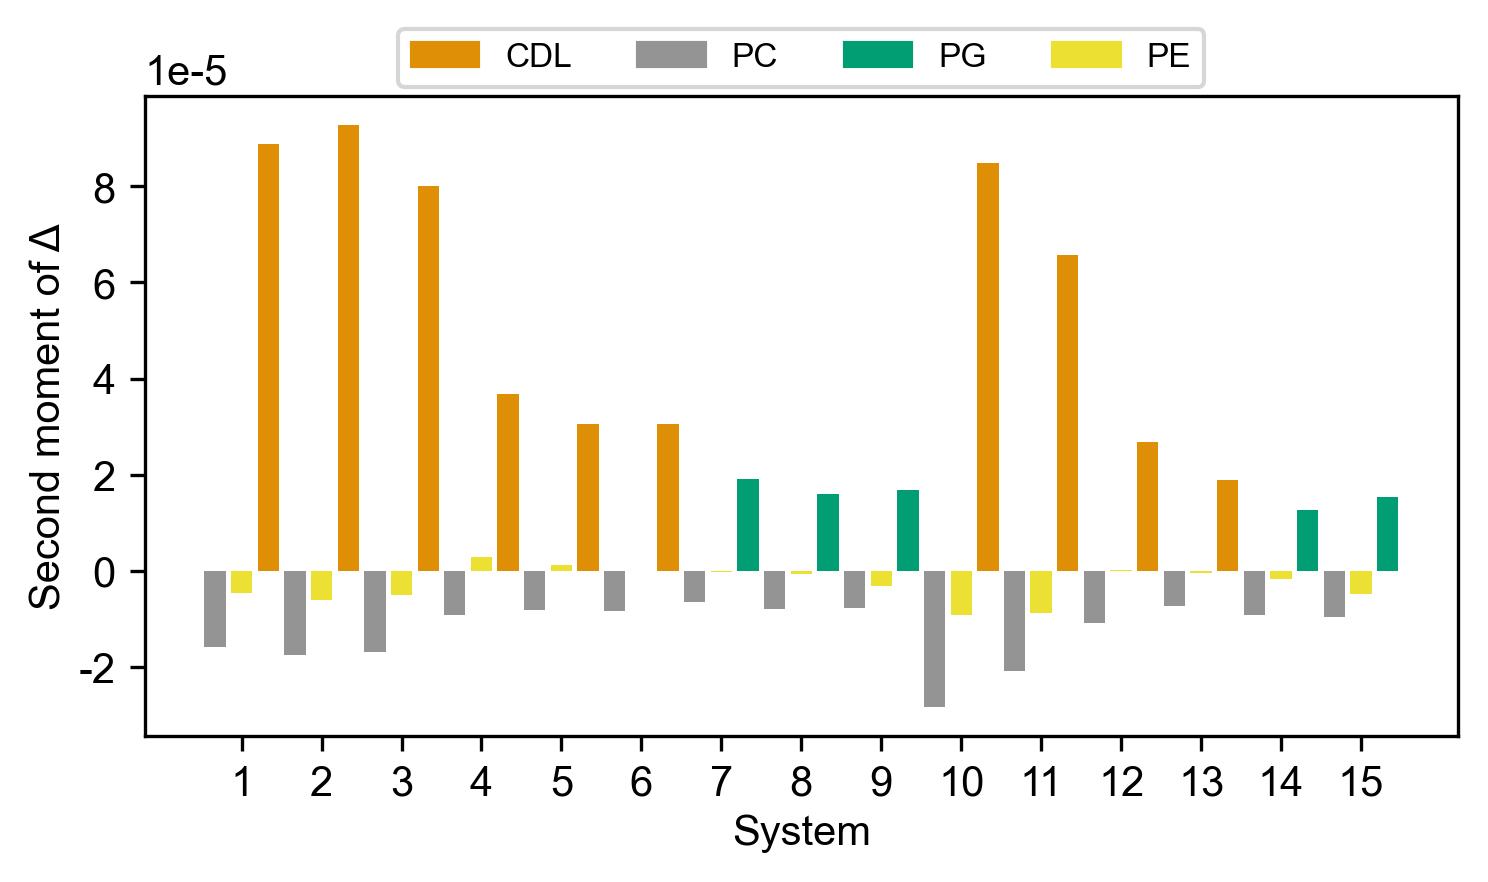

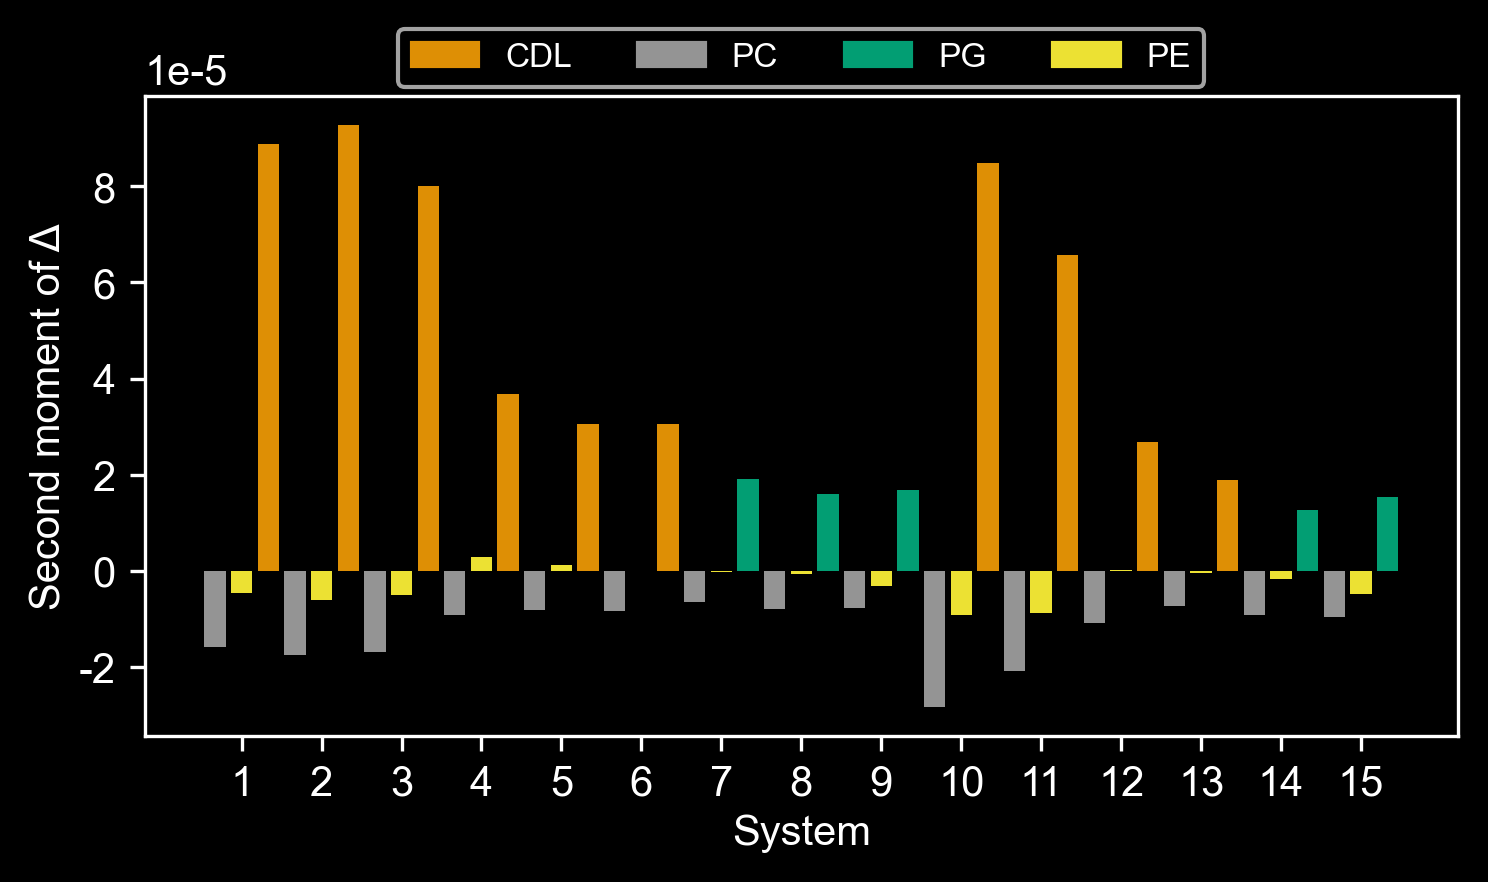

In [17]:
show_figs = True
curr_fig_path = Path("Figures/delta_analysis")
curr_fig_path.mkdir(parents=True, exist_ok=True)

color_index = {"CDL": 1, "PC": 7, "PG": 2, "PE": 8}

vals = []
colors = []
for sim in range(1, 16):
    for lipid in queries.keys():
        if lipid not in curvature_second_moment[str(util.remapping_dict[sim])]:
            continue
        vals.append(curvature_second_moment[str(util.remapping_dict[sim])][lipid])
        colors.append(p[color_index[lipid]])

# print(vals)
# print(colors)


for style, style_ext in plot_styles:
    with plt.style.context(style):
        fig, ax = plt.subplots(1, 1, figsize=(5, 3))  # sharex=True,

        ax.bar(range(len(vals)), vals, color=colors)

        ax.set_xticks(np.arange(1, len(vals), 3))
        ax.set_xticklabels(np.arange(1, 16))

        patches = [
            mpatches.Patch(color=p[1], label="CDL"),
            mpatches.Patch(color=p[7], label="PC"),
            mpatches.Patch(color=p[2], label="PG"),
            mpatches.Patch(color=p[8], label="PE"),
        ]

        box = ax.get_position()
        ax.legend(
            handles=patches, loc="upper center", ncols=4, bbox_to_anchor=(0.5, 1.13)
        )

        ax.set_ylabel("Second moment of Δ")
        ax.set_xlabel("System")

        fig.tight_layout()

        save_fig(fig, curr_fig_path / f"second_moment_1-9{style_ext}")

        if show_figs:
            plt.show()

        fig.clear()
        plt.close(fig)
